In [151]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings('ignore')

### Step1 : Reading the csv data and understand

In [11]:
# Reading the train data
churn_train_data = pd.read_csv("train.csv")
churn_train_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [6]:
churn_train_data.shape

(69999, 172)

In [34]:
churn_train_data.info

<bound method DataFrame.info of           id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_

In [35]:
churn_train_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [12]:
# Reading the test CSV
churn_test_data = pd.read_csv("test.csv")
churn_test_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [28]:
churn_test_data.shape

(30000, 171)

In [8]:
# Reading the data dictionary
data_dict = pd.read_csv("data_dictionary.csv")
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [19]:
# Checking null values in train data
def get_columns_with_nulls_above_threshold(df: pd.DataFrame, threshold) -> None:
    # Calculate the percentage of missing values for each column
    null_percentage = 100 * df.isnull().mean()

    # Filter columns with null percentage greater than the threshold
    columns_with_nulls_above_threshold = null_percentage[null_percentage > threshold]

    # Check if any columns meet the criteria and print the result
    if not columns_with_nulls_above_threshold.empty:
        print(f"Columns with more than {threshold}% null values:")
        print(columns_with_nulls_above_threshold)
        return list(columns_with_nulls_above_threshold.index)
    else:
        print(f"No columns have more than {threshold}% null values.")


#### Get columns with null and na values in train data for 50% and above

In [21]:
train_null1 = get_columns_with_nulls_above_threshold(churn_train_data,50)

Columns with more than 50% null values:
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_

#### Get columns with null and na values in train data for 50% and above

In [22]:
test_null1 = get_columns_with_nulls_above_threshold(churn_test_data,50)

Columns with more than 50% null values:
date_of_last_rech_data_6    74.716667
date_of_last_rech_data_7    74.313333
date_of_last_rech_data_8    73.593333
total_rech_data_6           74.716667
total_rech_data_7           74.313333
total_rech_data_8           73.593333
max_rech_data_6             74.716667
max_rech_data_7             74.313333
max_rech_data_8             73.593333
count_rech_2g_6             74.716667
count_rech_2g_7             74.313333
count_rech_2g_8             73.593333
count_rech_3g_6             74.716667
count_rech_3g_7             74.313333
count_rech_3g_8             73.593333
av_rech_amt_data_6          74.716667
av_rech_amt_data_7          74.313333
av_rech_amt_data_8          73.593333
arpu_3g_6                   74.716667
arpu_3g_7                   74.313333
arpu_3g_8                   73.593333
arpu_2g_6                   74.716667
arpu_2g_7                   74.313333
arpu_2g_8                   73.593333
night_pck_user_6            74.716667
night_pck_

In [25]:
len(test_null1)

30

In [26]:
len(train_null1)

30

In [27]:
print(test_null1 == train_null1)

True


#### Before dropping columns let's see if there are any important columns which can be useful to us let's put all recharge columns togeteher and analyse

In [50]:
# some columns do not have minimum value 1
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'
                 ]

In [51]:
df_recharge = churn_train_data[recharge_cols]

In [52]:
df_recharge.head(20)

total_rech_data_6  total_rech_data_7  total_rech_data_8  count_rech_2g_6  \
0                 NaN                NaN                NaN              NaN   
1                 NaN                1.0                NaN              NaN   
2                 NaN                NaN                NaN              NaN   
3                 NaN                NaN                NaN              NaN   
4                 7.0                7.0                6.0              7.0   
5                 NaN                NaN                NaN              NaN   
6                 NaN                NaN                NaN              NaN   
7                 1.0                1.0                1.0              1.0   
8                 NaN                NaN                NaN              NaN   
9                 NaN                NaN                NaN              NaN   
10                1.0                NaN                NaN              1.0   
11                NaN                NaN                NaN              NaN   
12                NaN                NaN                NaN              NaN   
13                NaN                NaN                NaN              NaN   
14                NaN                NaN                NaN              NaN   
15                1.0                NaN                1.0              1.0   
16                1.0                NaN                NaN              0.0   
17                NaN                NaN                NaN              NaN   
18                NaN                NaN                NaN              NaN   
19                NaN                NaN                NaN              NaN   

    count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0               NaN              NaN              NaN              NaN   
1               0.0              NaN              NaN              1.0   
2               NaN              NaN              NaN              NaN   
3               NaN              NaN              NaN              NaN   
4               6.0              6.0              0.0              1.0   
5               NaN              NaN              NaN              NaN   
6               NaN              NaN              NaN              NaN   
7               1.0              1.0              0.0              0.0   
8               NaN              NaN              NaN              NaN   
9               NaN              NaN              NaN              NaN   
10              NaN              NaN              0.0              NaN   
11              NaN              NaN              NaN              NaN   
12              NaN              NaN              NaN              NaN   
13              NaN              NaN              NaN              NaN   
14              NaN              NaN              NaN              NaN   
15              NaN              1.0              0.0              NaN   
16              NaN              NaN              1.0              NaN   
17              NaN              NaN              NaN              NaN   
18              NaN              NaN              NaN              NaN   
19              NaN              NaN              NaN              NaN   

    count_rech_3g_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0               NaN              NaN              NaN              NaN   
1               NaN              NaN            145.0              NaN   
2               NaN              NaN              NaN              NaN   
3               NaN              NaN              NaN              NaN   
4               0.0             25.0             41.0             25.0   
5               NaN              NaN              NaN              NaN   
6               NaN              NaN              NaN              NaN   
7               0.0            198.0            198.0            198.0   
8               NaN              NaN              NaN              NaN   
9               NaN         

#### We can conclude from the above that total_reach_amt is enough to predict the recharge amount in respective months so we can drop the columns having high null value

#### As we see both in the train and test dataframes we have few columns having missing values more than 70% let's drop them

In [38]:
# Dropping the the columns having high missing values in train data for now
churn_train_data1 = churn_train_data.drop(columns=train_null1)

In [40]:
churn_train_data1.shape

(69999, 142)

##### We will check for duplicate rows now

In [41]:
# checking for duplicates
churn_train_data1.drop_duplicates(subset=None, inplace=True)
churn_train_data1.shape

(69999, 142)

##### That mean we don't have the dupicate rows here

In [45]:
churn_train_data1.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [54]:
churn_train_data1.shape

(69999, 142)

In [ ]:
#Checking again for null values


In [53]:
print(churn_train_data1.dtypes)

id                        int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t

In [55]:
100*churn_train_data1.isnull().mean()

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             3.954342
onnet_mou_7             3.838626
onnet_mou_8             5.290076
offnet_mou_6            3.954342
offnet_mou_7            3.838626
offnet_mou_8            5.290076
roam_ic_mou_6           3.954342
roam_ic_mou_7           3.838626
roam_ic_mou_8           5.290076
roam_og_mou_6           3.954342
roam_og_mou_7           3.838626
roam_og_mou_8           5.290076
loc_og_t2t_mou_6        3.954342
loc_og_t2t_mou_7        3.838626
loc_og_t2t_mou_8        5.290076
loc_og_t2m_mou_6        3.954342
loc_og_t2m_mou_7        3.838626
loc_og_t2m_mou_8        5.290076
loc_og_t2f_mou_6        3.954342
loc_og_t2f

#### Now segregating the columns into id , categorical, date and numerical columns

In [58]:
# creating column types by there types
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8'                         
            ]

num_cols = [column for column in churn_train_data1.columns if column not in id_cols + date_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d" % (len(id_cols), len(date_cols), len(num_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) == churn_train_data1.shape[1])

#ID cols: 2
#Date cols:6
#Numeric cols:134
True


In [60]:
churn_train_data1 = churn_train_data1.drop(id_cols + date_cols, axis=1)

KeyError: "['id', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'] not found in axis"

In [61]:
churn_train_data1.shape

(69999, 134)

In [62]:
num_cols = [column for column in churn_train_data1.columns if column not in id_cols + date_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [63]:
#imputing with meadian for num_cols
churn_train_data1[num_cols] = churn_train_data1[num_cols].apply(lambda x: x.fillna(x.median()))

In [64]:
100*churn_train_data1.isnull().mean()

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

#### We see there are no missing values as of now

In [66]:
churn_train_data1['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [67]:
percentage_value_counts = churn_train_data1['churn_probability'].value_counts(normalize=True) * 100
print(percentage_value_counts)

churn_probability
0    89.811283
1    10.188717
Name: proportion, dtype: float64


#### We see nearly 90% of the customer is not churning out

In [68]:
# We will check for values which just have one unique value
one_unique_value_cols = churn_train_data1.columns[churn_train_data1.nunique() == 1]

In [69]:
print(one_unique_value_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


##### Drop the columns which just have one unique value

In [70]:
churn_train_data1.drop(columns=one_unique_value_cols, inplace=True)

In [75]:
churn_train_data1.shape

(69999, 125)

In [76]:
churn_train_data1.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    129.236765    129.993840   
std      334.213918    344.366927    351.924315    294.605405    305.867956   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      8.060000      7.260000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     127.641721    194.825731    193.112523    191.002562       9.379276   
std      304.373330    311.131642    316.878225    316.270571      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        7.360000     36.880000     33.980000     34.390000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.521038         44.838857         43.890335   
std        62.923987        148.113736        151.885403        149.788556   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.930000          1.880000          1.950000   
50%         0.000000         11.910000         11.580000         11.740000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          91.173739         88.855772         88.435599          3.595161   
std          159.135994        151.184002        149.328982         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%           10.830000         10.935000         11.140000          0.000000   
50%           41.030000         40.170000         40.350000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

#### Let's find the correlations between the left over variables with the target variale

In [84]:
correlations = churn_train_data1.corr()['churn_probability'].sort_values(ascending=True)

In [85]:
print(correlations)

total_ic_mou_8       -0.187566
total_rech_num_8     -0.167043
total_rech_amt_8     -0.160455
max_rech_amt_8       -0.159131
arpu_8               -0.157566
total_og_mou_8       -0.149325
last_day_rch_amt_8   -0.139611
loc_ic_mou_8         -0.137067
aon                  -0.135177
loc_ic_t2m_mou_8     -0.134797
loc_og_t2m_mou_8     -0.129618
loc_og_mou_8         -0.123898
total_ic_mou_7       -0.120197
loc_ic_t2m_mou_7     -0.106720
loc_ic_mou_7         -0.105206
loc_og_t2m_mou_7     -0.098925
loc_og_mou_7         -0.097044
offnet_mou_8         -0.096774
loc_ic_t2f_mou_8     -0.084414
spl_ic_mou_8         -0.080931
std_og_mou_8         -0.078585
loc_ic_t2t_mou_8     -0.076696
monthly_2g_8         -0.076254
loc_og_t2f_mou_8     -0.074633
loc_ic_mou_6         -0.074392
max_rech_amt_7       -0.073366
loc_ic_t2m_mou_6     -0.072893
loc_og_t2t_mou_8     -0.071695
onnet_mou_8          -0.071568
sachet_2g_8          -0.071103
total_ic_mou_6       -0.070951
last_day_rch_amt_7   -0.069795
loc_og_t

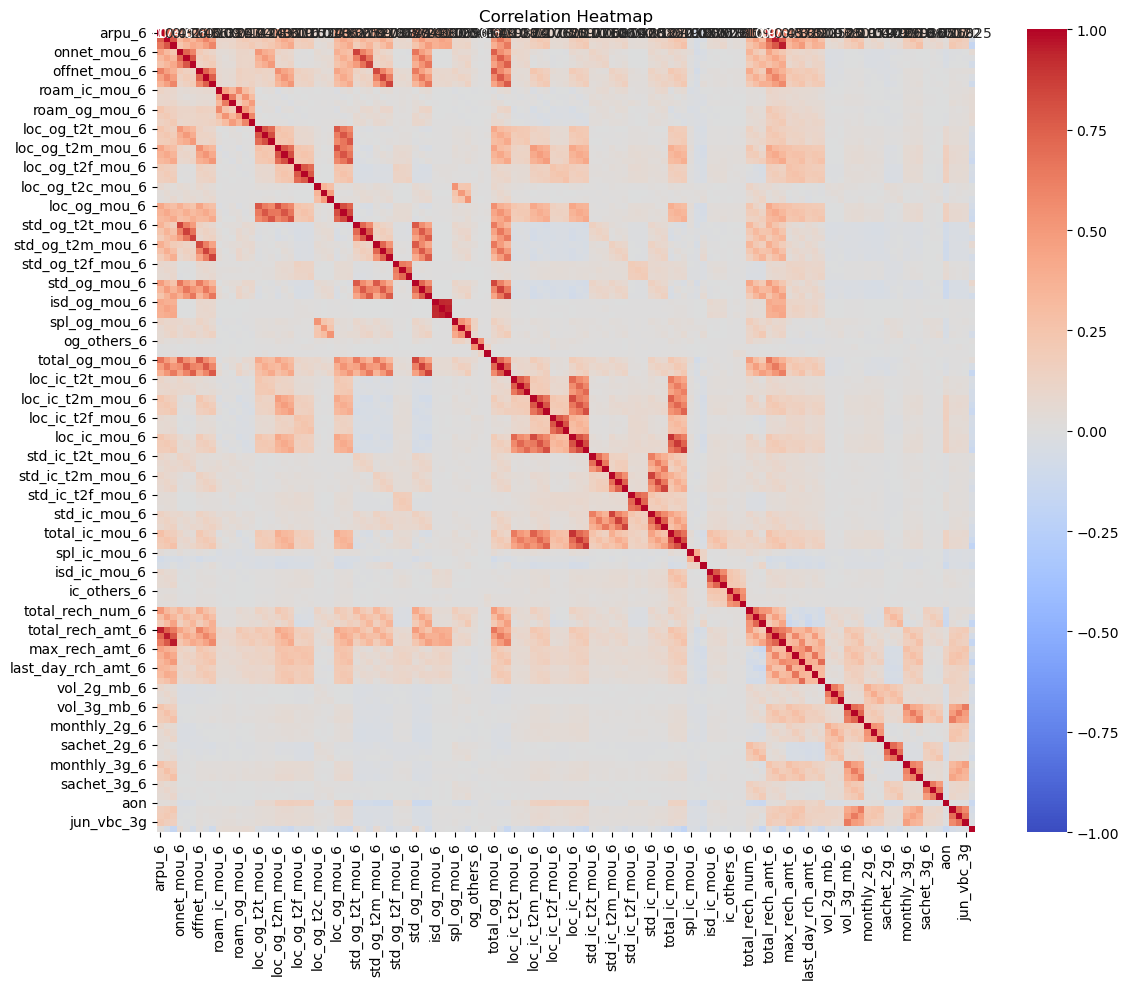

In [92]:
corr_matrix = churn_train_data1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Too many features to understand the correlations let's try to reduce features which seems less correlated with target variable

In [94]:
# First take copy of the dataframe
churn_train_data2 = churn_train_data1.copy()

In [95]:
churn_train_data2.shape

(69999, 125)

In [109]:
def correlation_based_feature_selection(df, target_column, threshold, verbose=True):
    # Calculate correlations with the target variable
    correlations = df.corr()[target_column].abs().sort_values(ascending=False)
    
    # Remove the target variable from the correlations
    correlations = correlations.drop(target_column)
    
    # Select features with absolute correlation above the threshold
    selected_features = correlations[correlations > threshold].index.tolist()
    
    if verbose:
        print(f"Original number of features: {df.shape[1] - 1}")  # Subtract 1 to exclude target variable
        print(f"Number of selected features: {len(selected_features)}")
        print(f"Number of dropped features: {df.shape[1] - len(selected_features) - 1}")
        print("\nSelected features and their correlations:")
        for feature in selected_features:
            print(f"{feature}: {correlations[feature]:.6f}")
        
        print("\nDropped features and their correlations:")
        for feature in correlations.index:
            if feature not in selected_features:
                print(f"{feature}: {correlations[feature]:.6f}")
    
    # Create a new dataframe with only the selected features and the target
    selected_df = df[selected_features + [target_column]]
    
    return selected_df


In [110]:
churn_train1 = correlation_based_feature_selection(churn_train_data2, 'churn_probability', 0.03, verbose=True)

Original number of features: 124
Number of selected features: 79
Number of dropped features: 45

Selected features and their correlations:
total_ic_mou_8: 0.187566
total_rech_num_8: 0.167043
total_rech_amt_8: 0.160455
max_rech_amt_8: 0.159131
arpu_8: 0.157566
total_og_mou_8: 0.149325
last_day_rch_amt_8: 0.139611
loc_ic_mou_8: 0.137067
aon: 0.135177
loc_ic_t2m_mou_8: 0.134797
loc_og_t2m_mou_8: 0.129618
loc_og_mou_8: 0.123898
total_ic_mou_7: 0.120197
loc_ic_t2m_mou_7: 0.106720
loc_ic_mou_7: 0.105206
loc_og_t2m_mou_7: 0.098925
loc_og_mou_7: 0.097044
offnet_mou_8: 0.096774
std_og_mou_6: 0.088728
loc_ic_t2f_mou_8: 0.084414
spl_ic_mou_8: 0.080931
std_og_mou_8: 0.078585
loc_ic_t2t_mou_8: 0.076696
monthly_2g_8: 0.076254
loc_og_t2f_mou_8: 0.074633
loc_ic_mou_6: 0.074392
max_rech_amt_7: 0.073366
loc_ic_t2m_mou_6: 0.072893
loc_og_t2t_mou_8: 0.071695
onnet_mou_8: 0.071568
sachet_2g_8: 0.071103
total_ic_mou_6: 0.070951
last_day_rch_amt_7: 0.069795
std_og_t2t_mou_6: 0.069426
loc_og_t2m_mou_6: 0.0685

In [111]:
churn_train1.shape

(69999, 80)

##### We see some important features are also picked up let's reduce the threshold, anyways we will using PCA for further filtering reducing the threshold to 0.01

In [112]:
churn_train2 = correlation_based_feature_selection(churn_train_data2, 'churn_probability', 0.01, verbose=True)

Original number of features: 124
Number of selected features: 104
Number of dropped features: 20

Selected features and their correlations:
total_ic_mou_8: 0.187566
total_rech_num_8: 0.167043
total_rech_amt_8: 0.160455
max_rech_amt_8: 0.159131
arpu_8: 0.157566
total_og_mou_8: 0.149325
last_day_rch_amt_8: 0.139611
loc_ic_mou_8: 0.137067
aon: 0.135177
loc_ic_t2m_mou_8: 0.134797
loc_og_t2m_mou_8: 0.129618
loc_og_mou_8: 0.123898
total_ic_mou_7: 0.120197
loc_ic_t2m_mou_7: 0.106720
loc_ic_mou_7: 0.105206
loc_og_t2m_mou_7: 0.098925
loc_og_mou_7: 0.097044
offnet_mou_8: 0.096774
std_og_mou_6: 0.088728
loc_ic_t2f_mou_8: 0.084414
spl_ic_mou_8: 0.080931
std_og_mou_8: 0.078585
loc_ic_t2t_mou_8: 0.076696
monthly_2g_8: 0.076254
loc_og_t2f_mou_8: 0.074633
loc_ic_mou_6: 0.074392
max_rech_amt_7: 0.073366
loc_ic_t2m_mou_6: 0.072893
loc_og_t2t_mou_8: 0.071695
onnet_mou_8: 0.071568
sachet_2g_8: 0.071103
total_ic_mou_6: 0.070951
last_day_rch_amt_7: 0.069795
std_og_t2t_mou_6: 0.069426
loc_og_t2m_mou_6: 0.068

In [113]:
churn_train2.shape

(69999, 105)

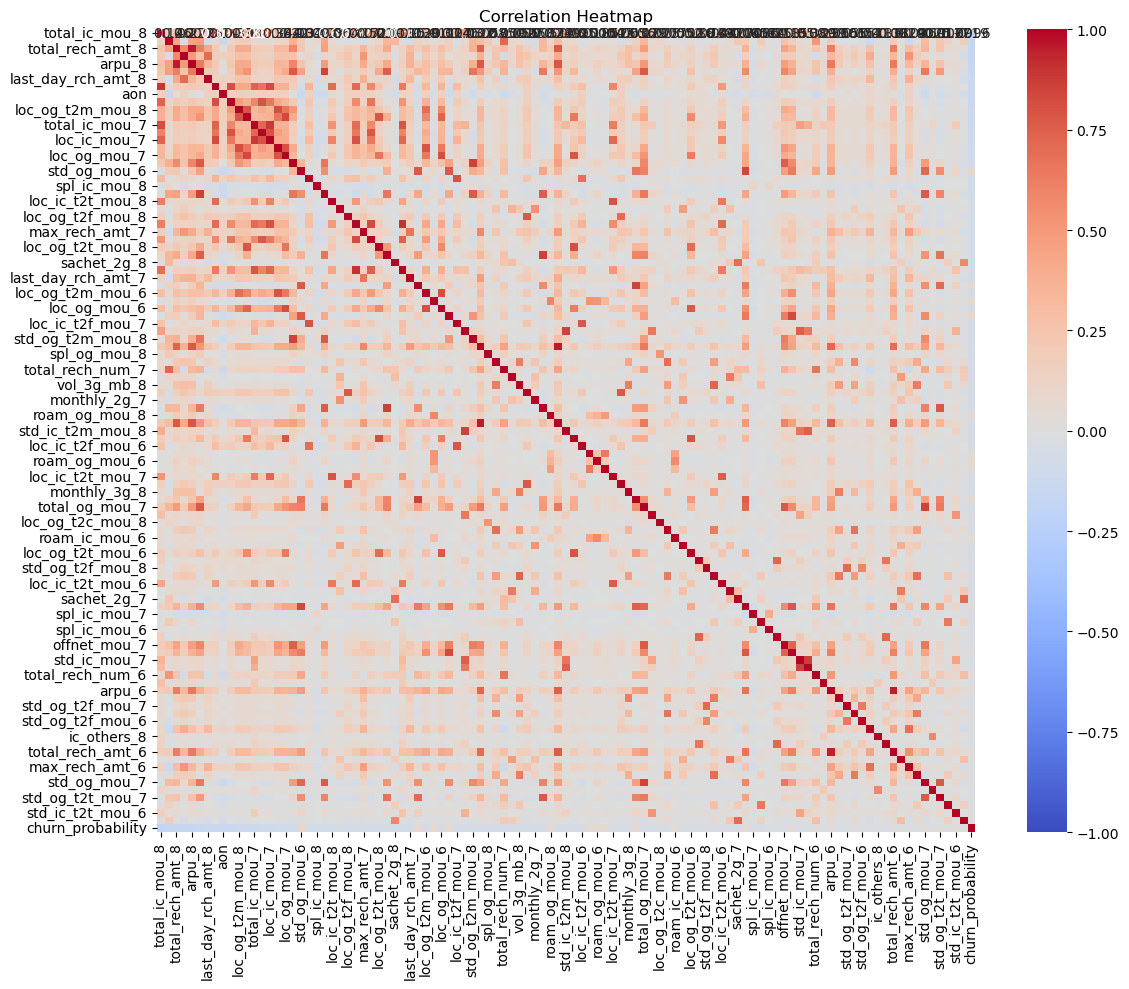

In [115]:
corr_matrix = churn_train2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Performing the bivariate analysis for the left over variables with target variable

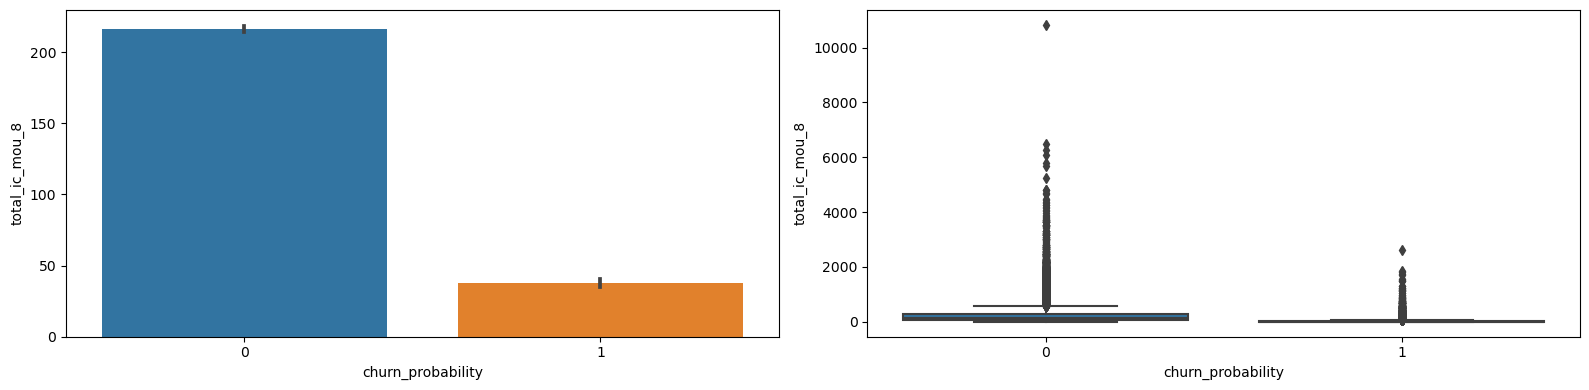

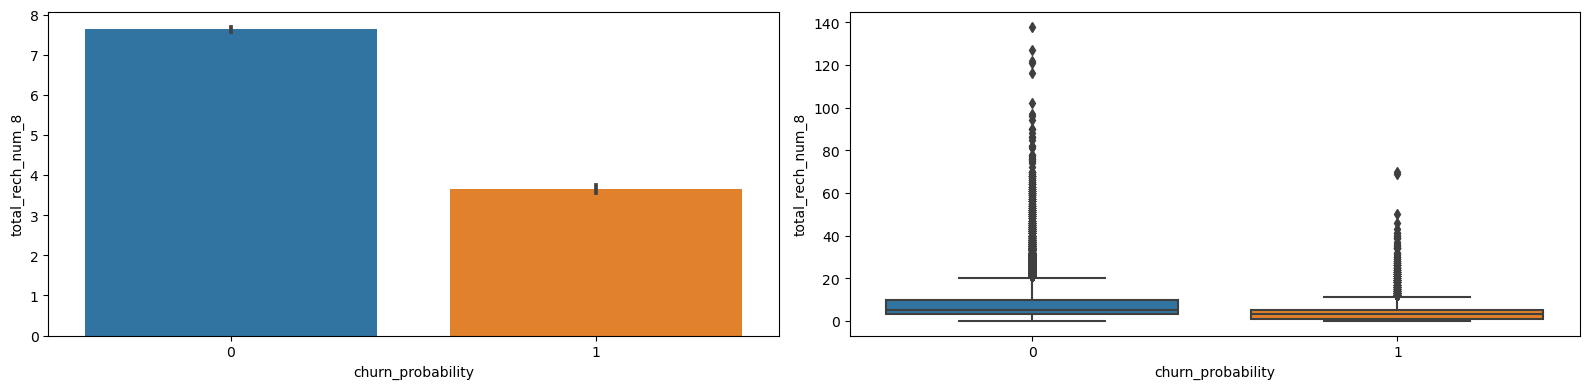

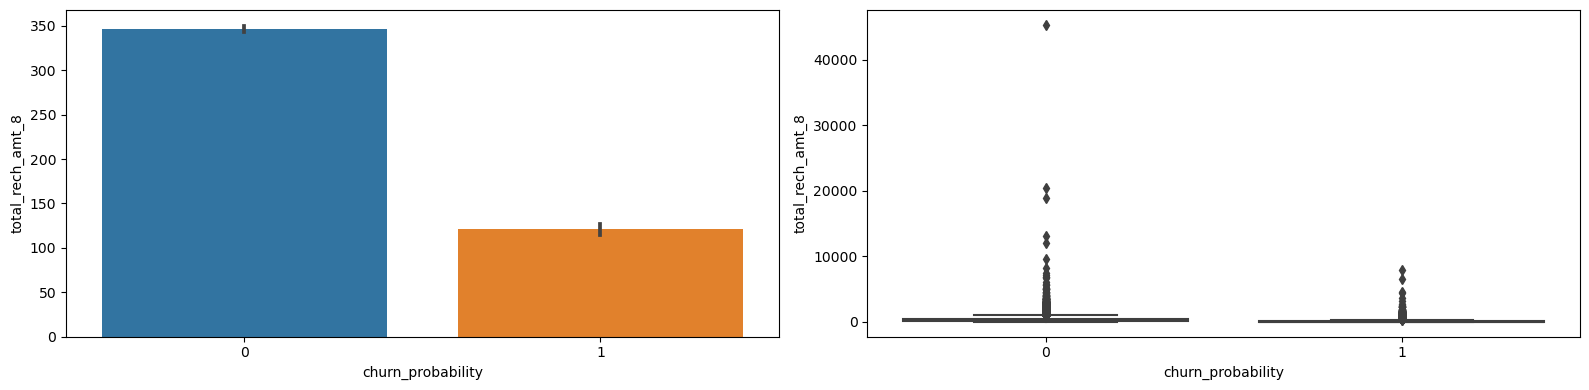

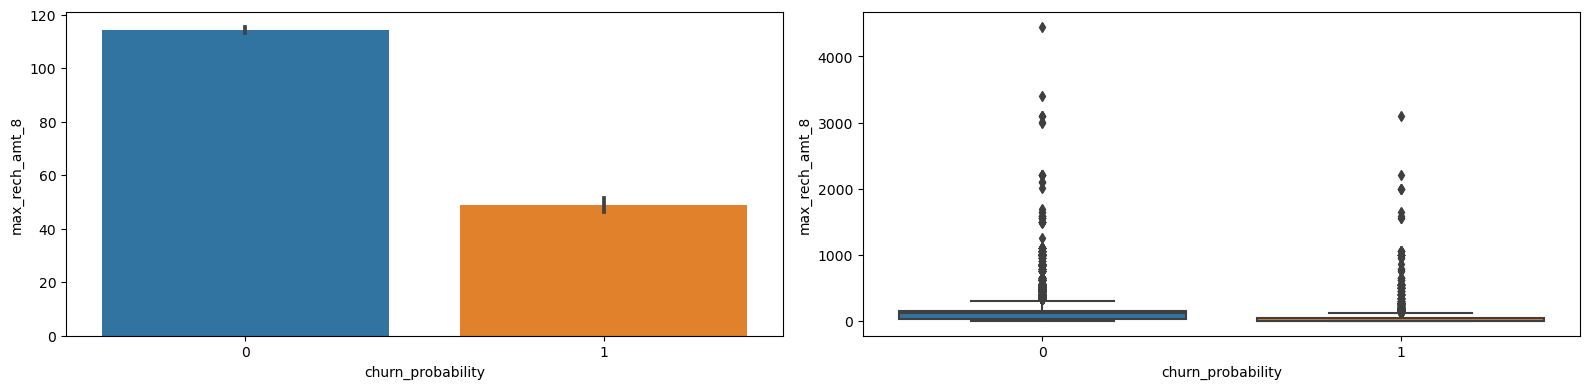

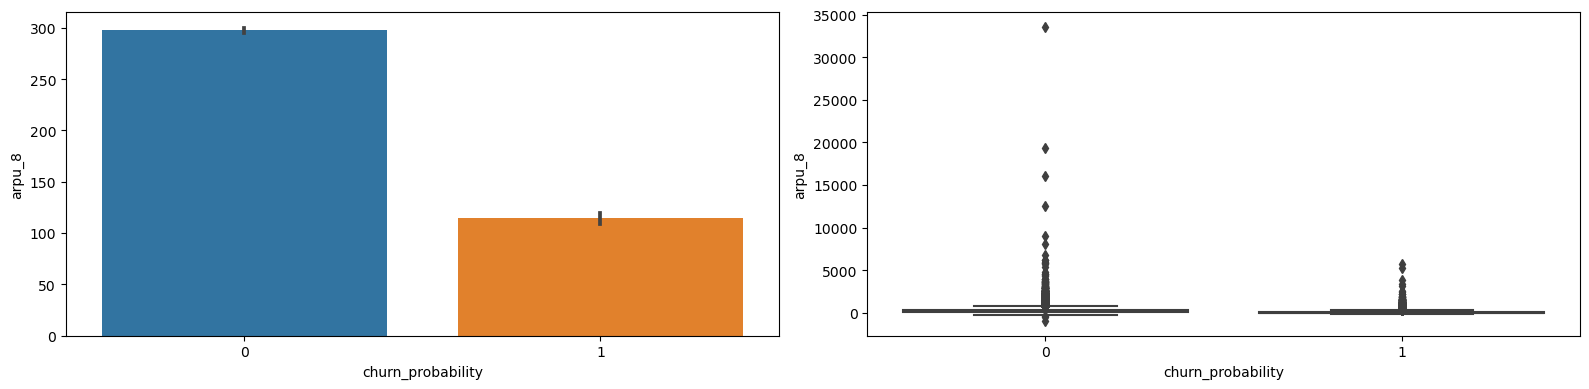

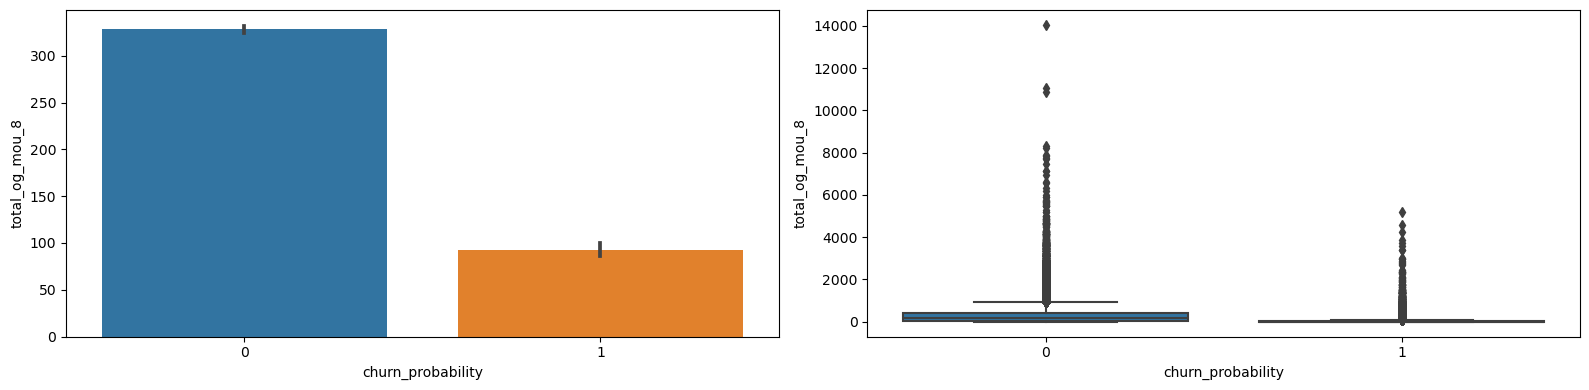

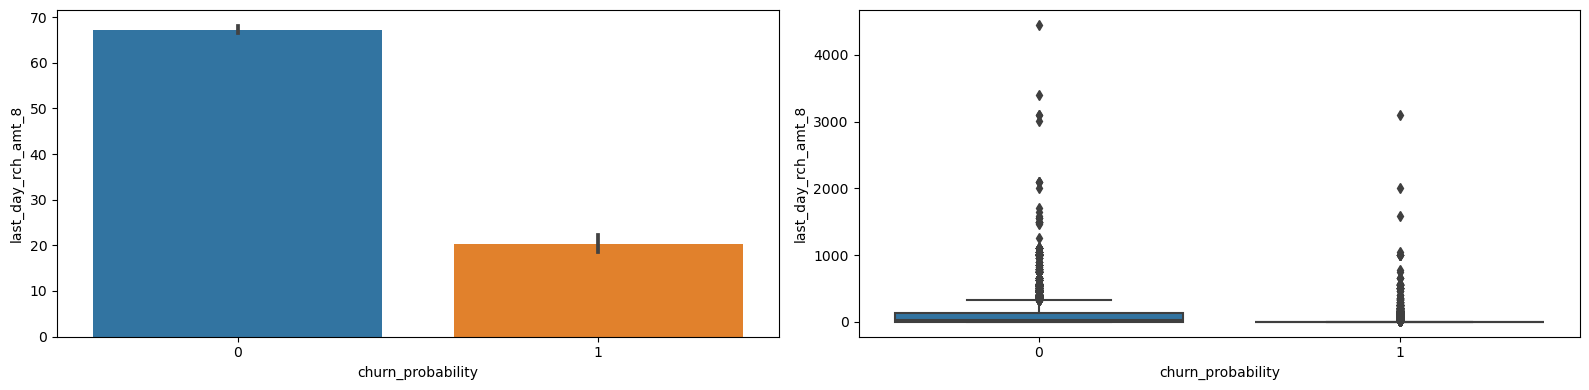

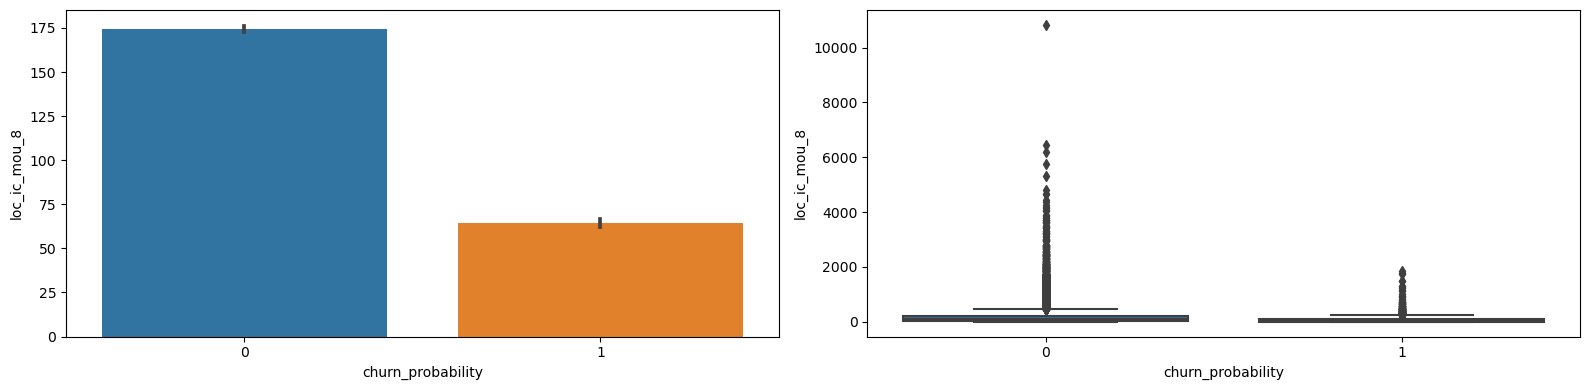

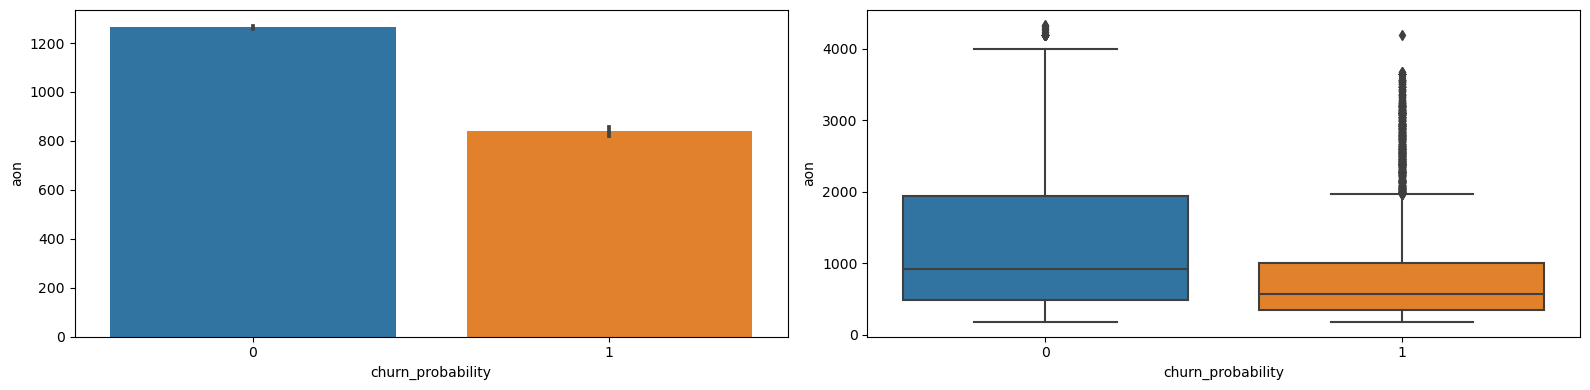

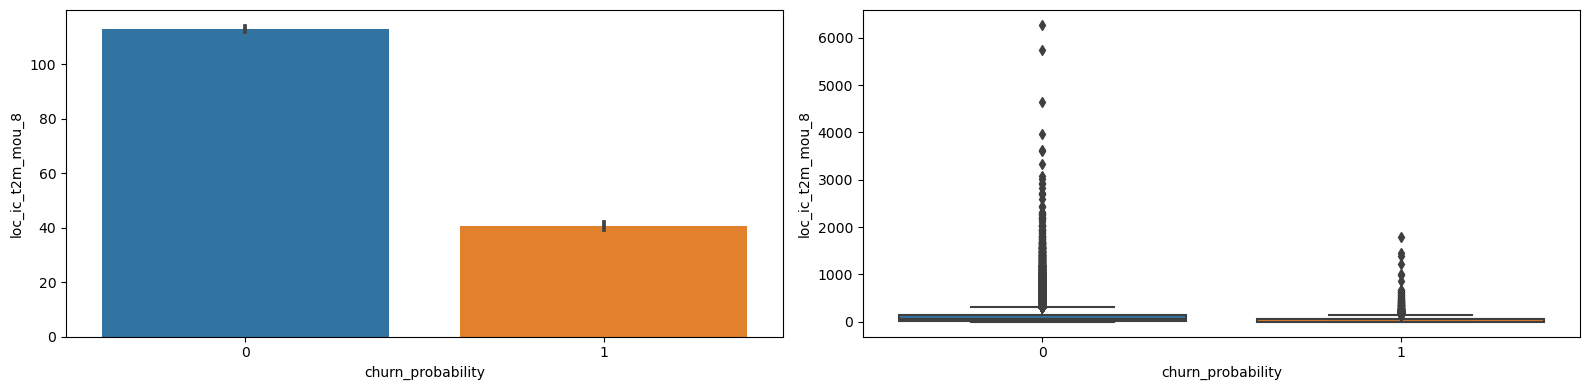

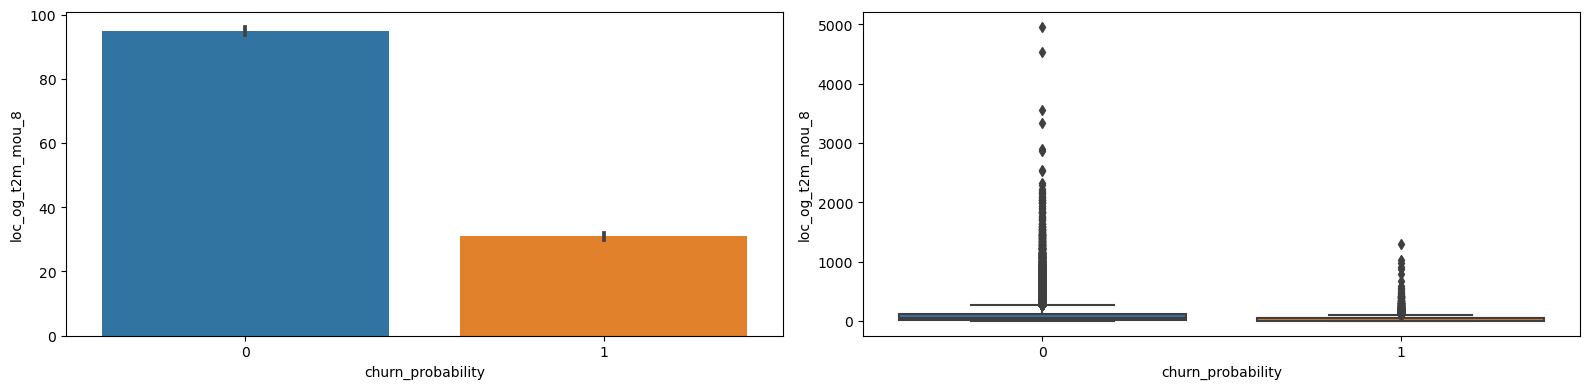

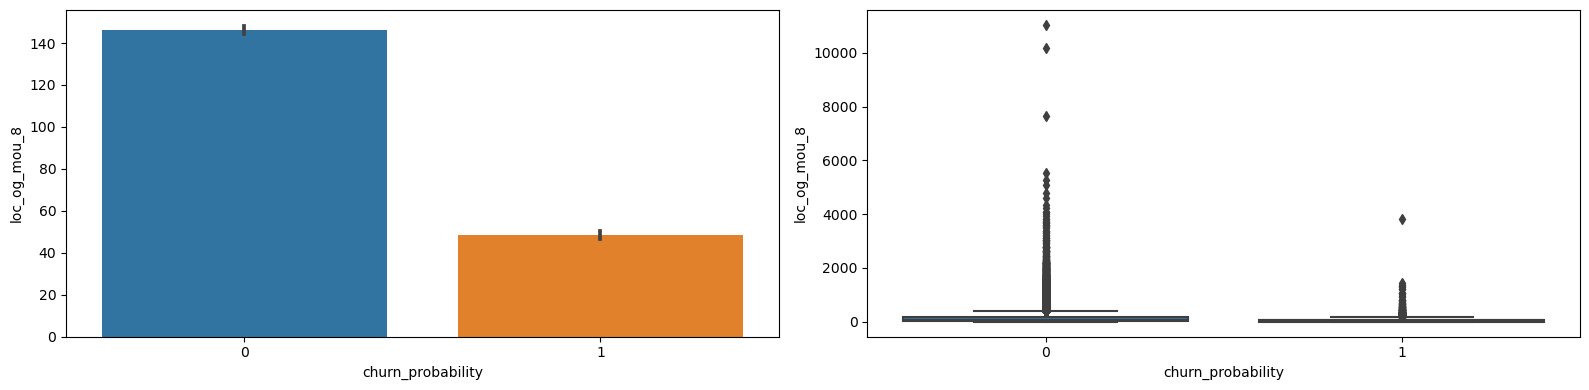

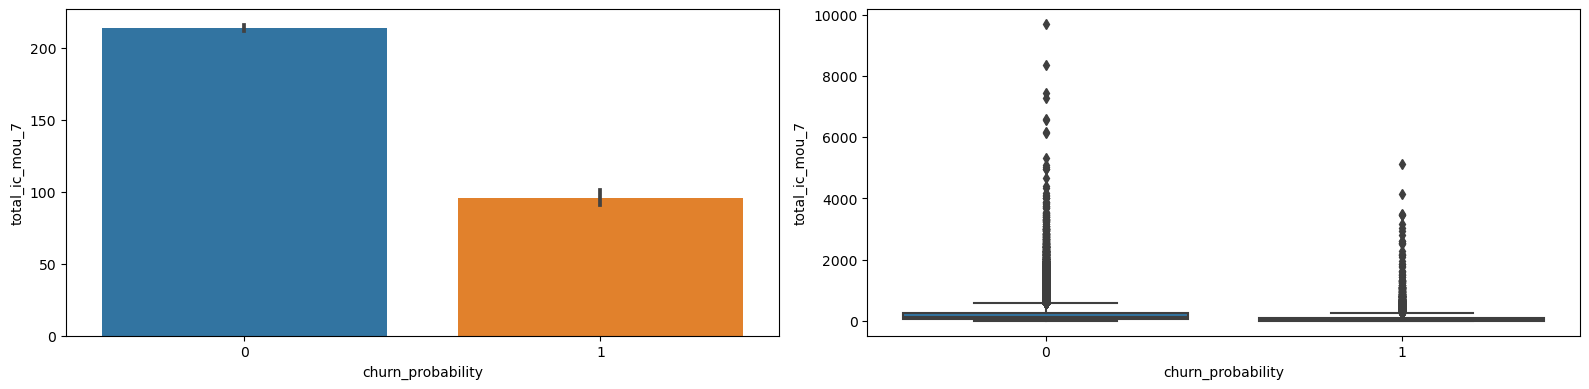

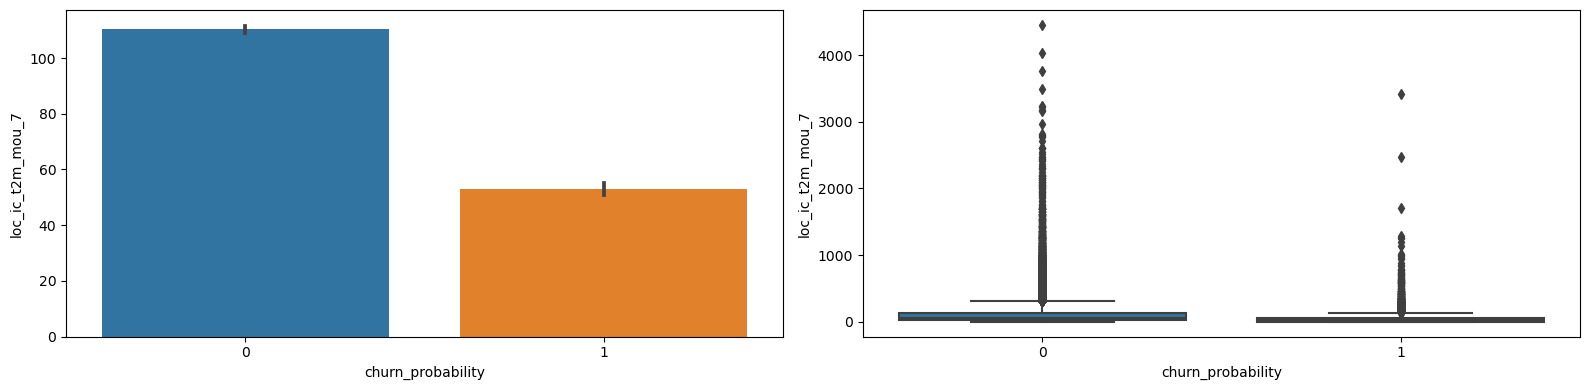

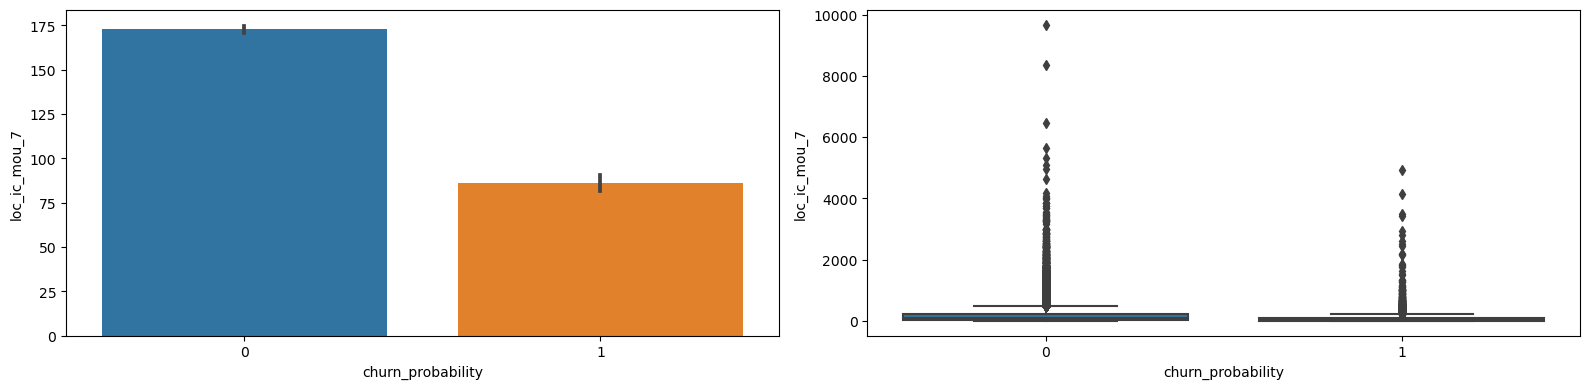

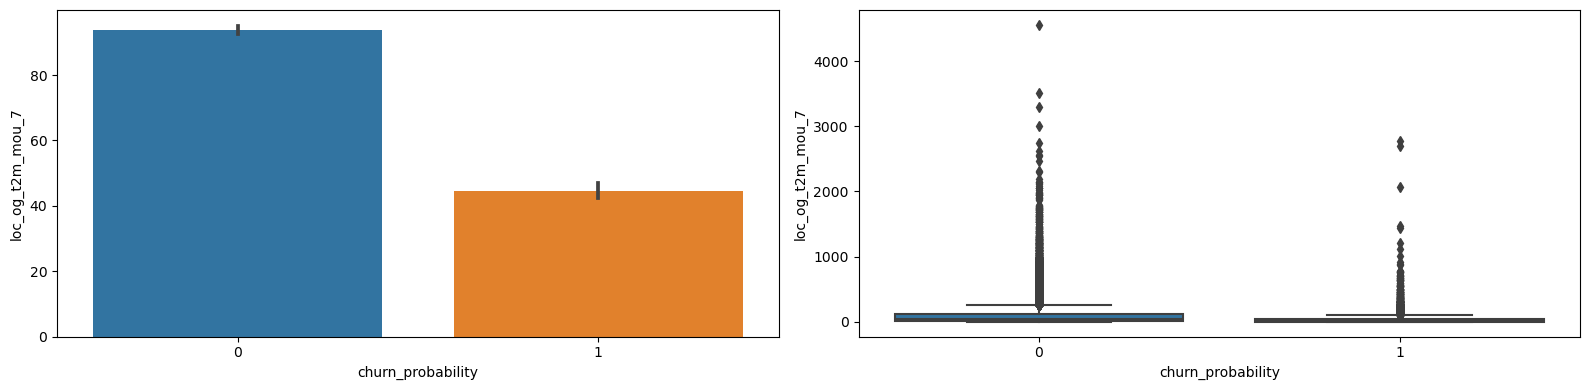

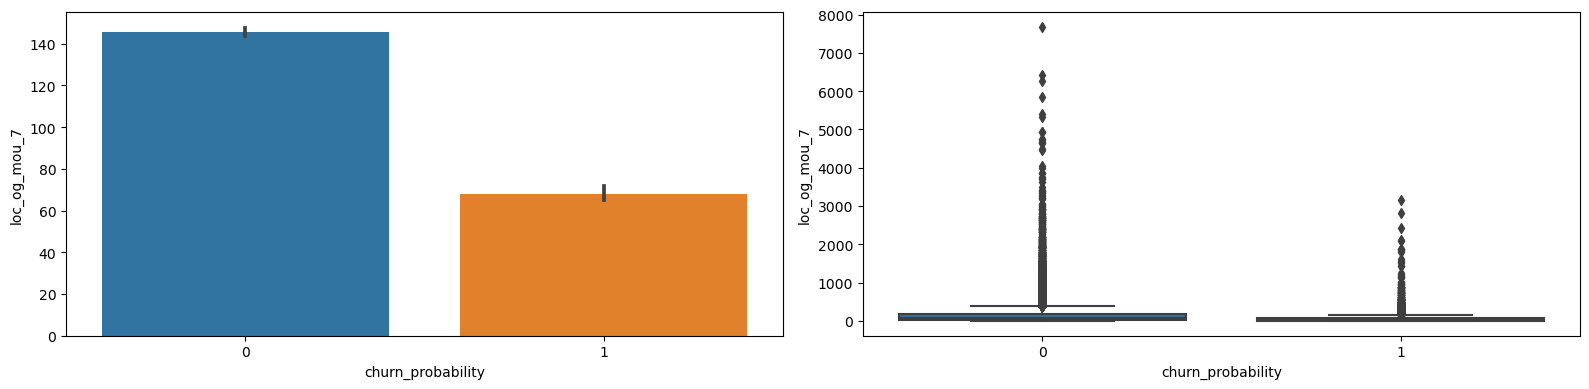

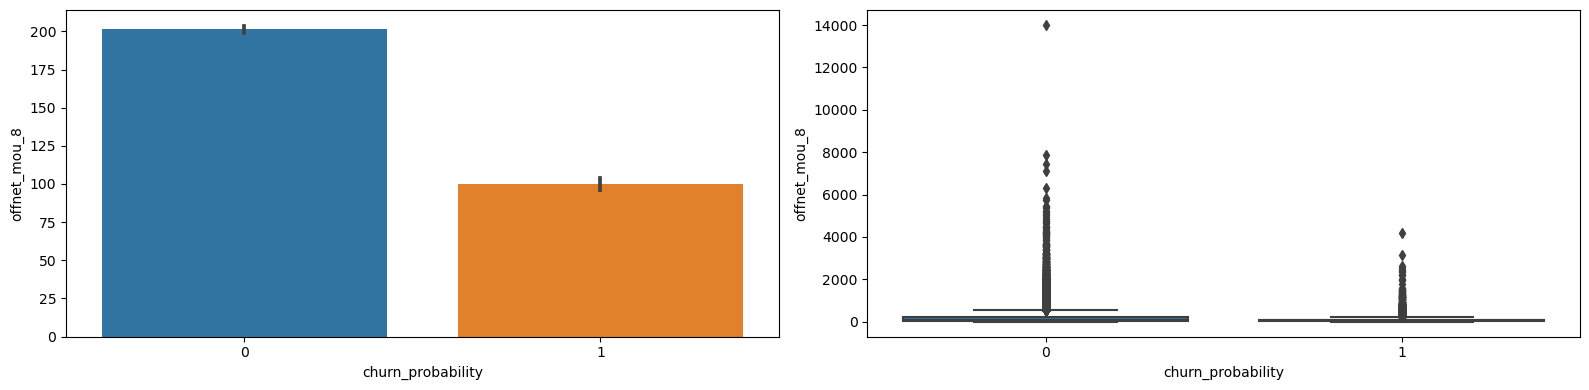

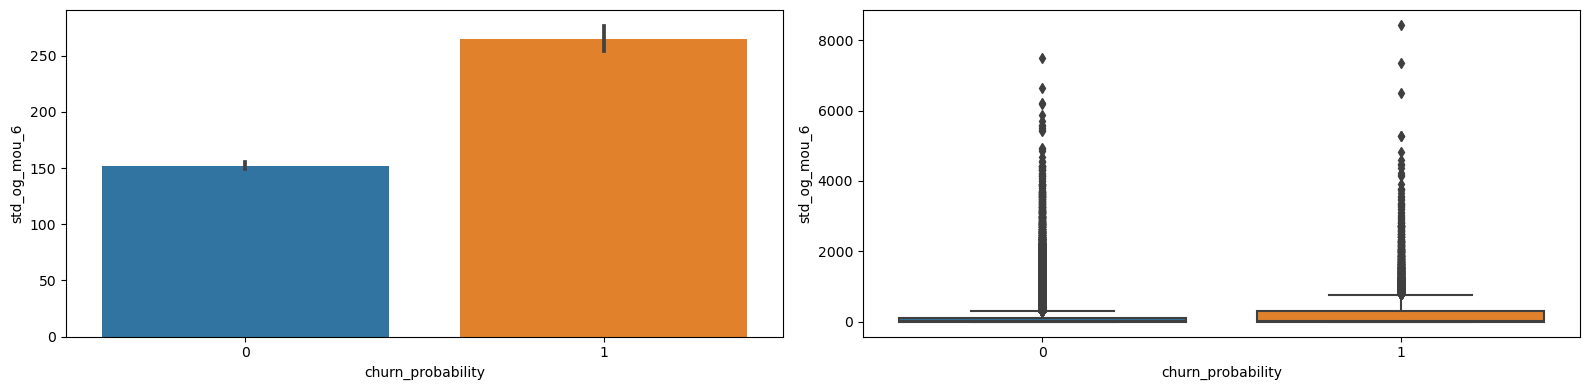

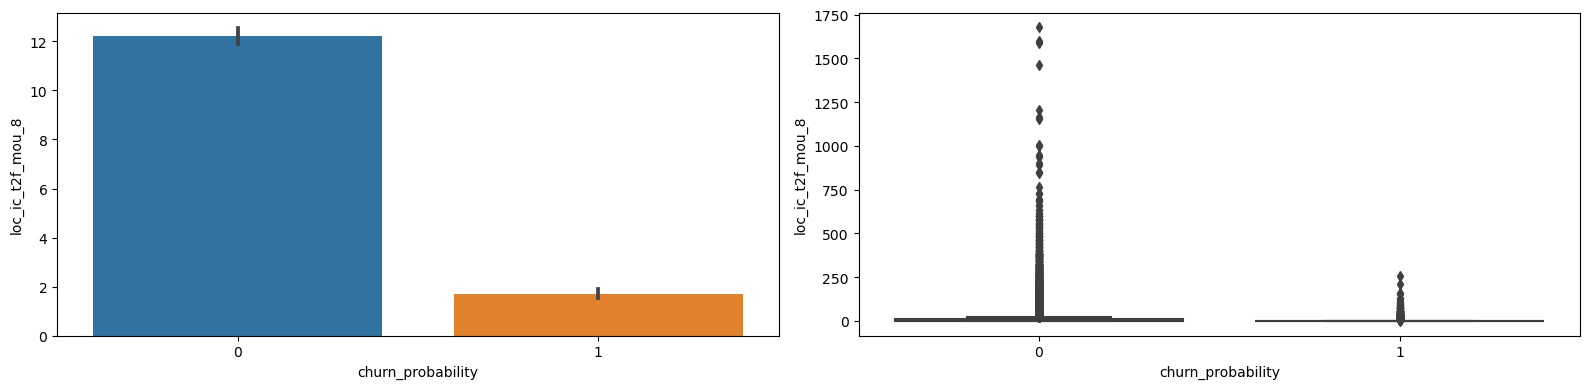

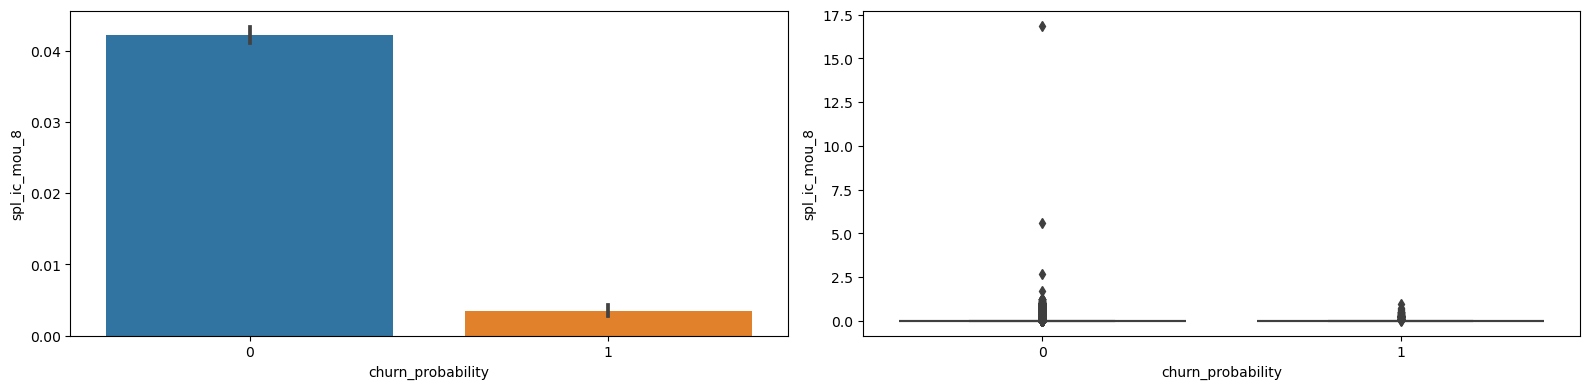

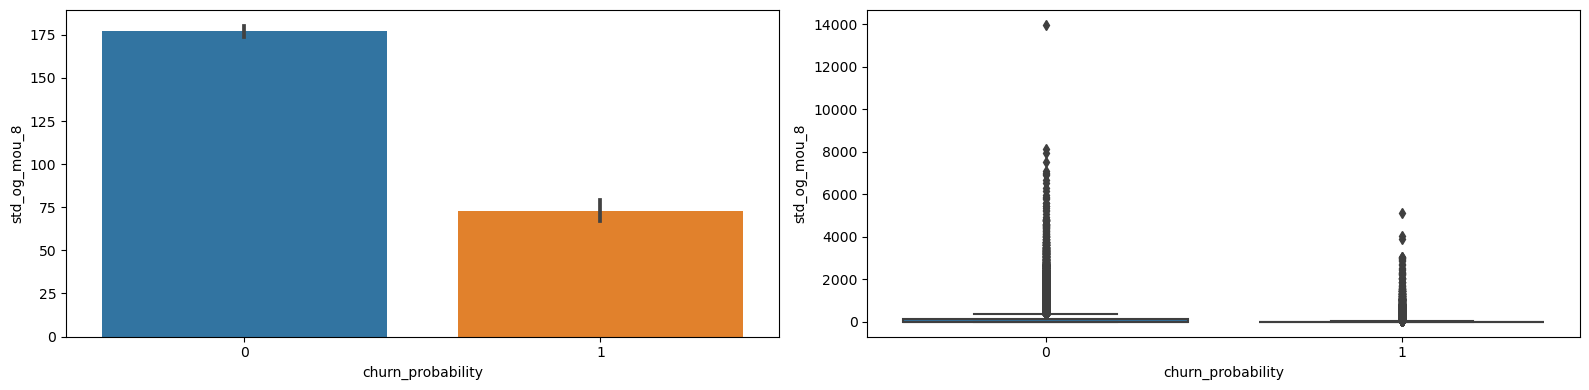

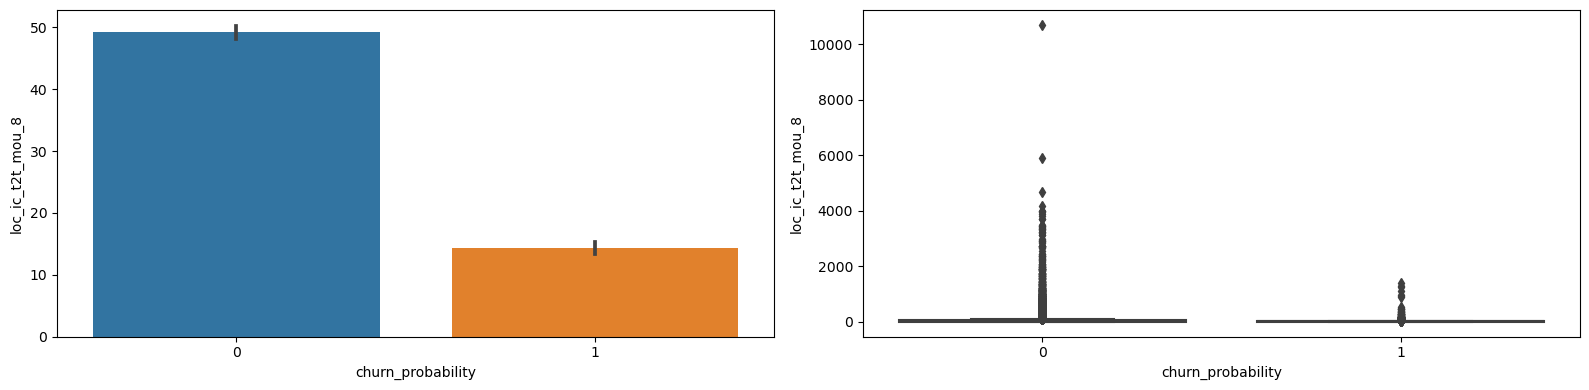

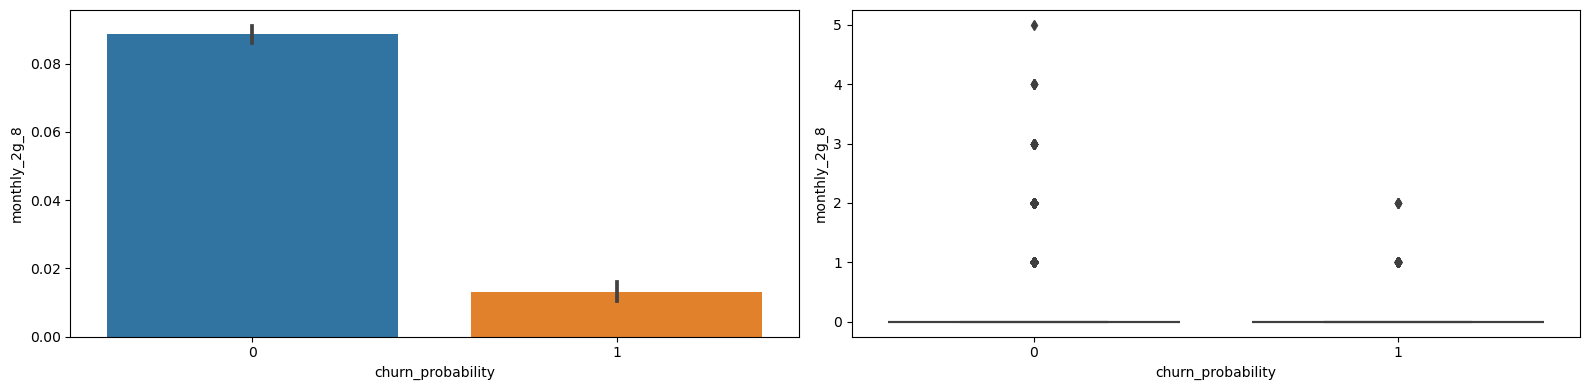

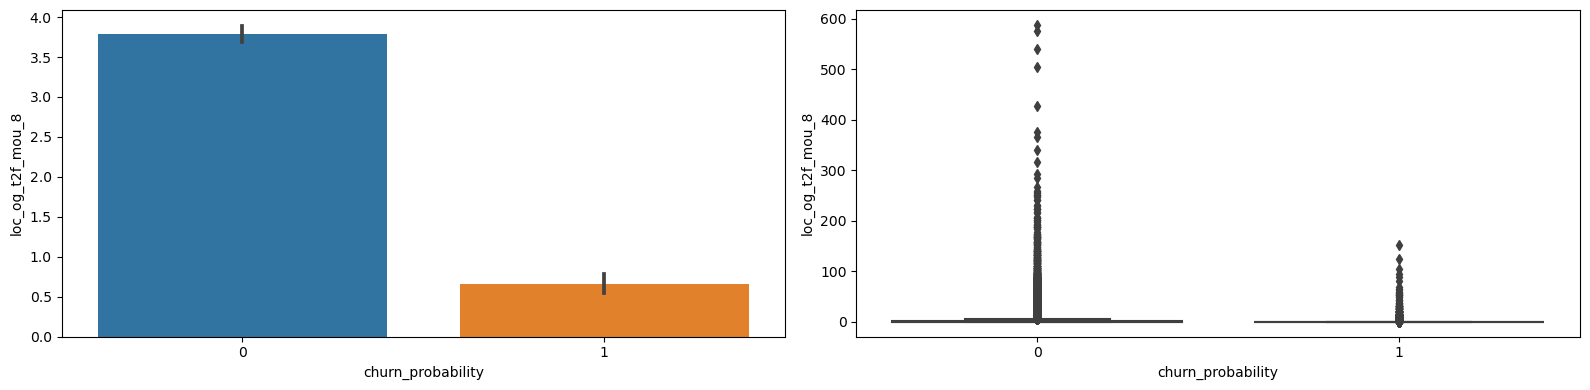

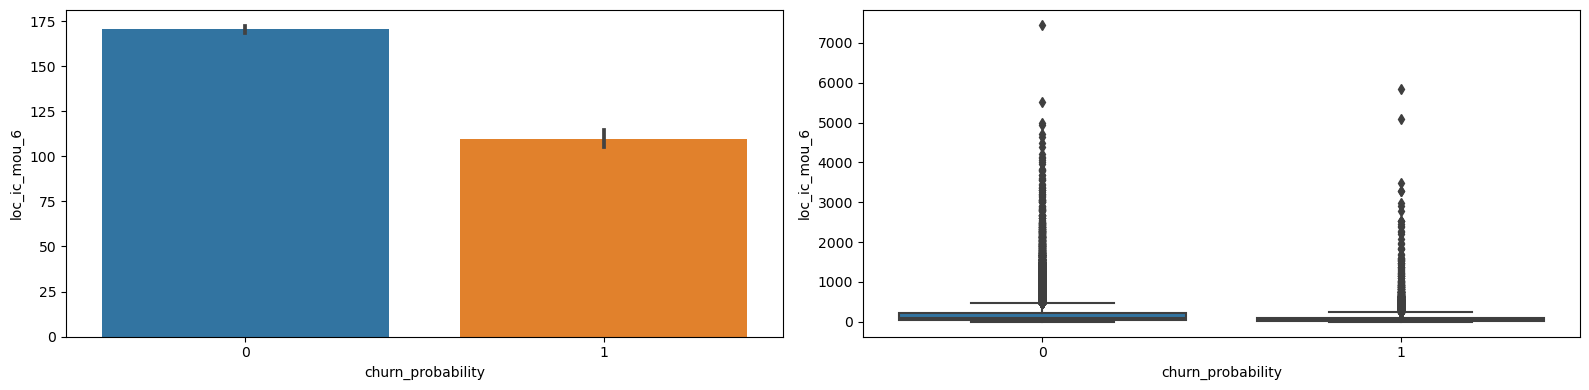

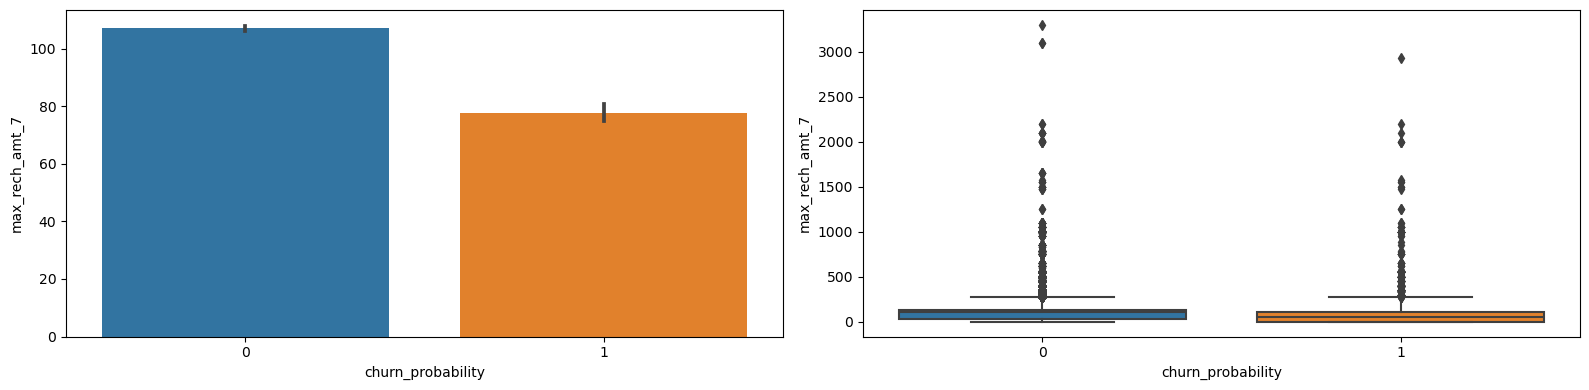

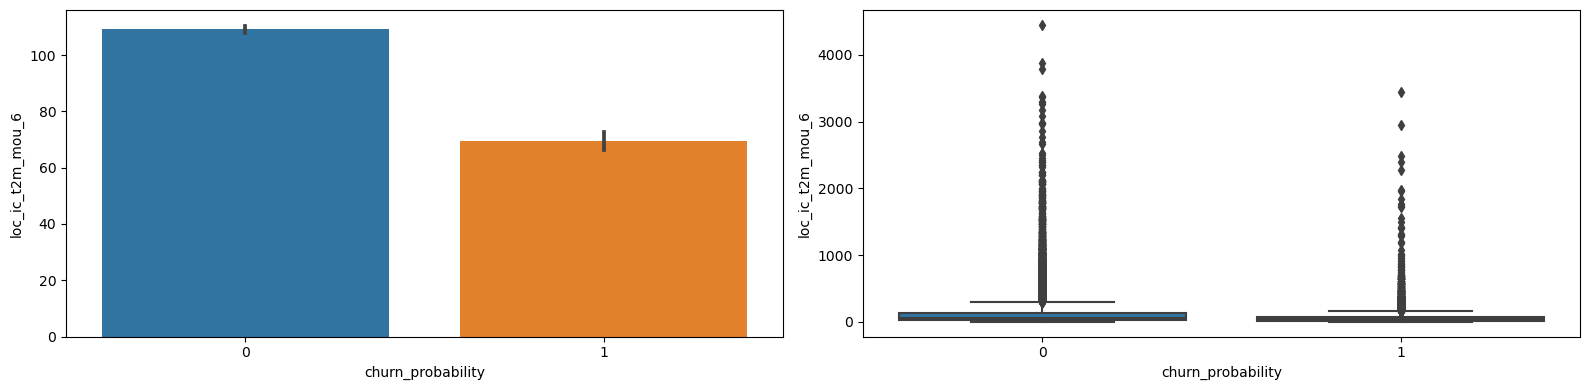

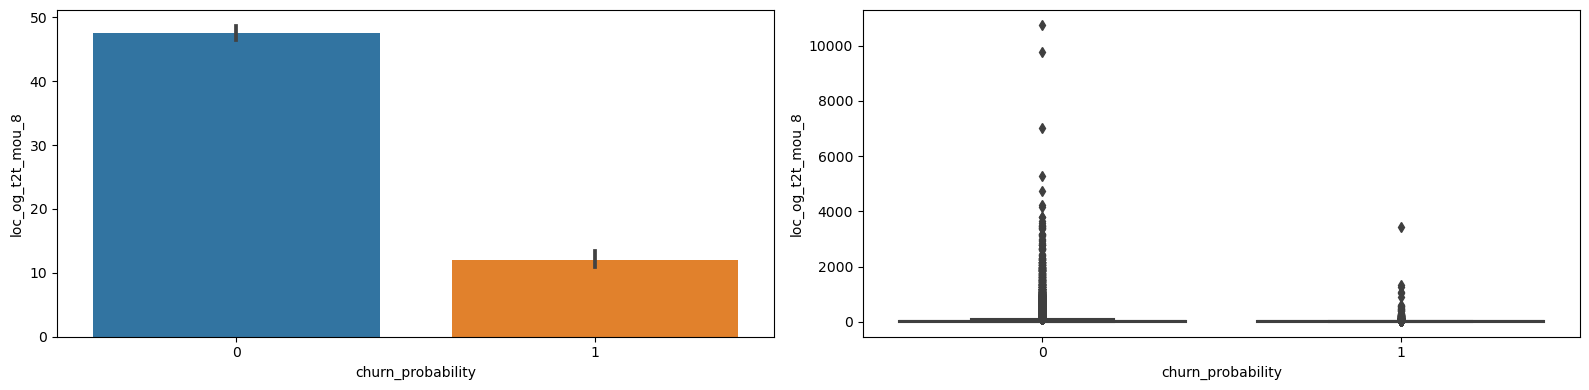

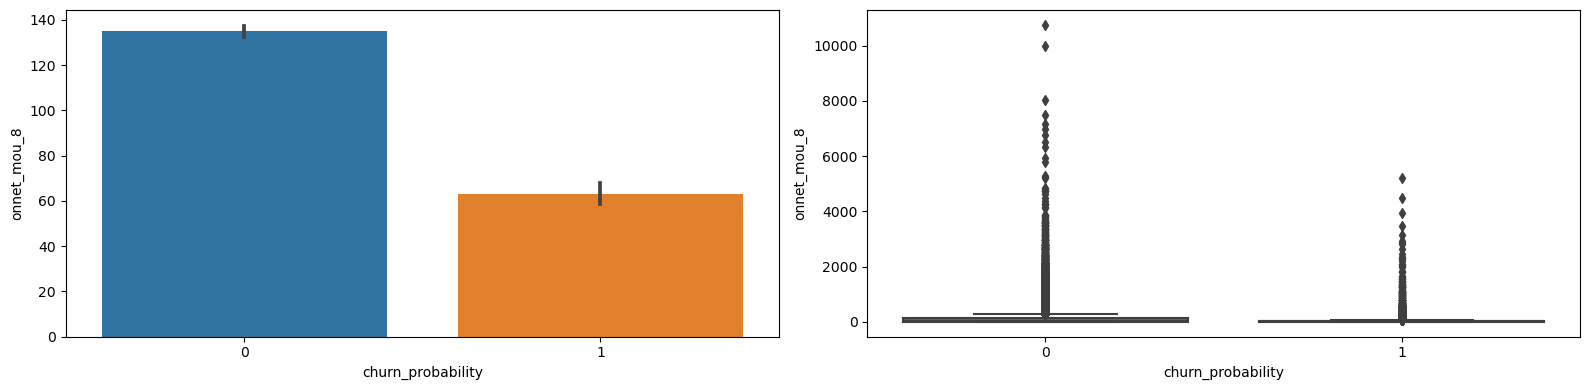

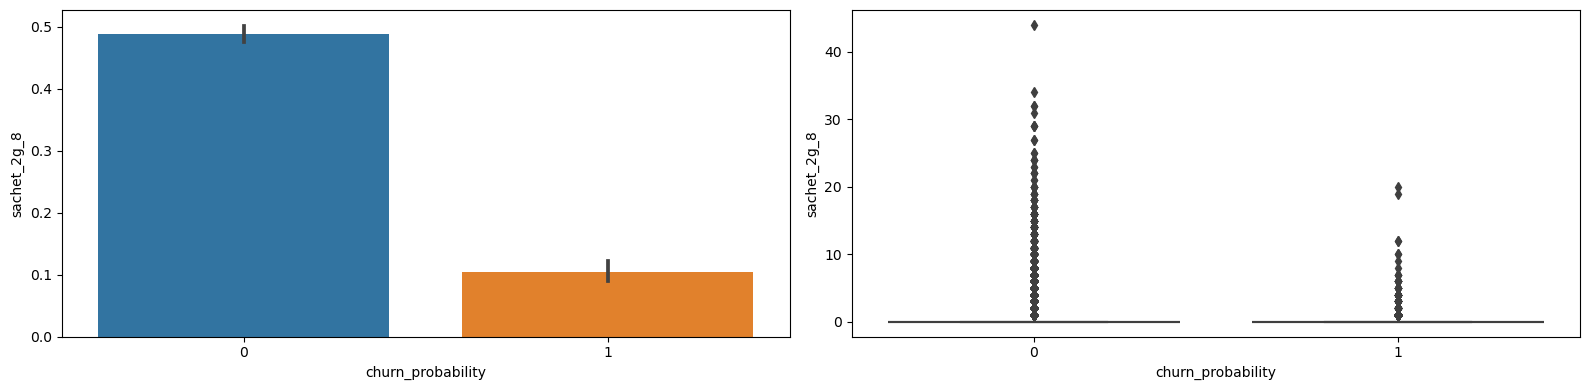

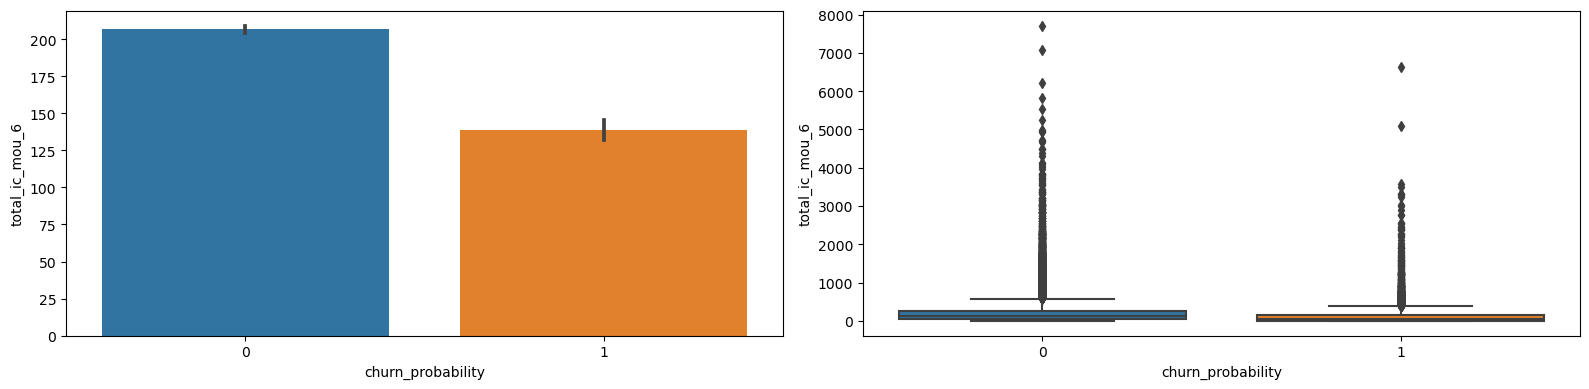

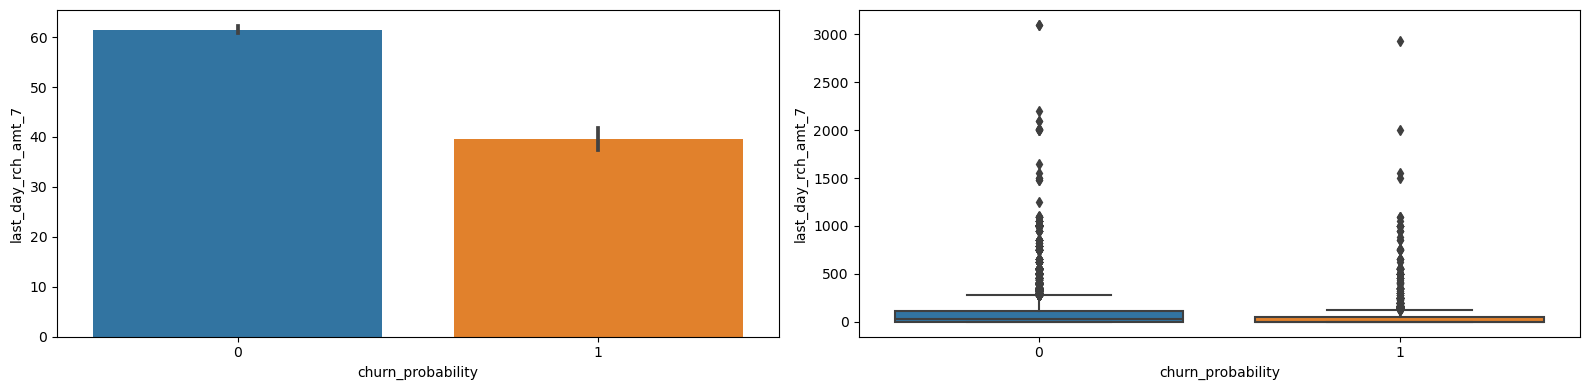

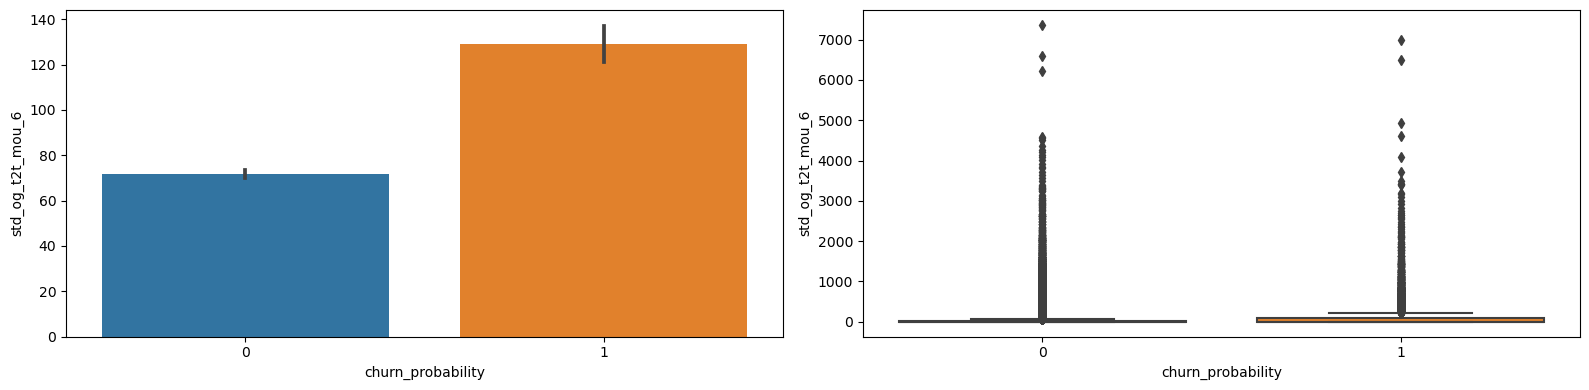

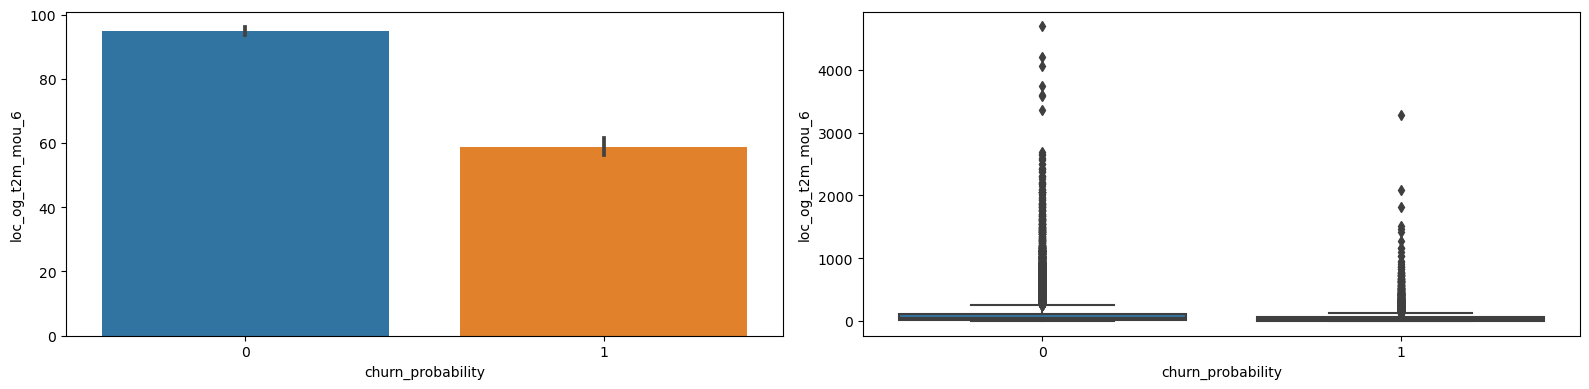

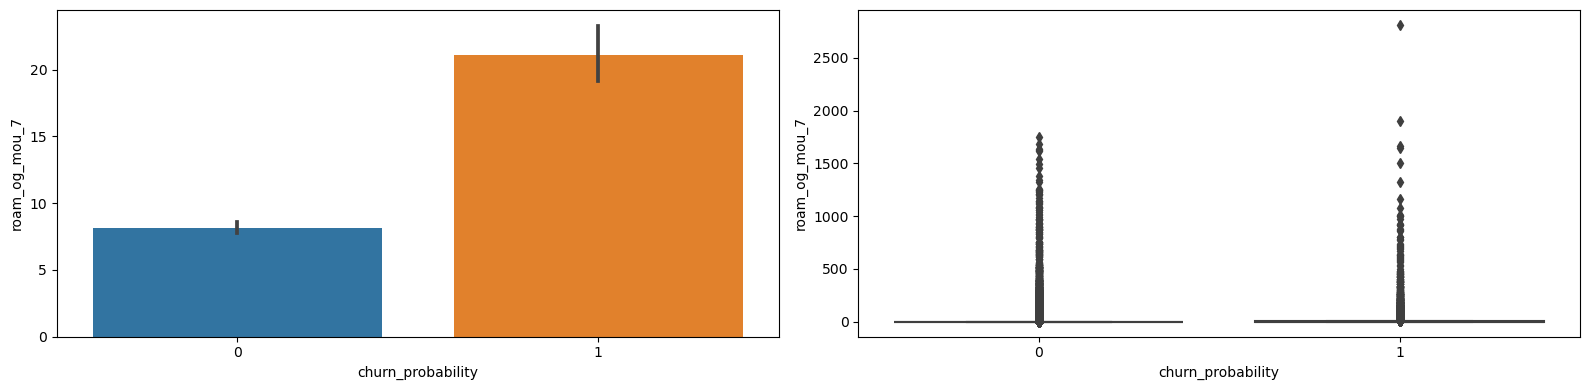

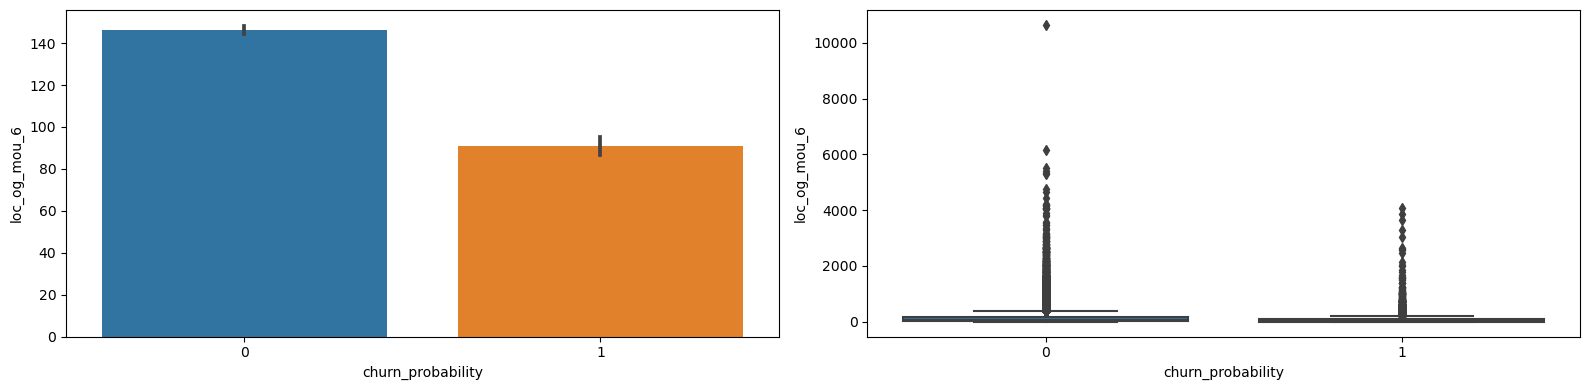

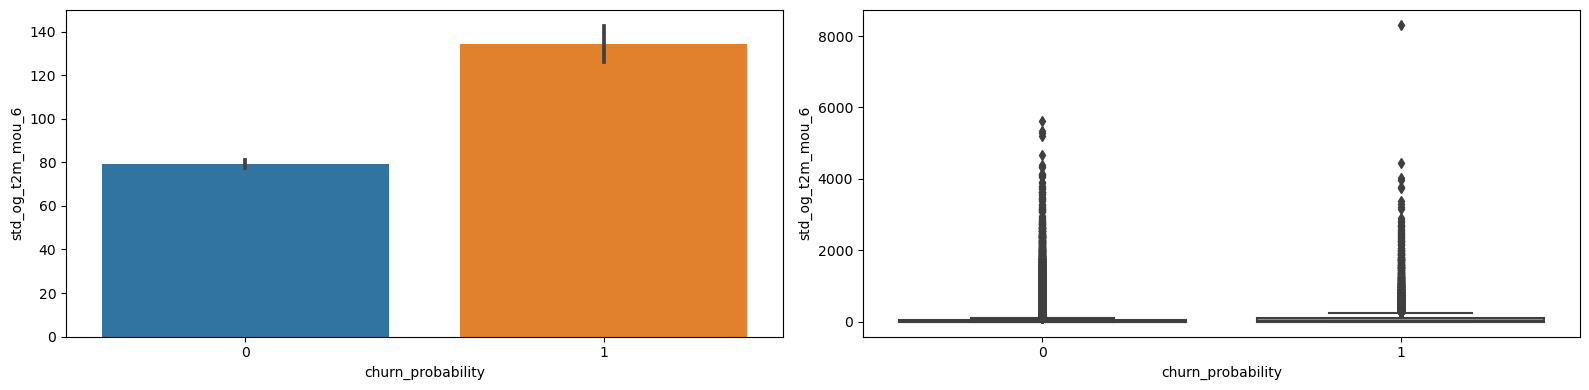

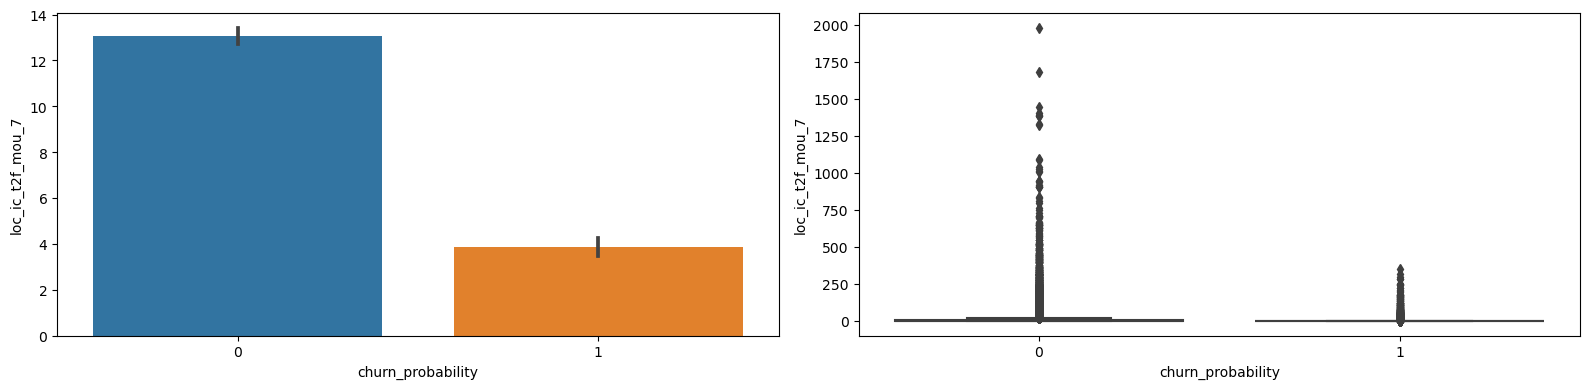

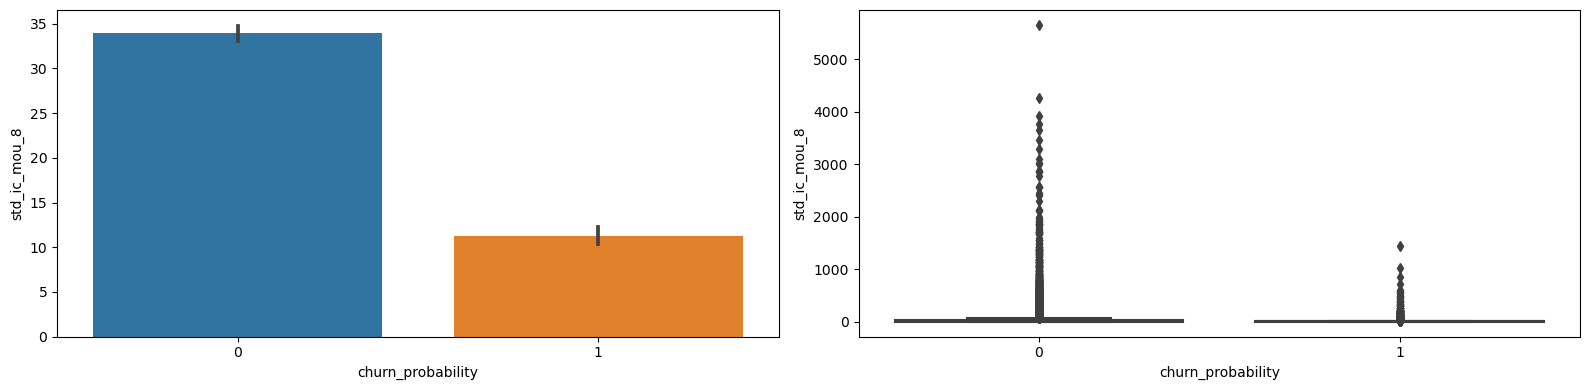

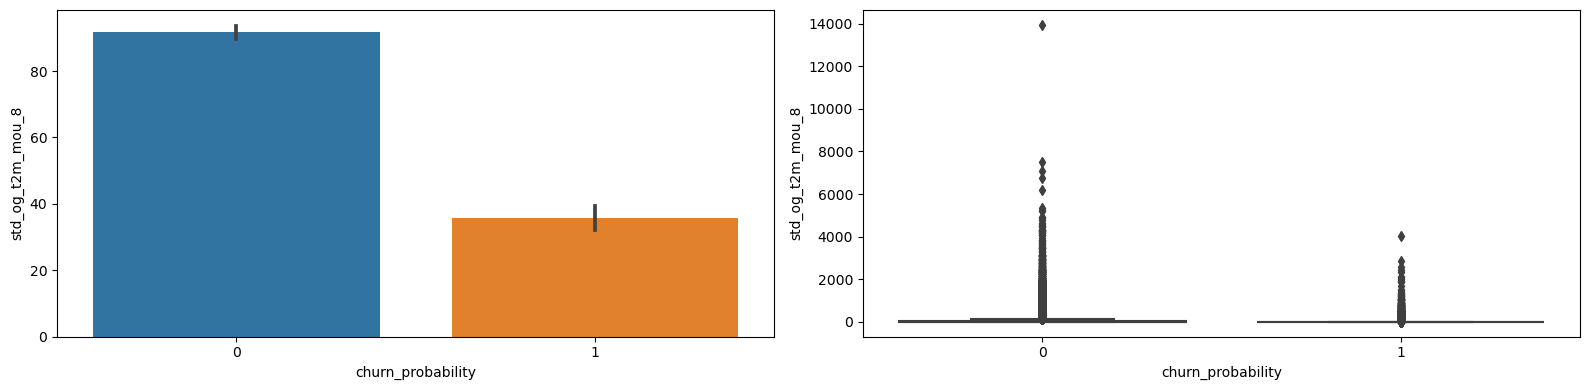

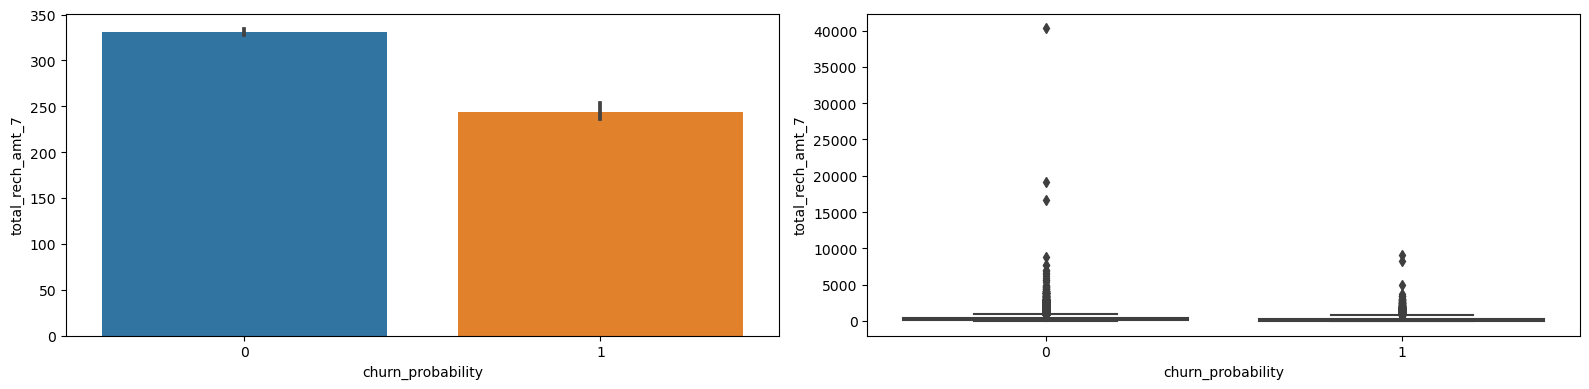

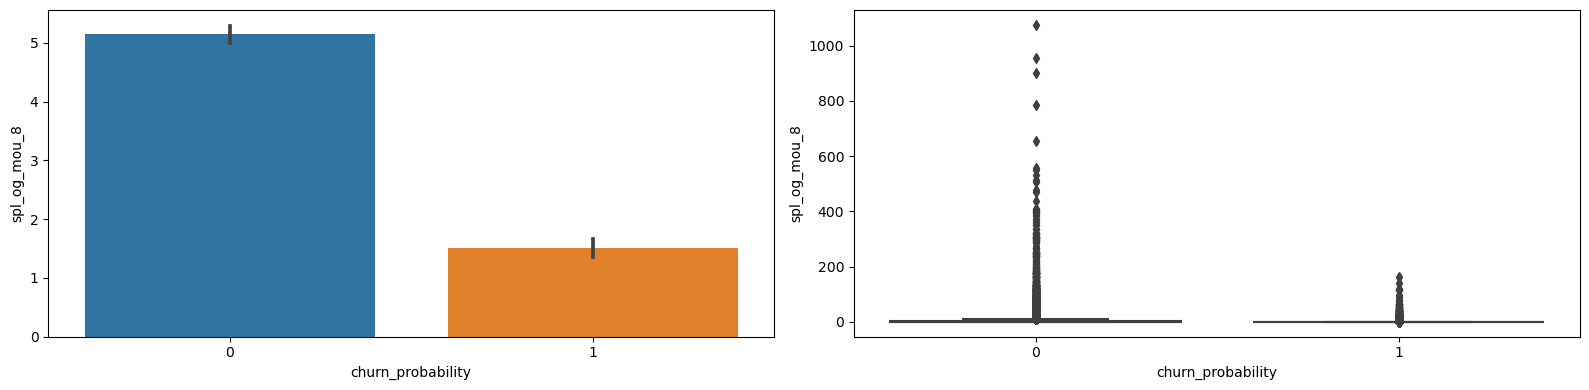

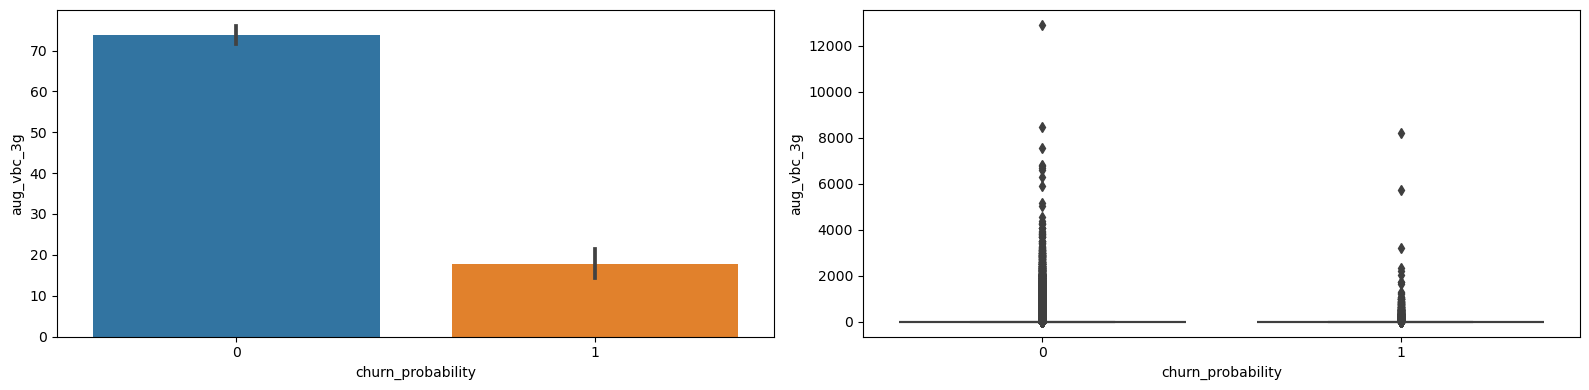

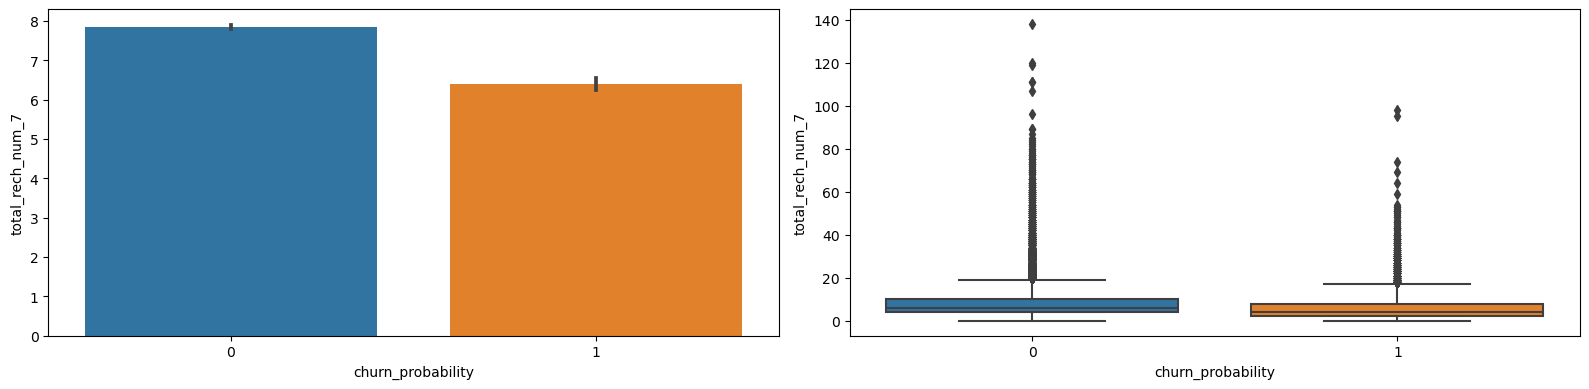

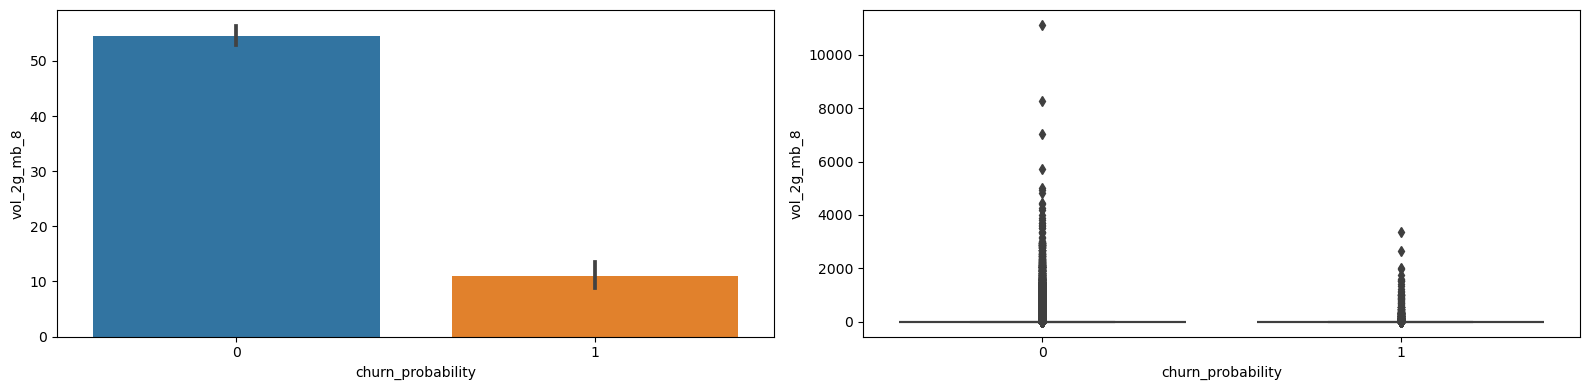

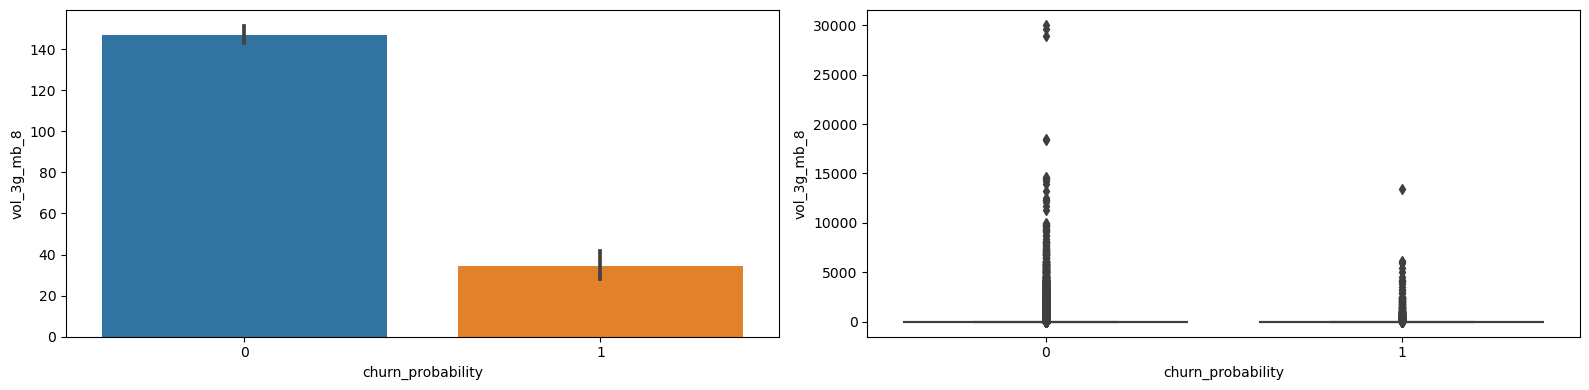

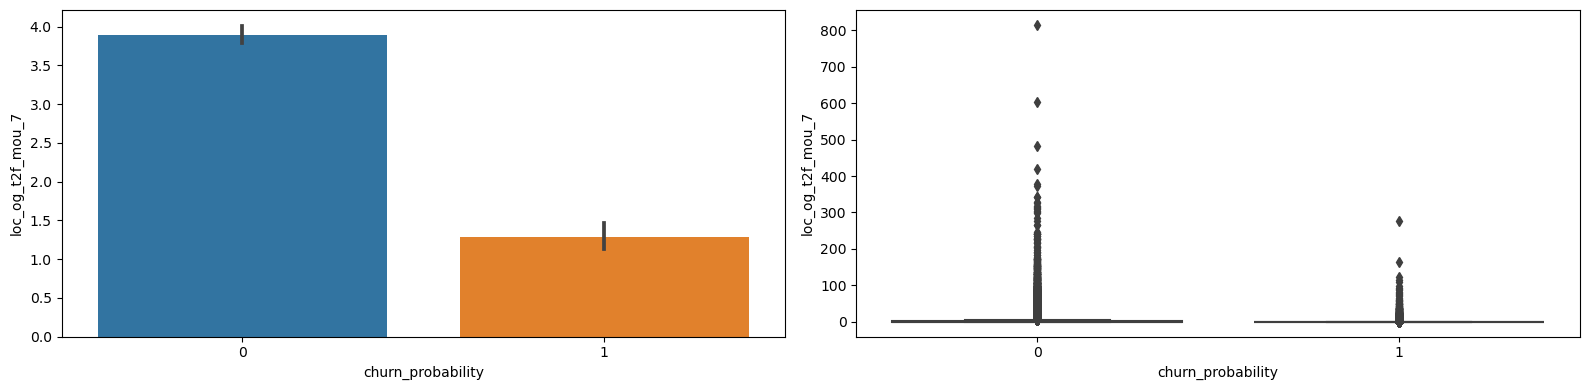

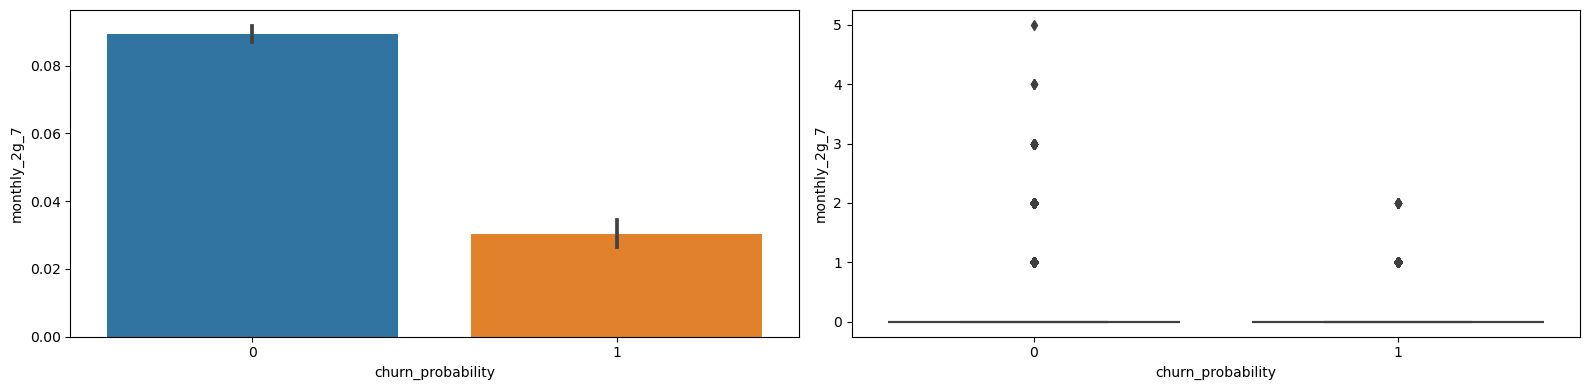

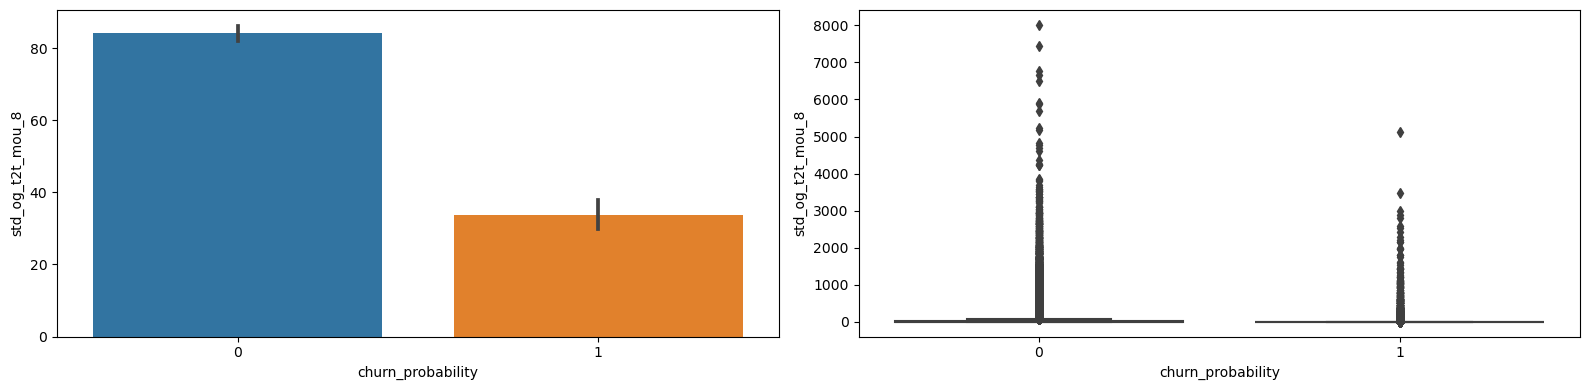

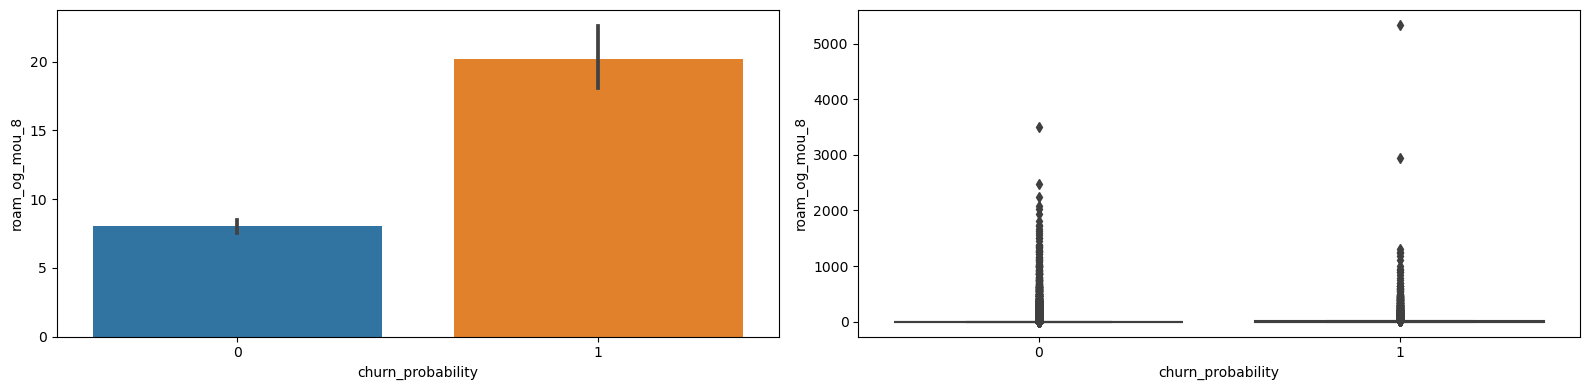

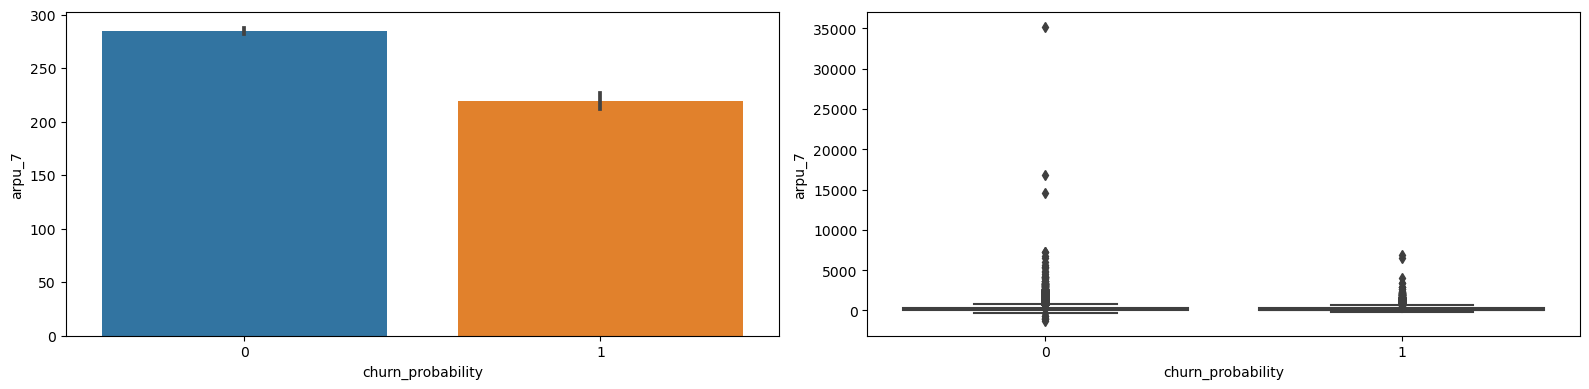

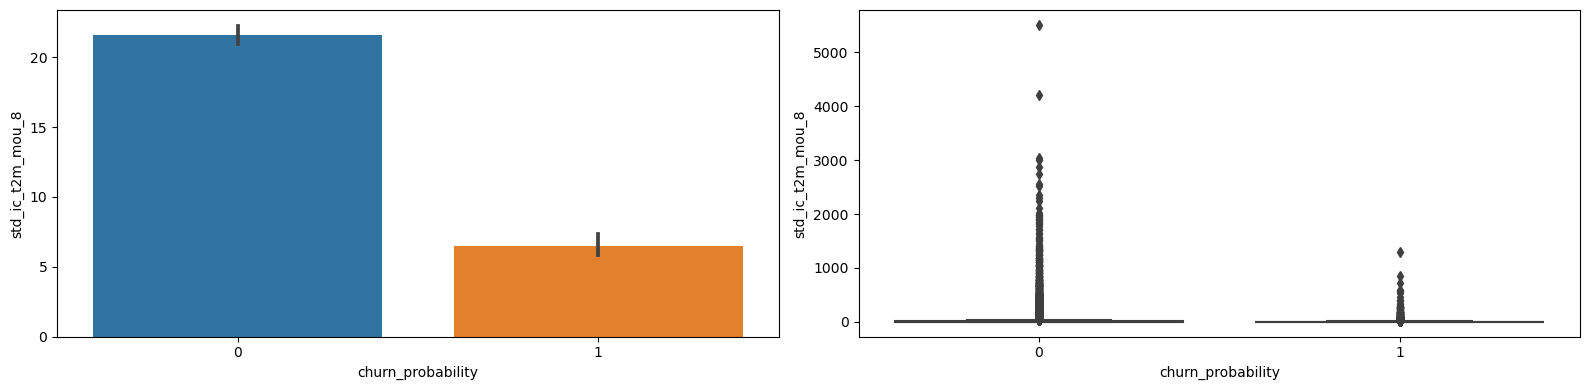

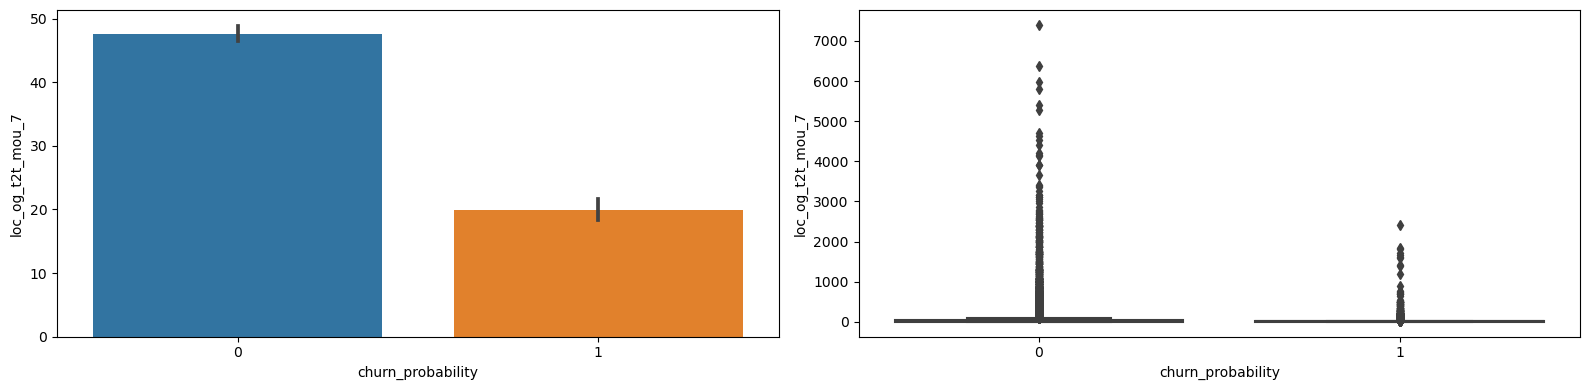

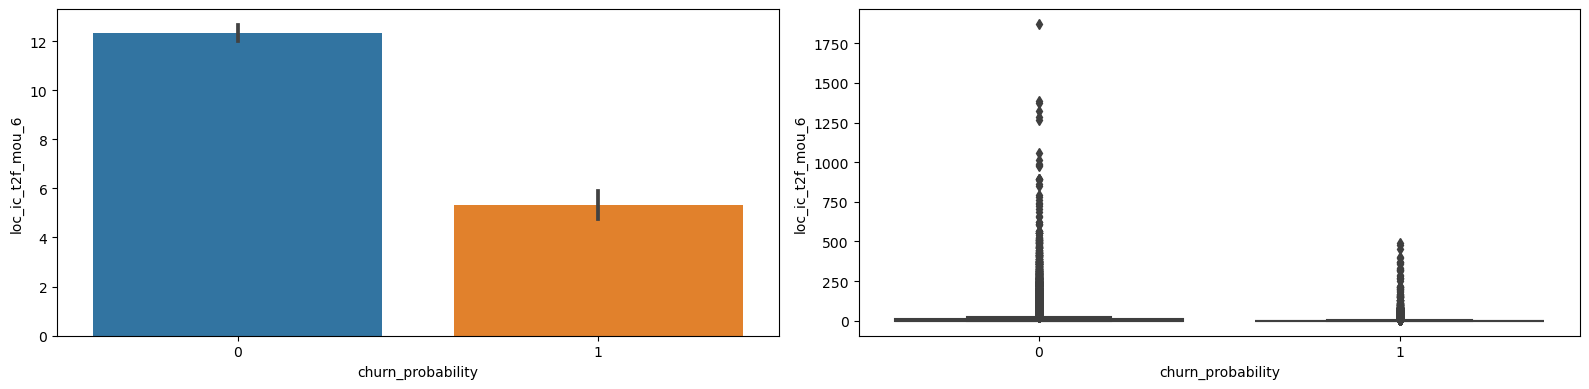

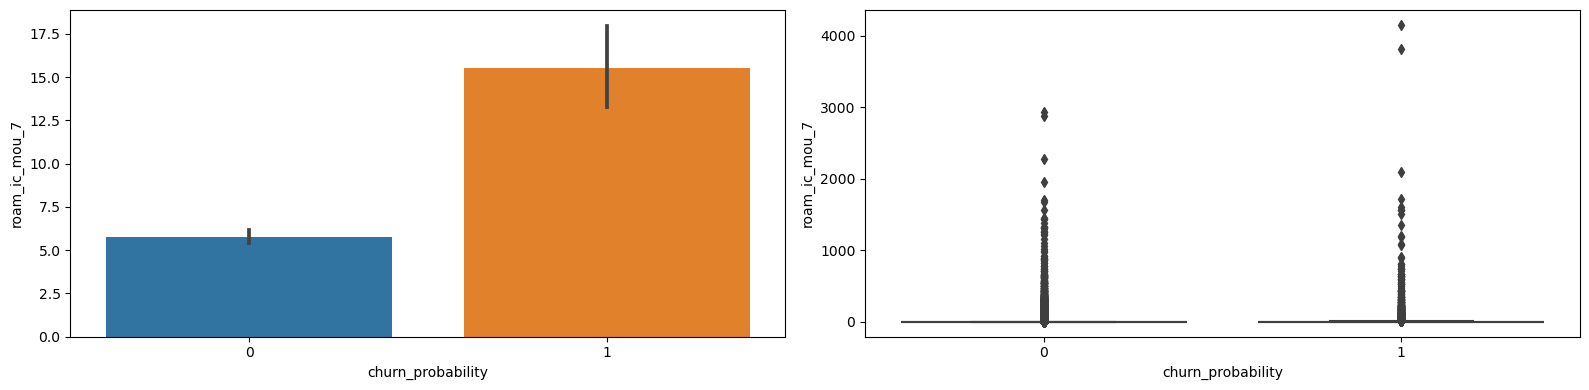

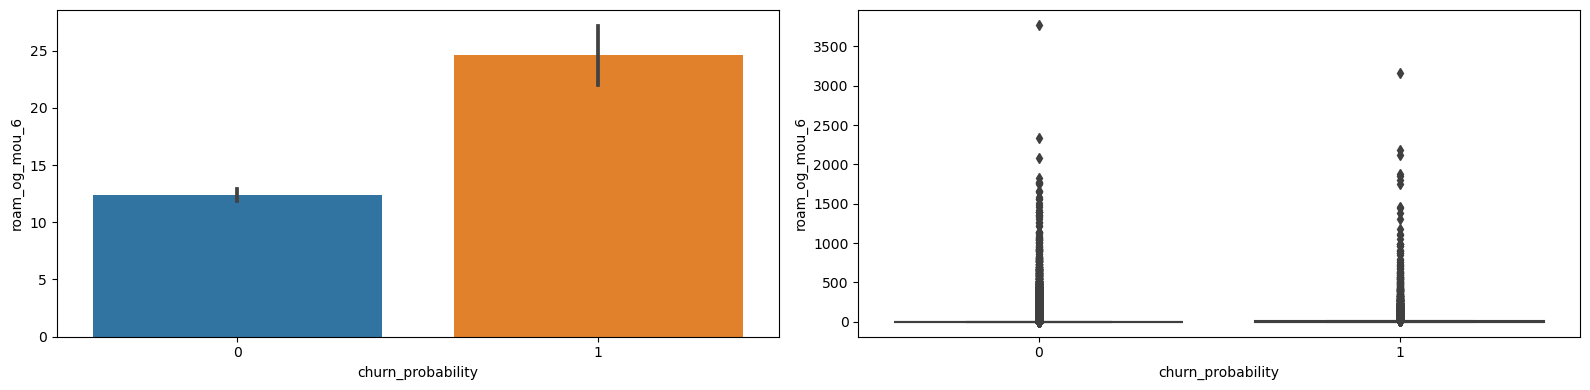

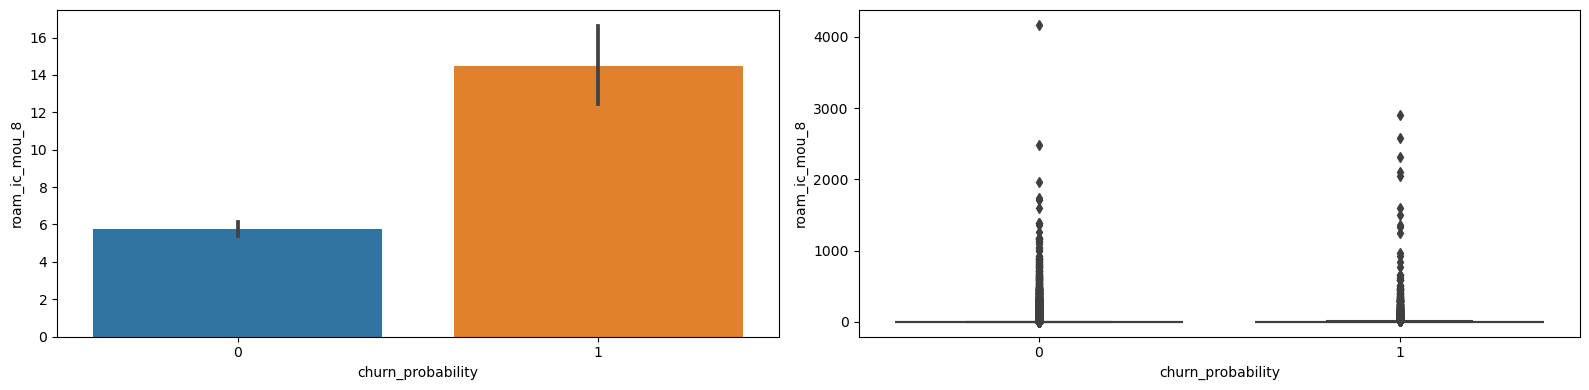

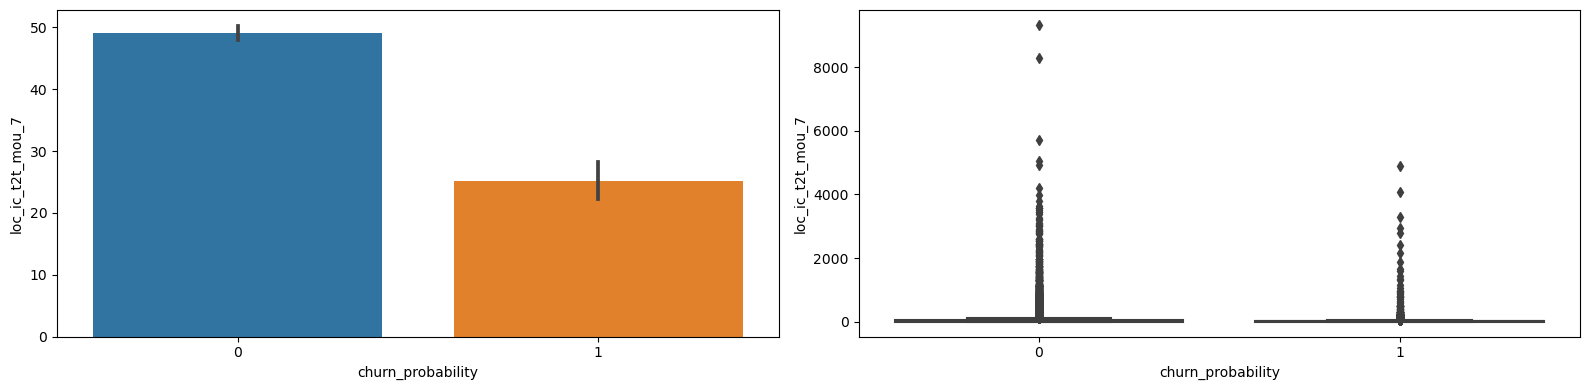

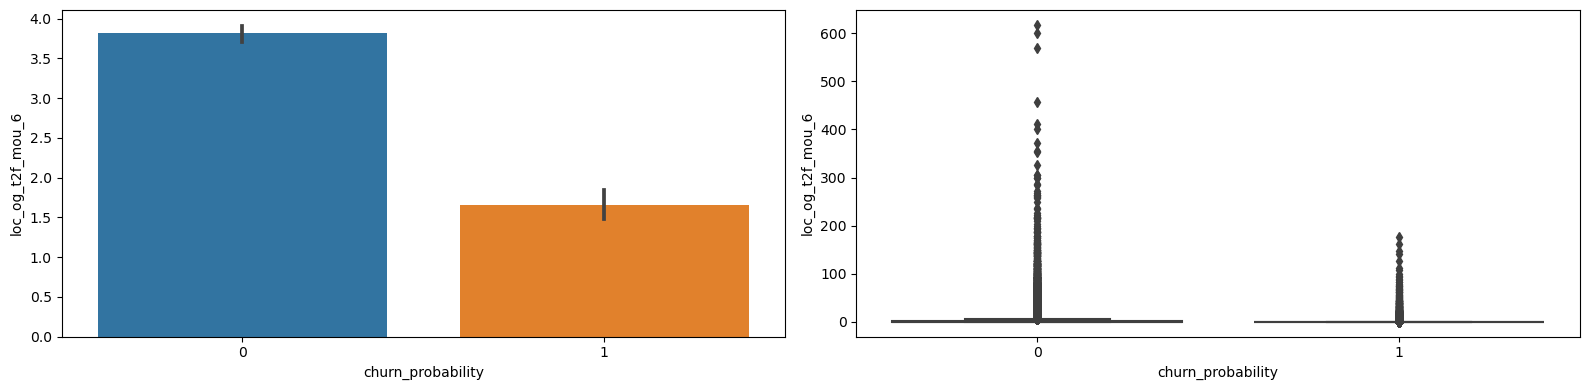

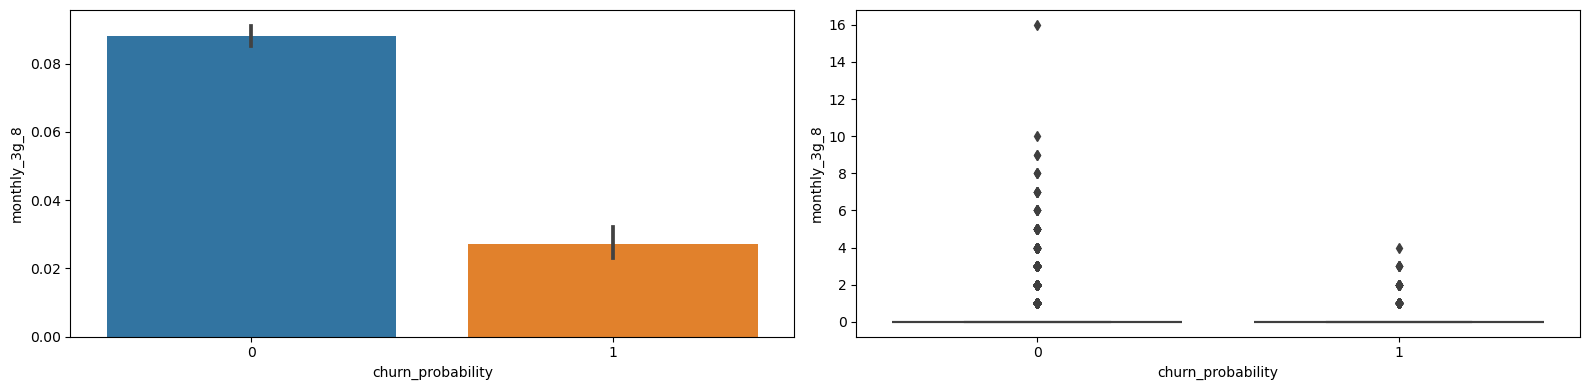

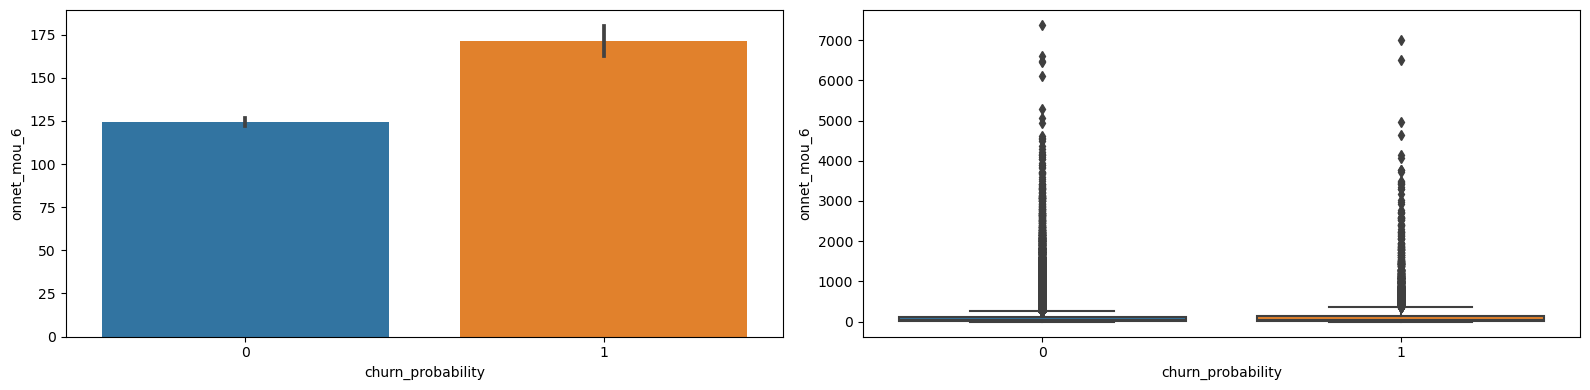

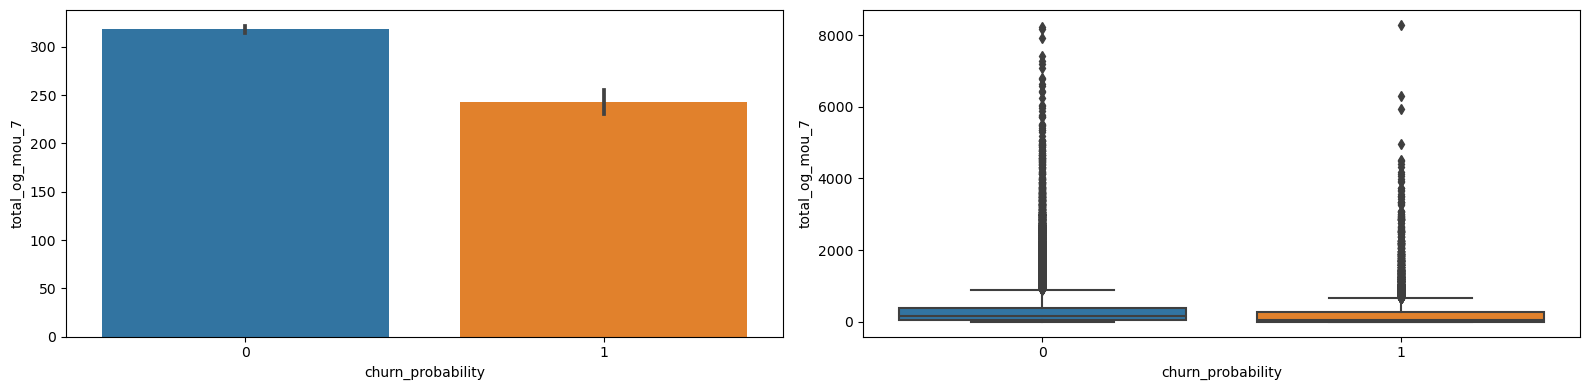

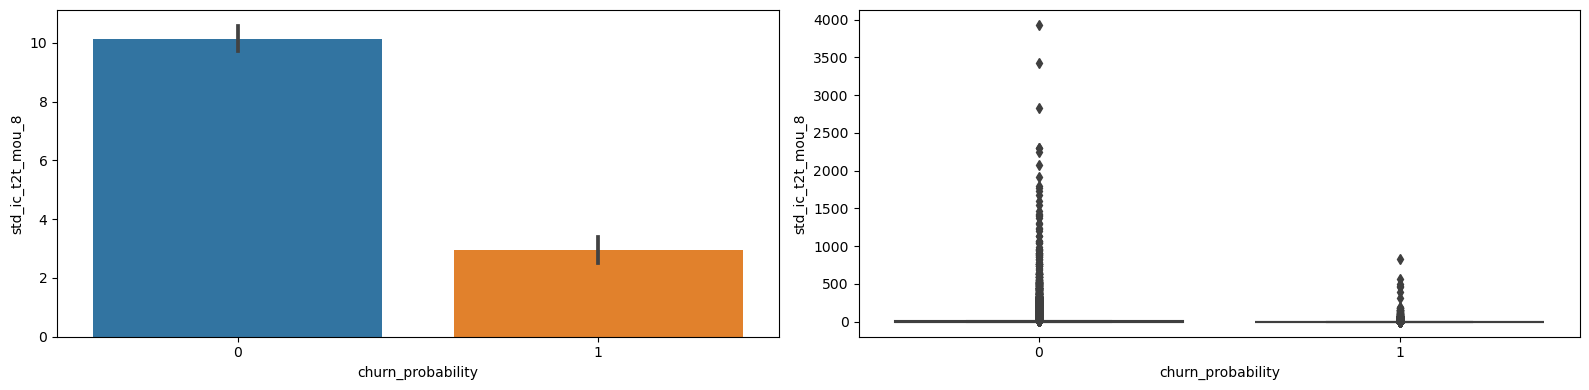

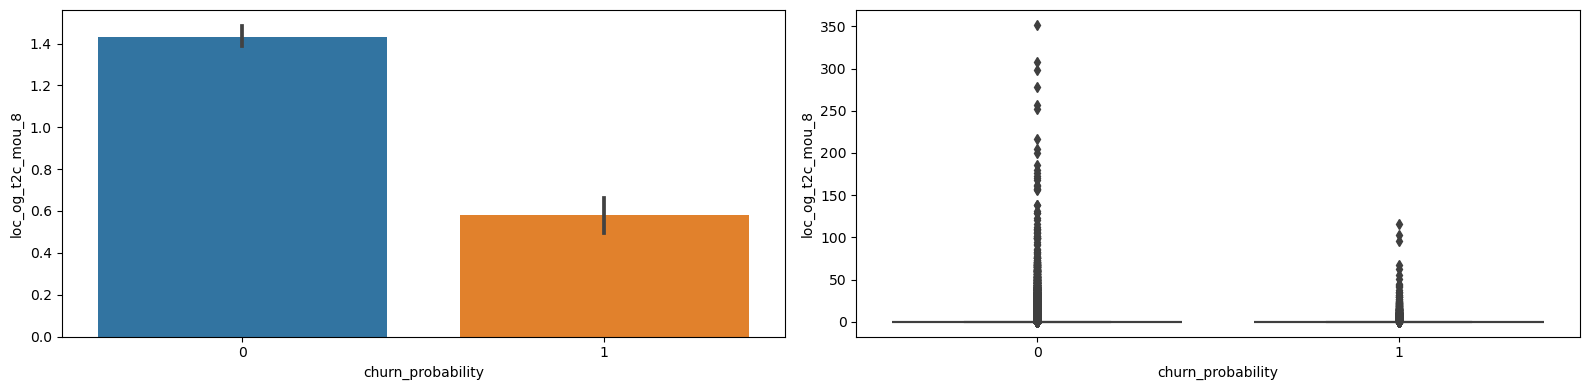

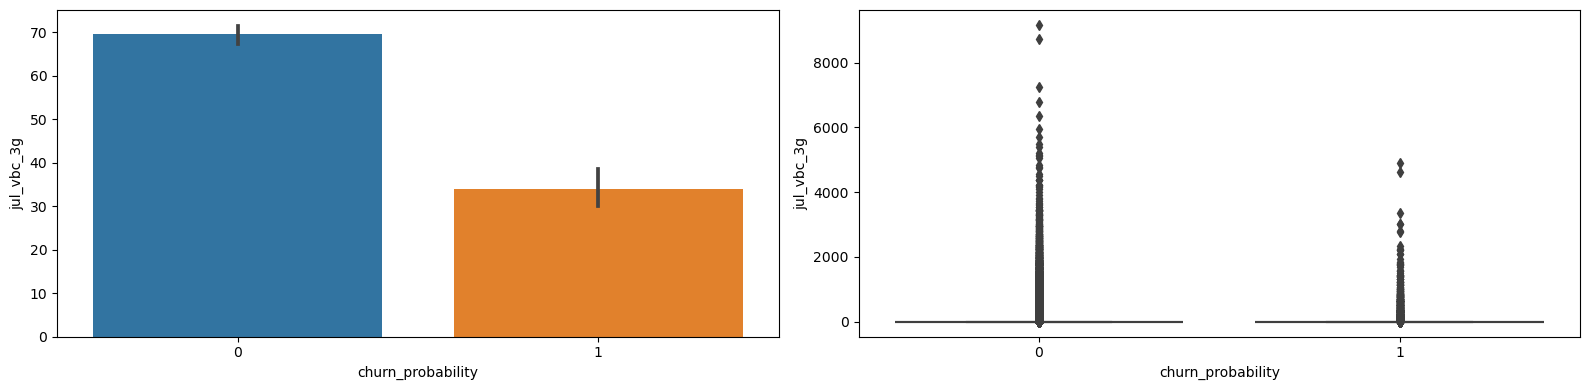

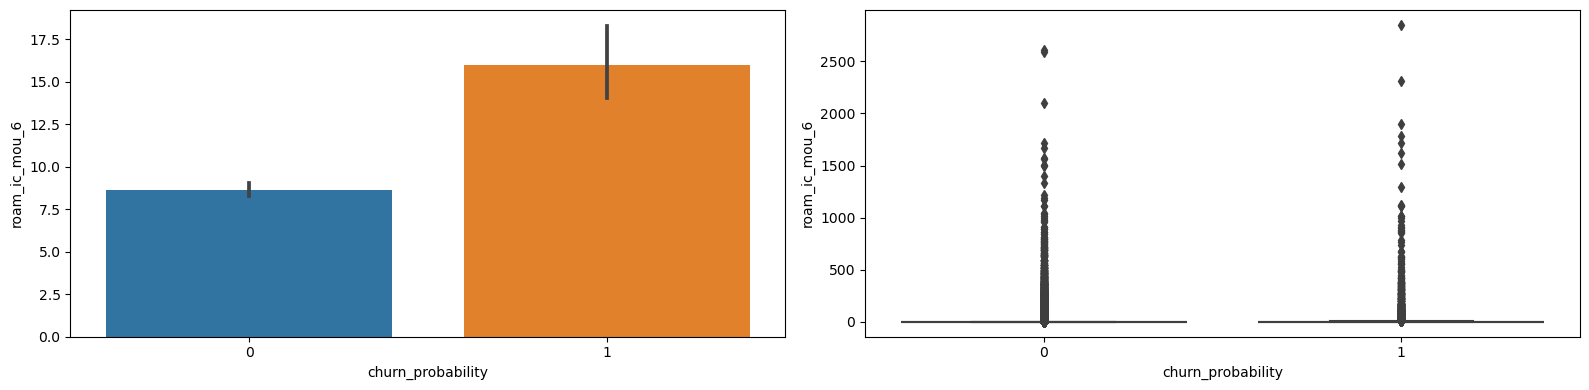

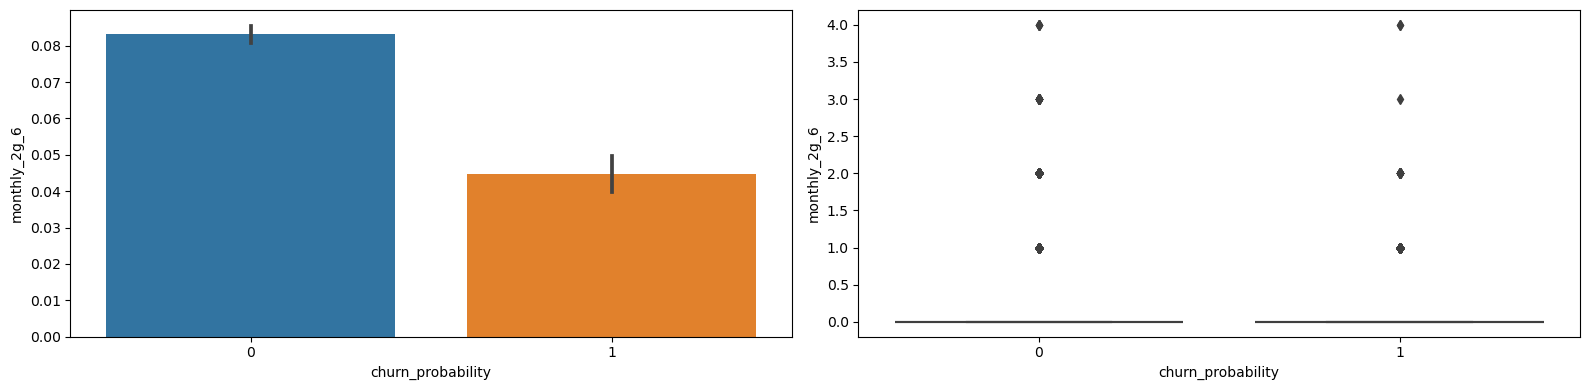

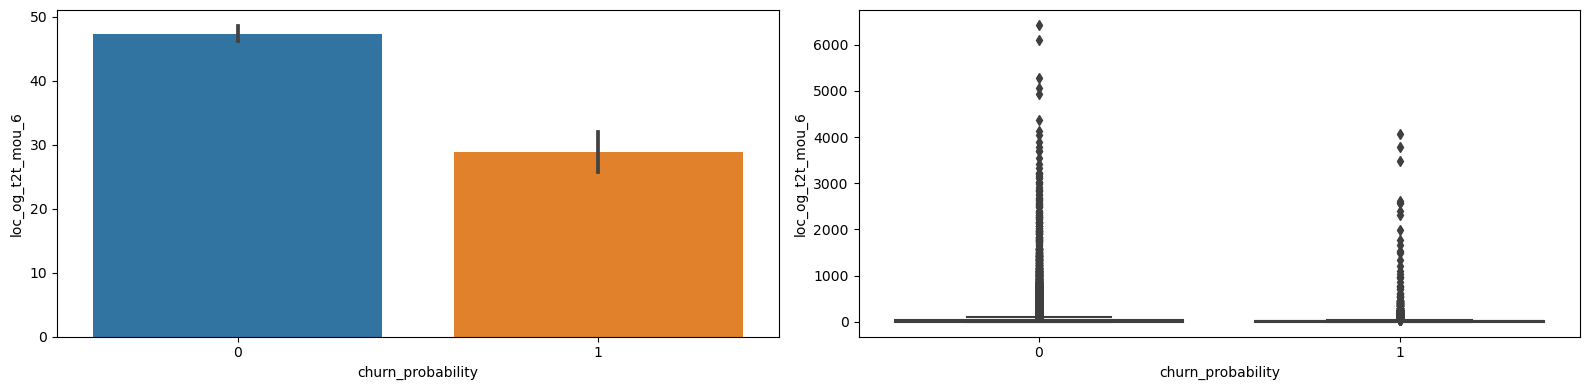

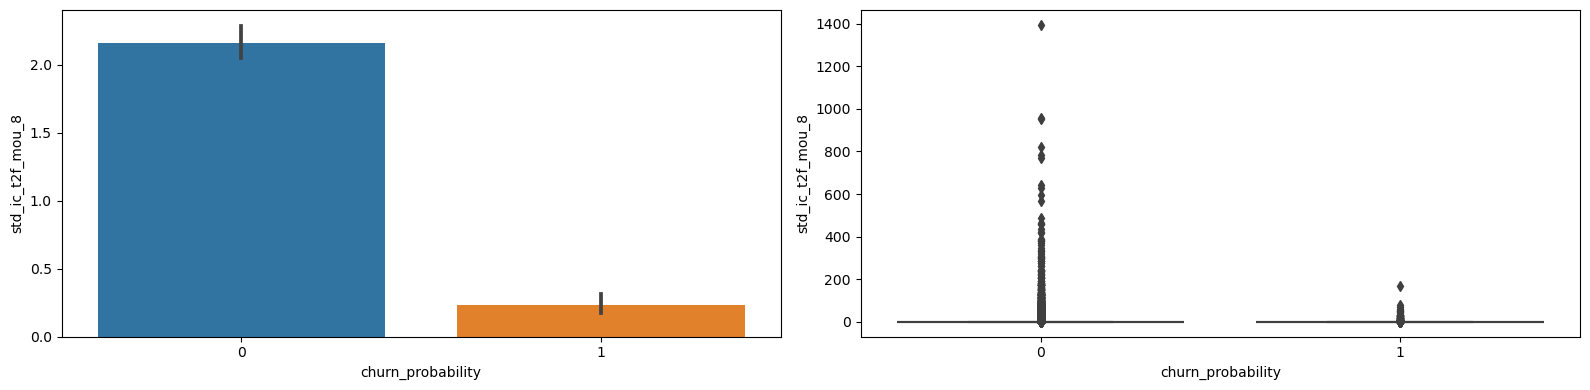

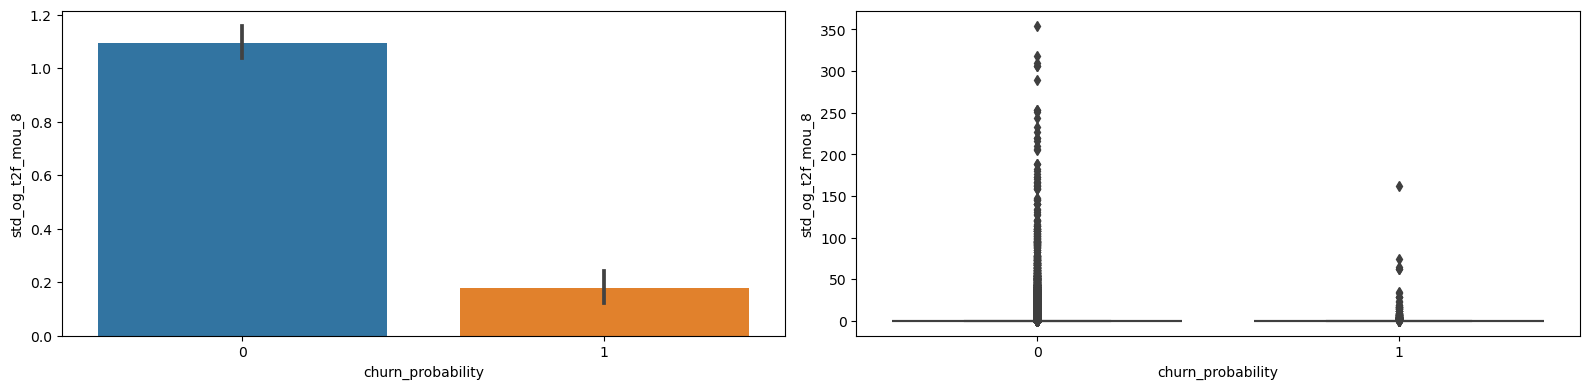

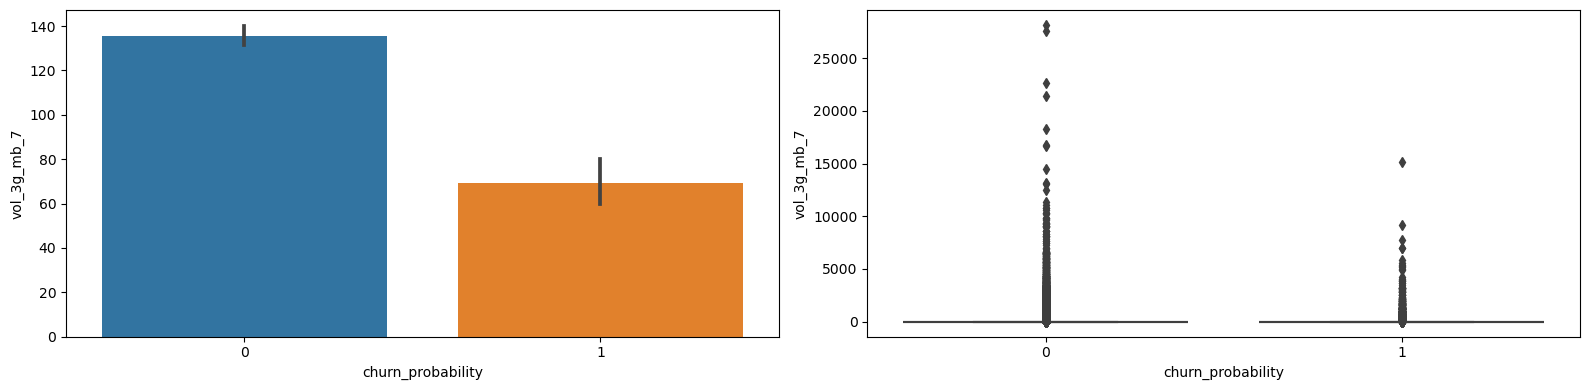

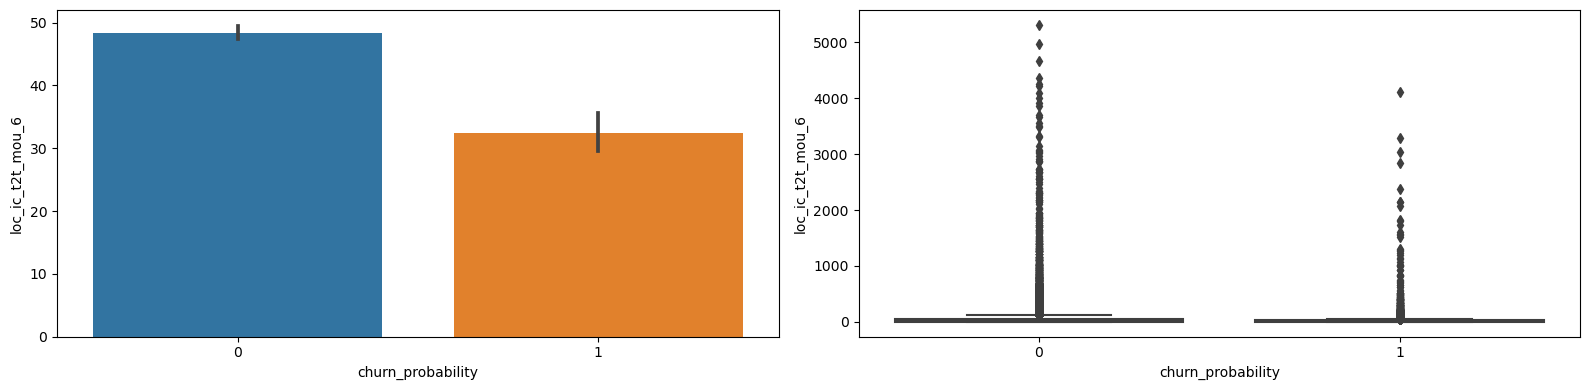

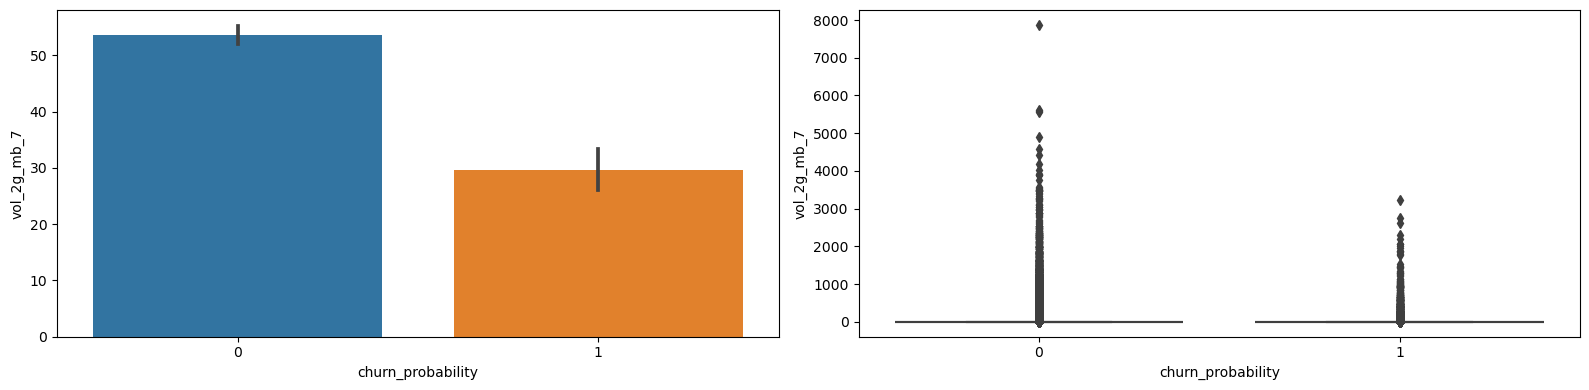

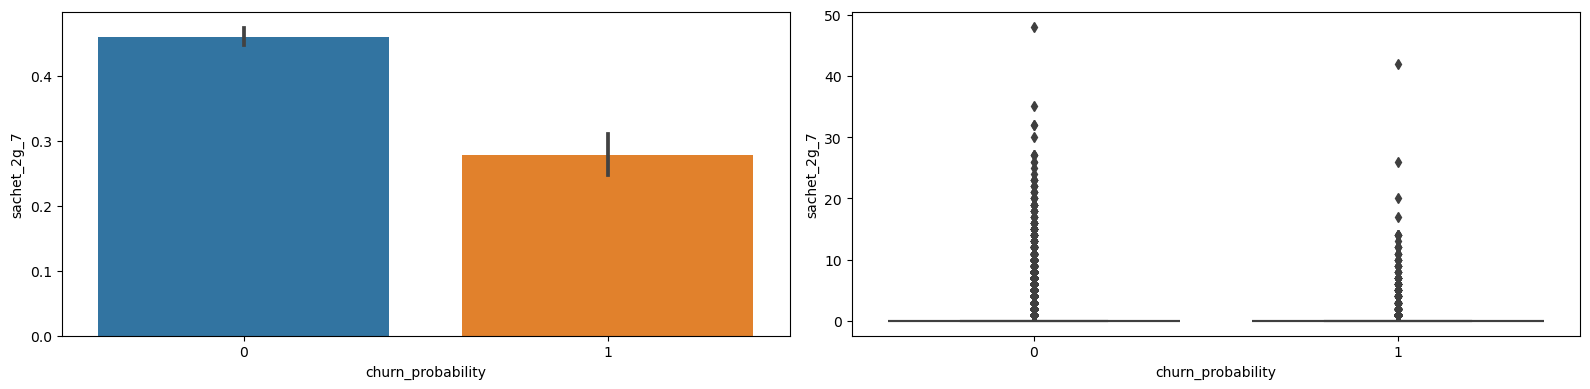

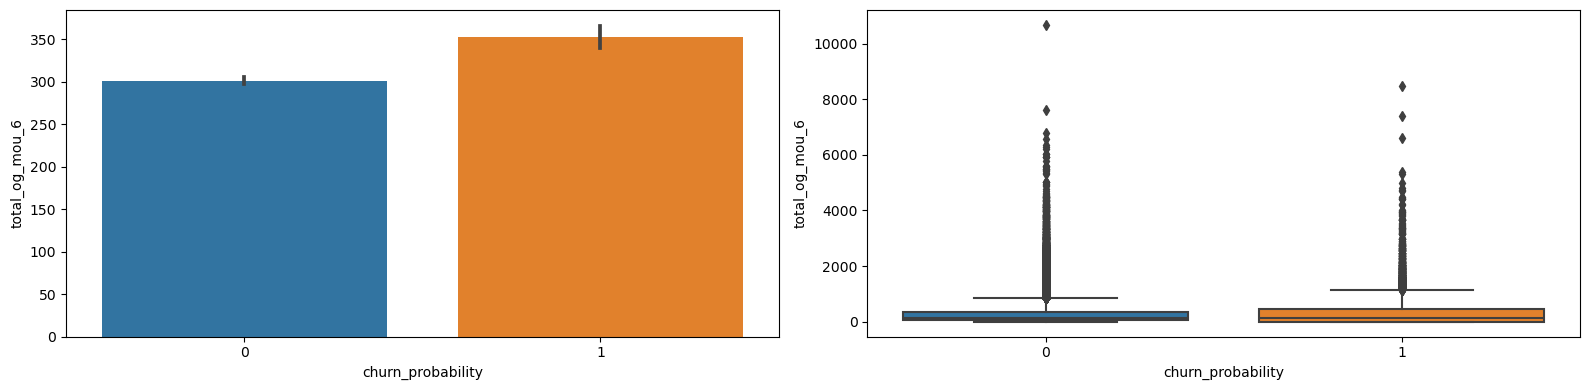

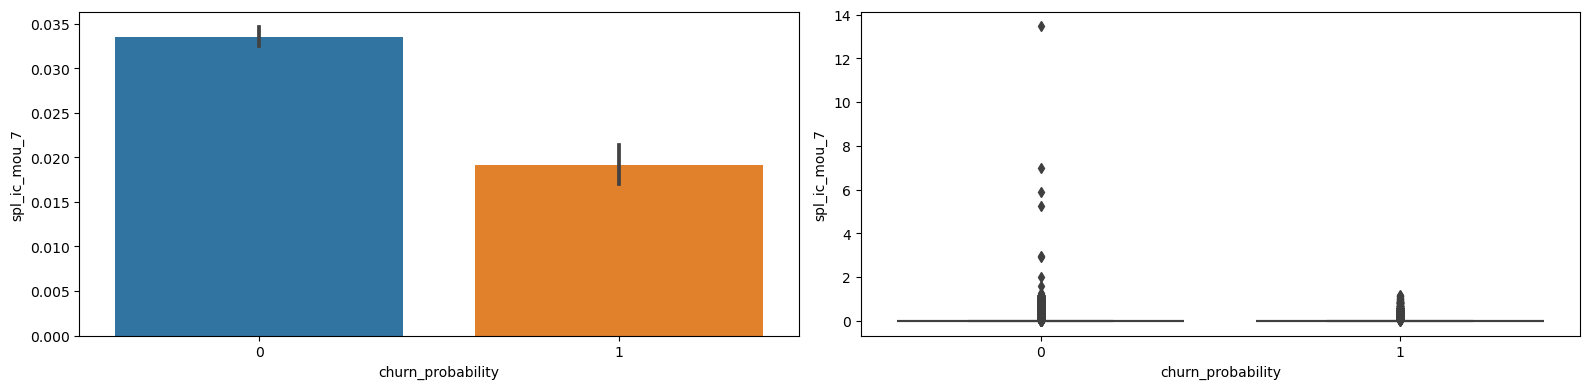

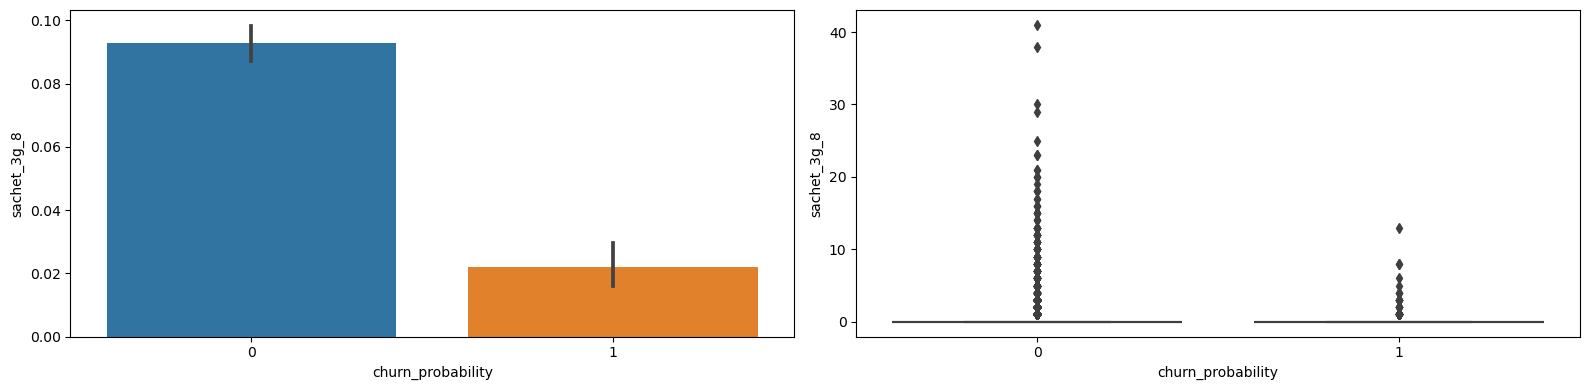

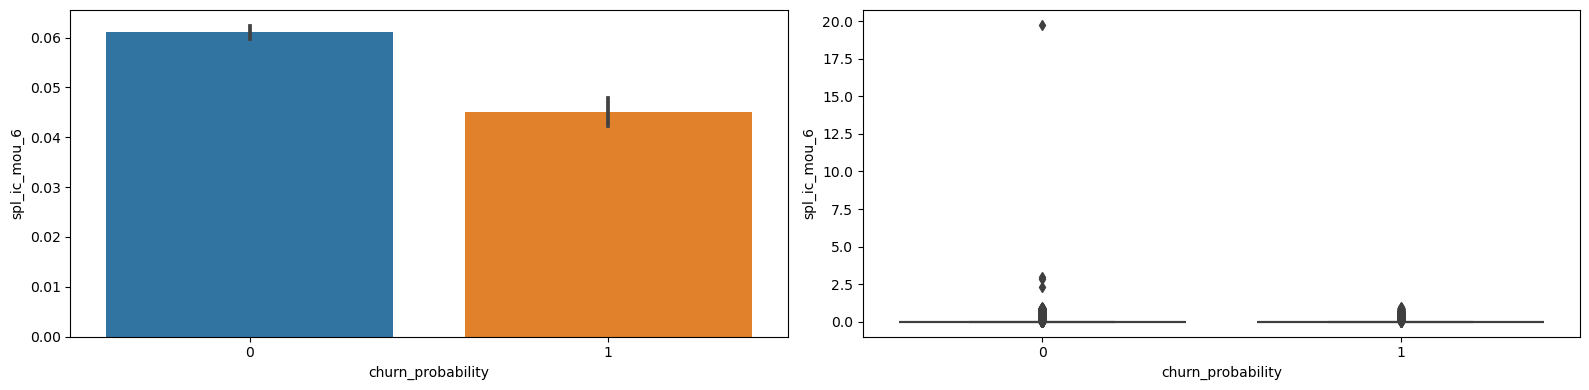

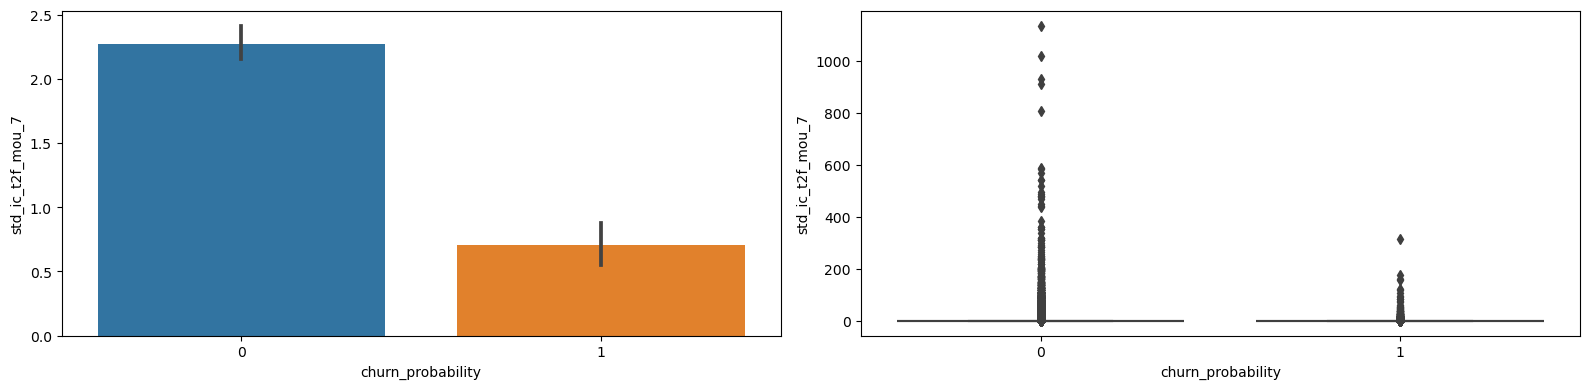

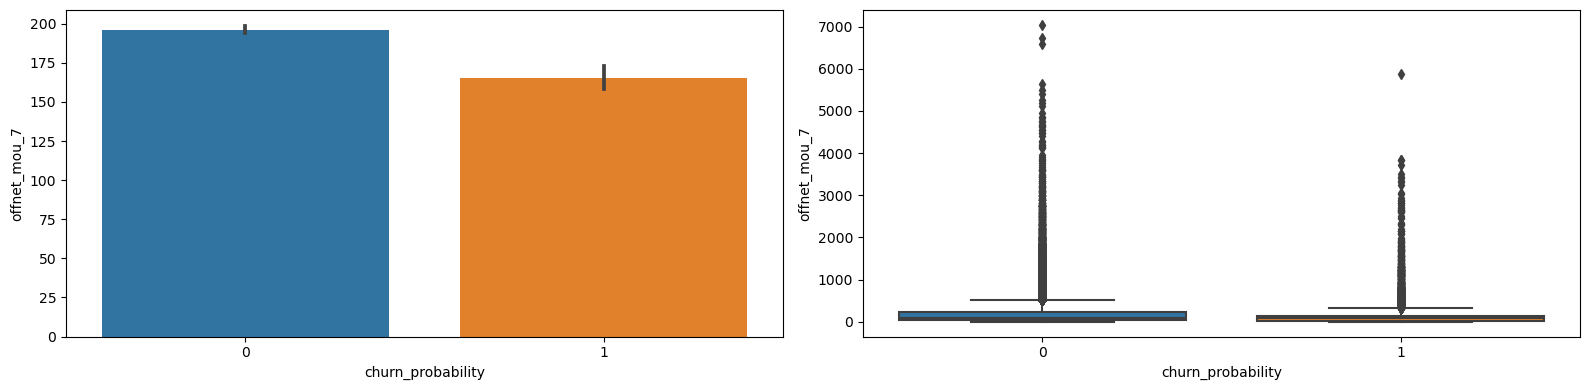

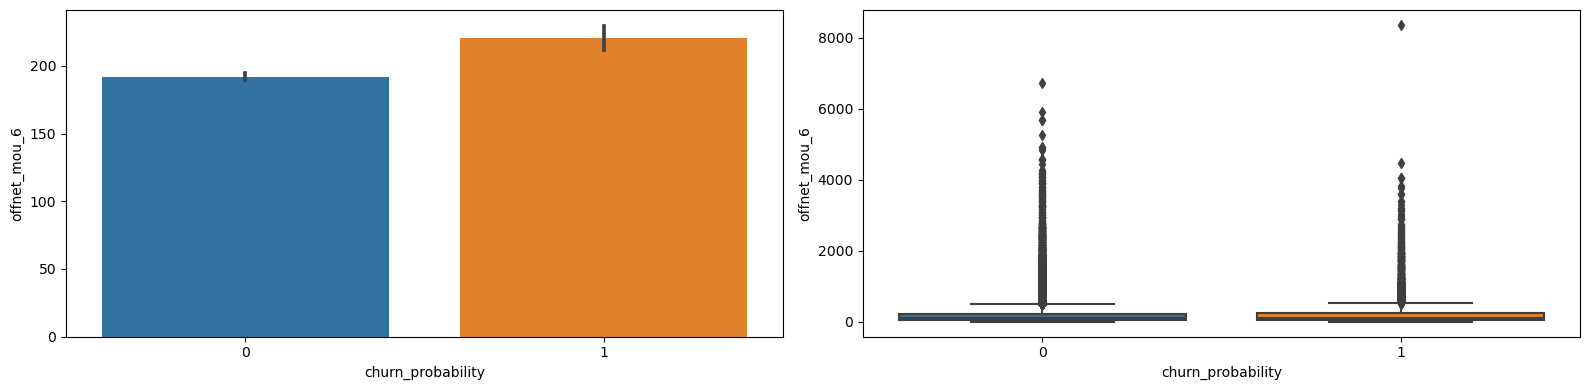

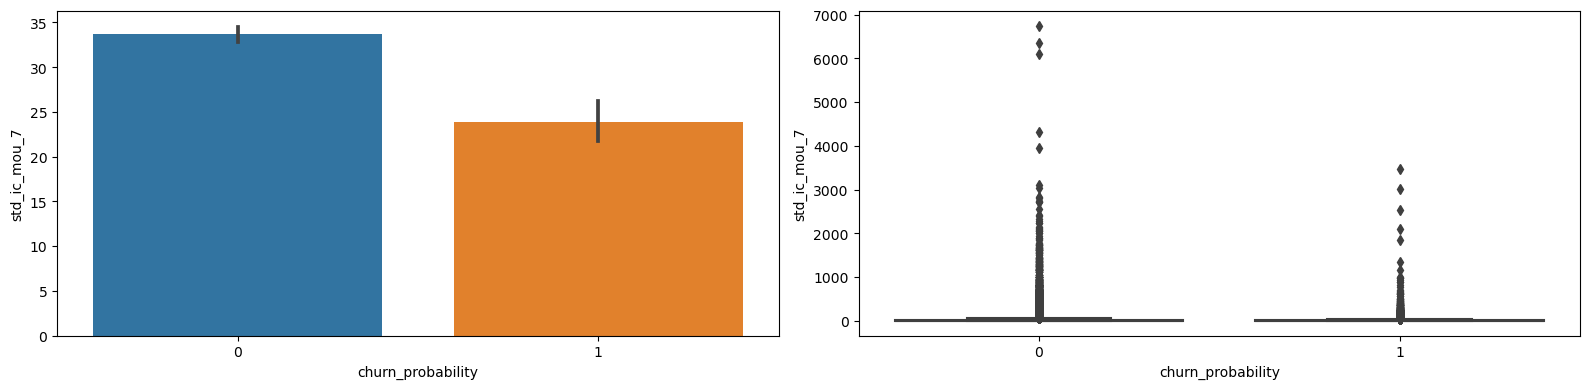

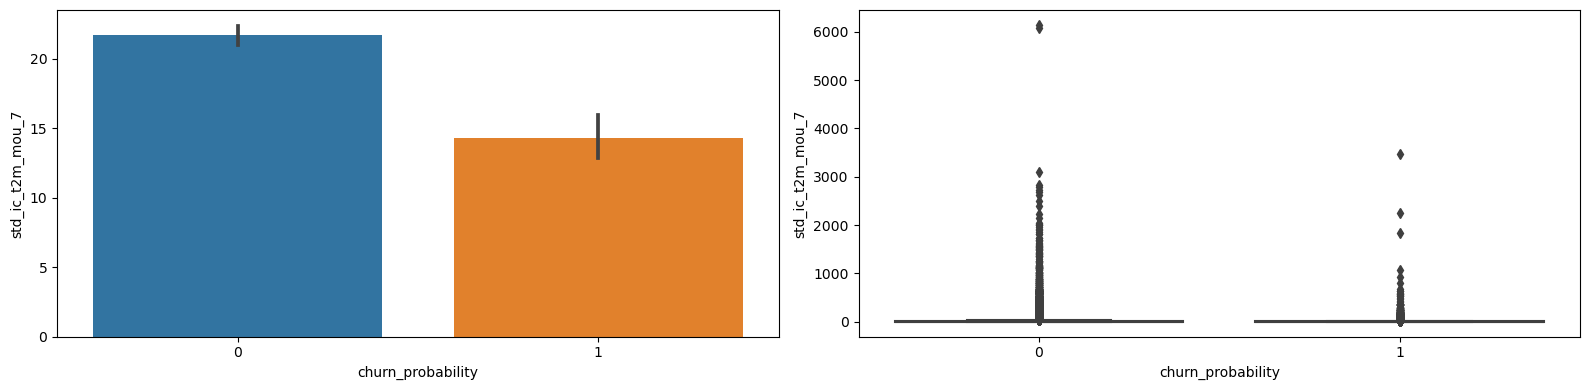

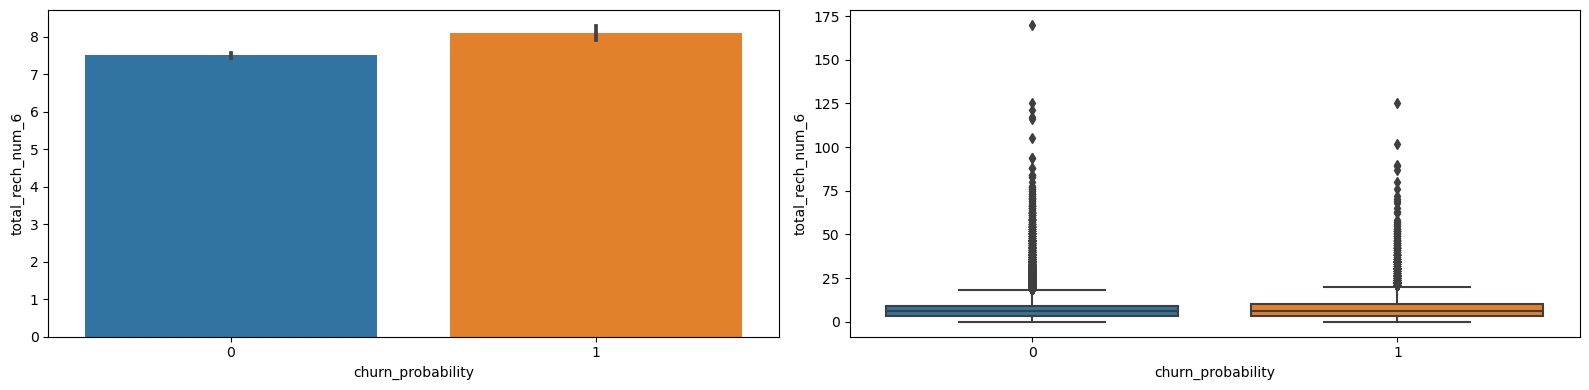

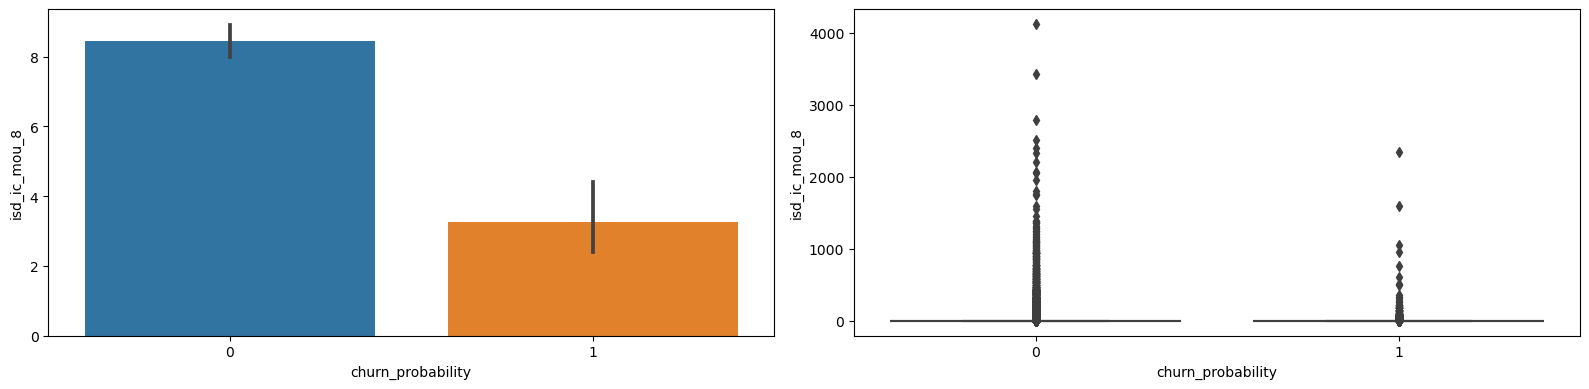

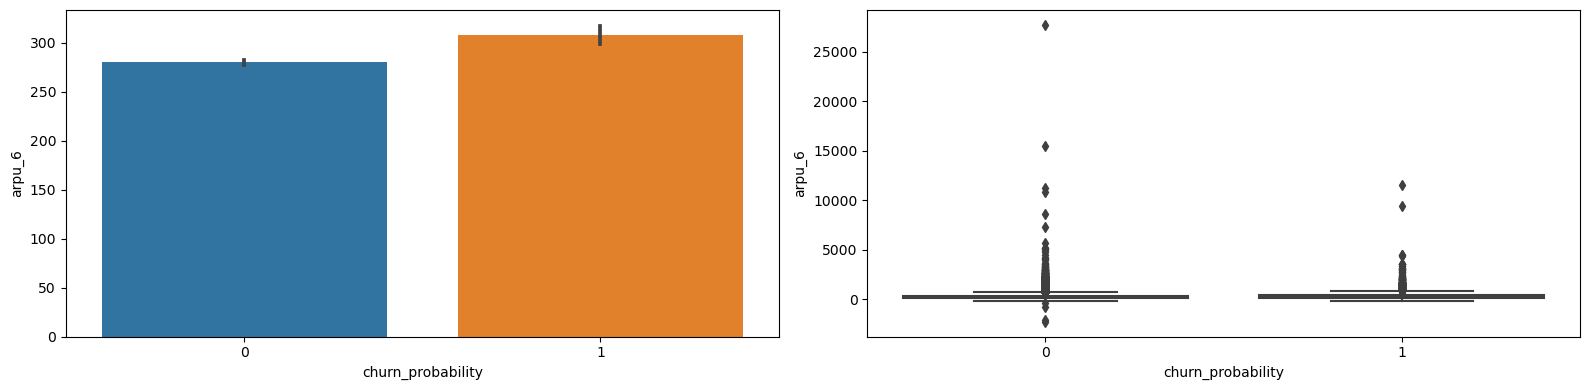

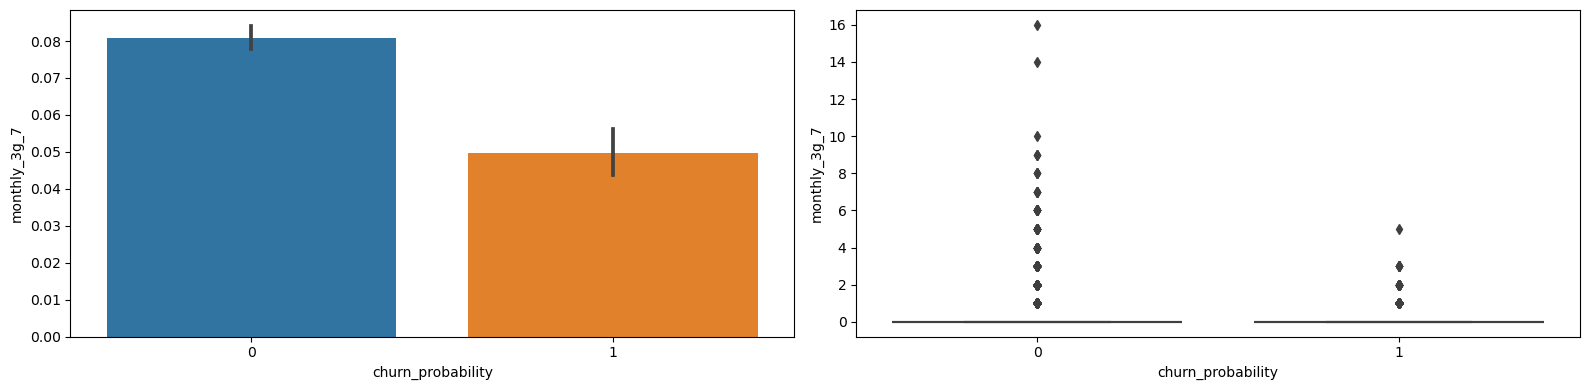

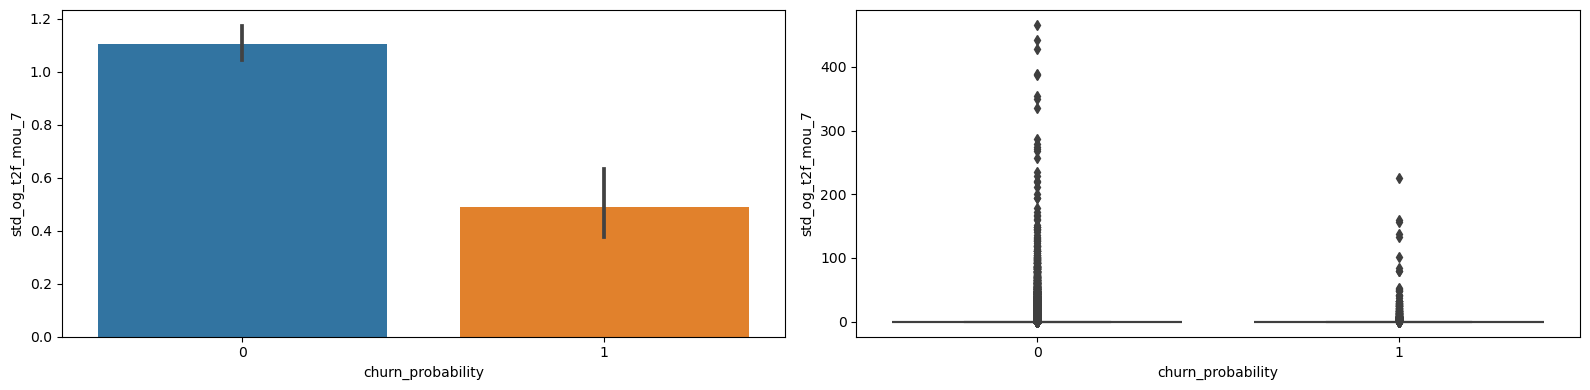

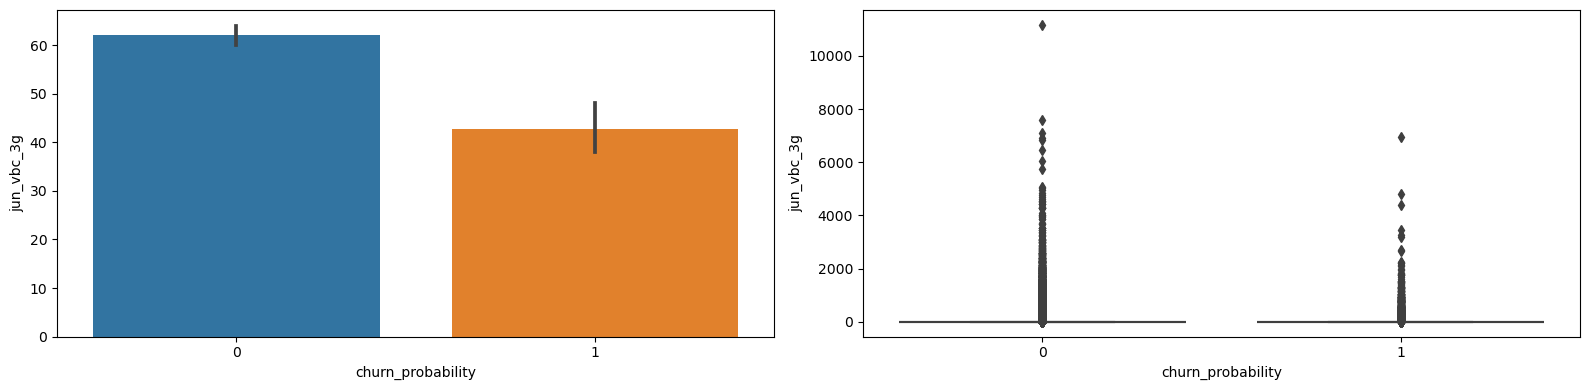

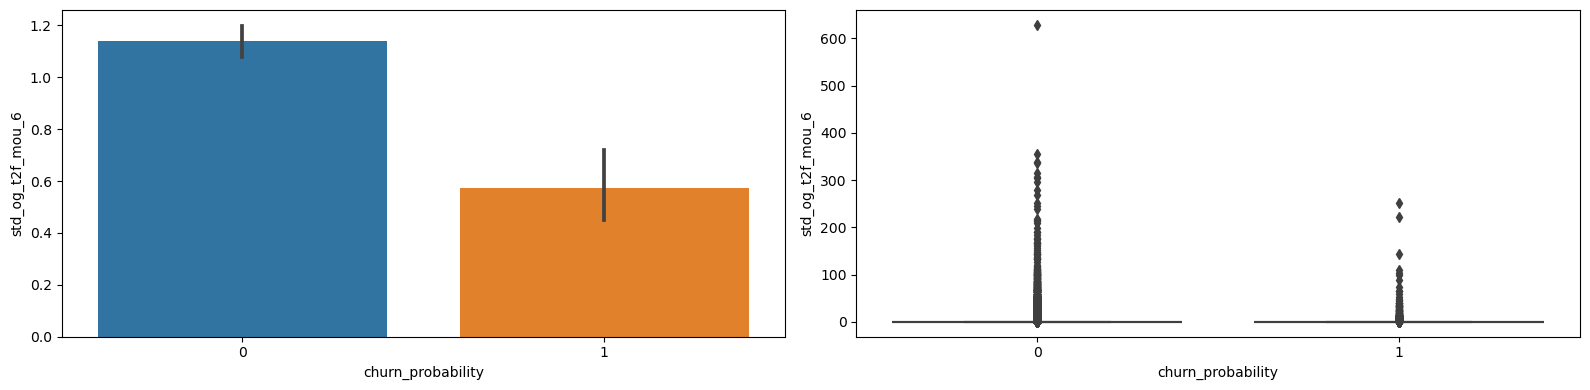

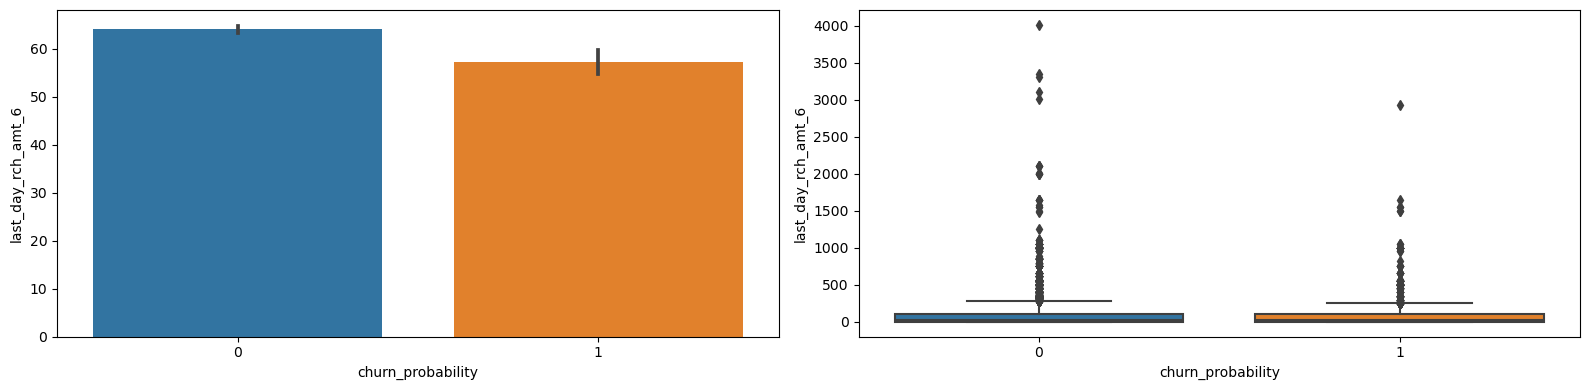

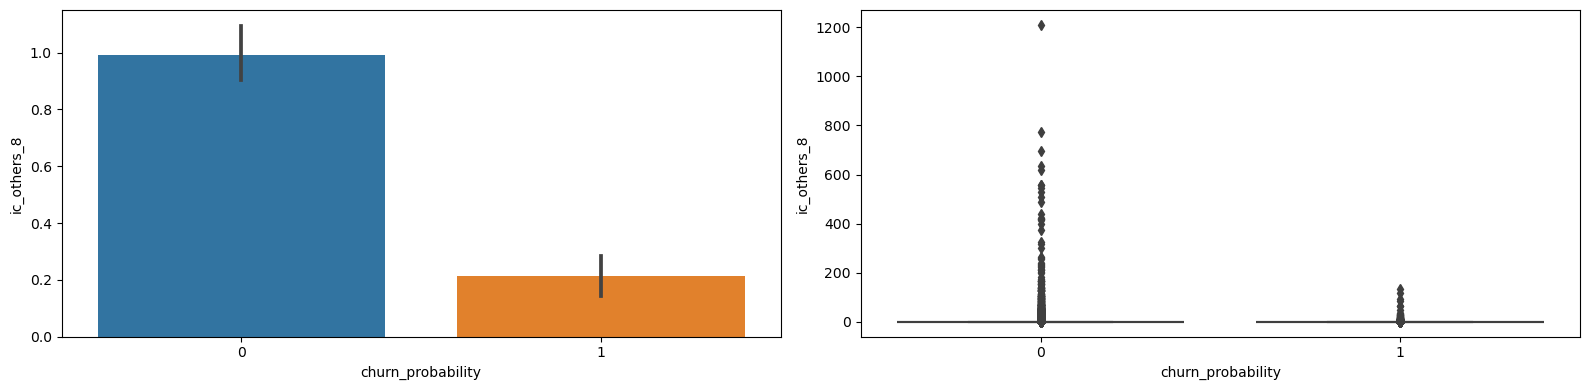

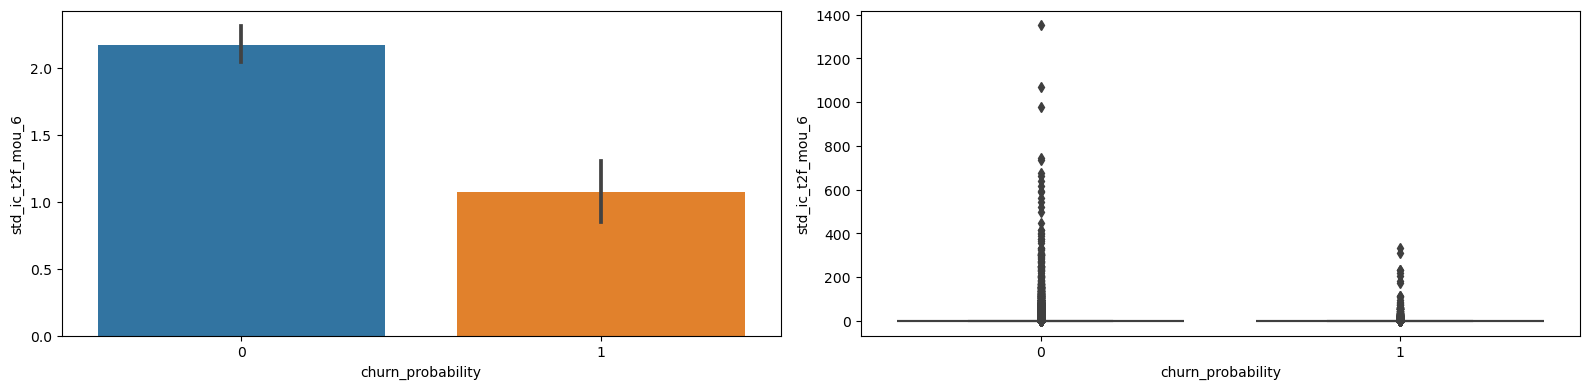

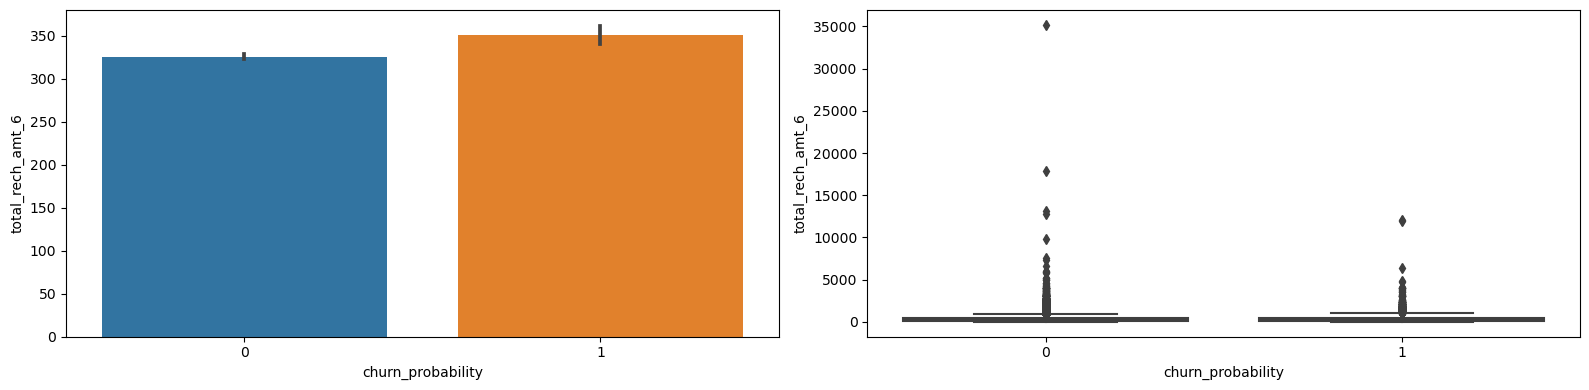

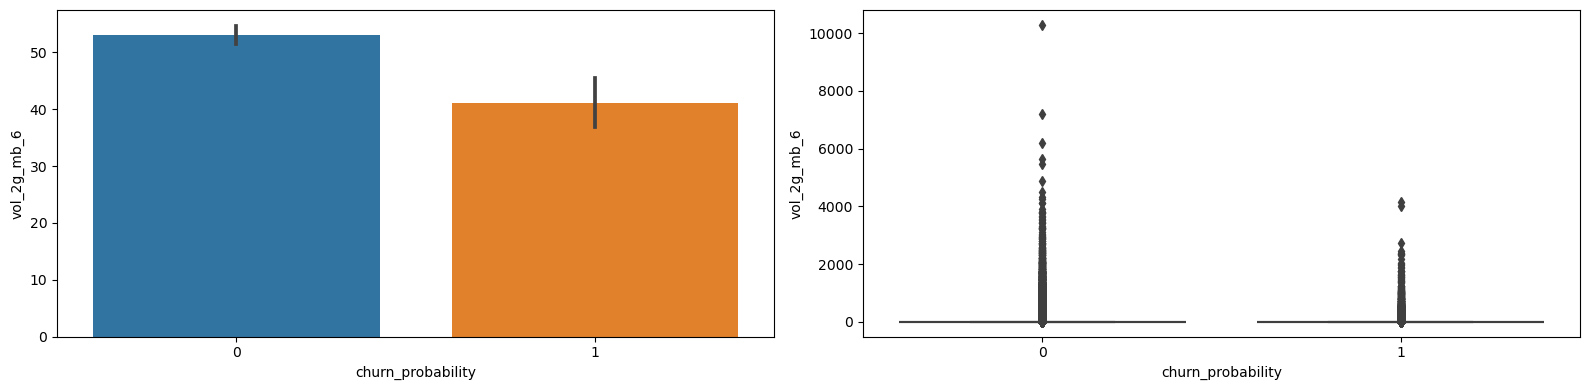

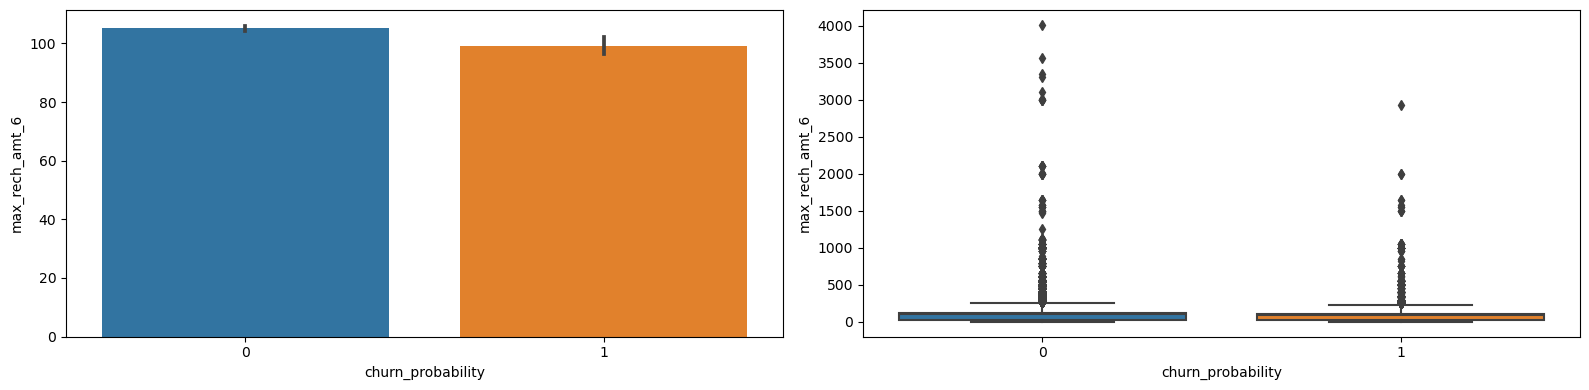

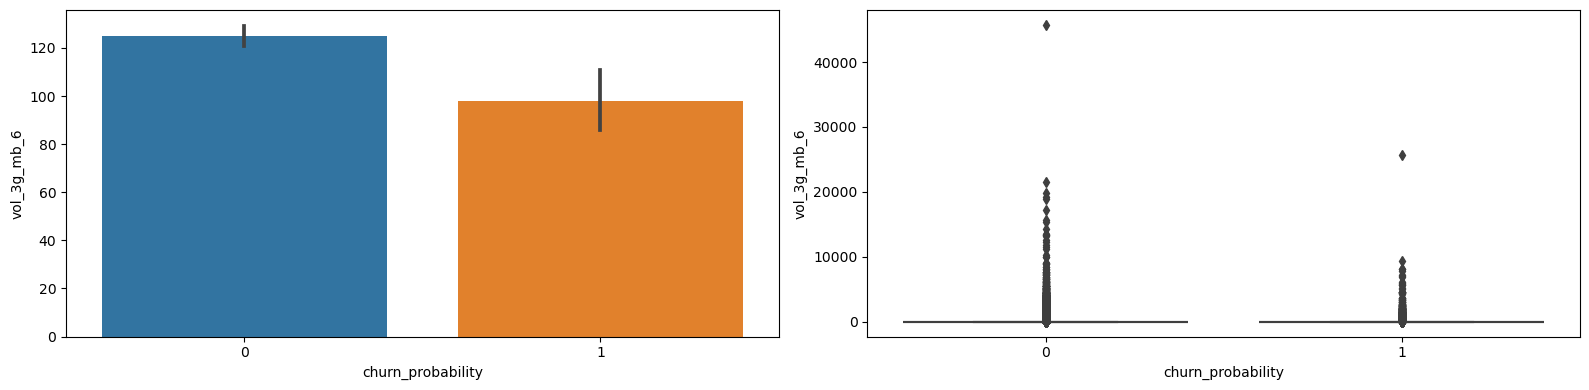

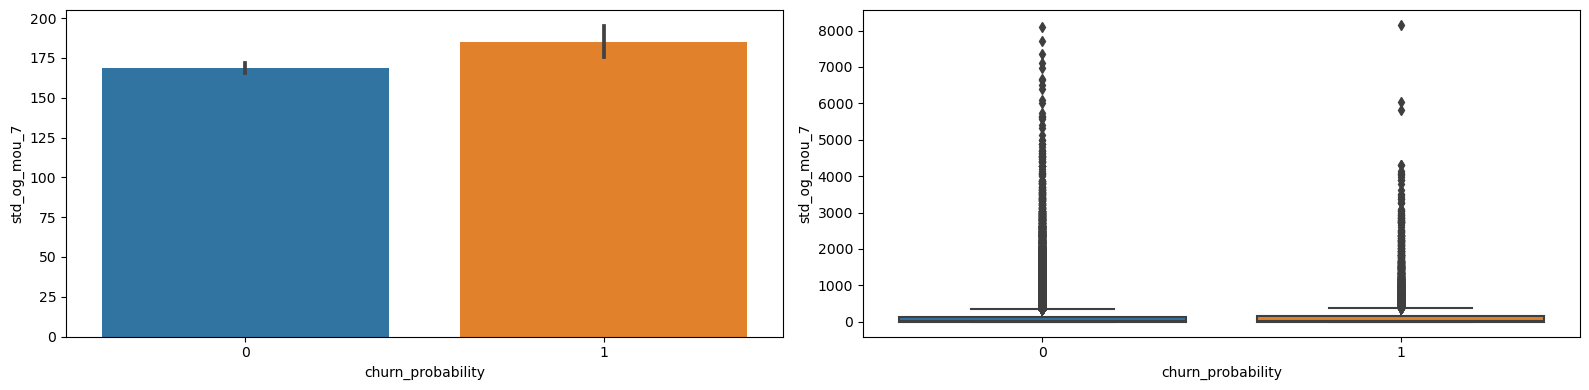

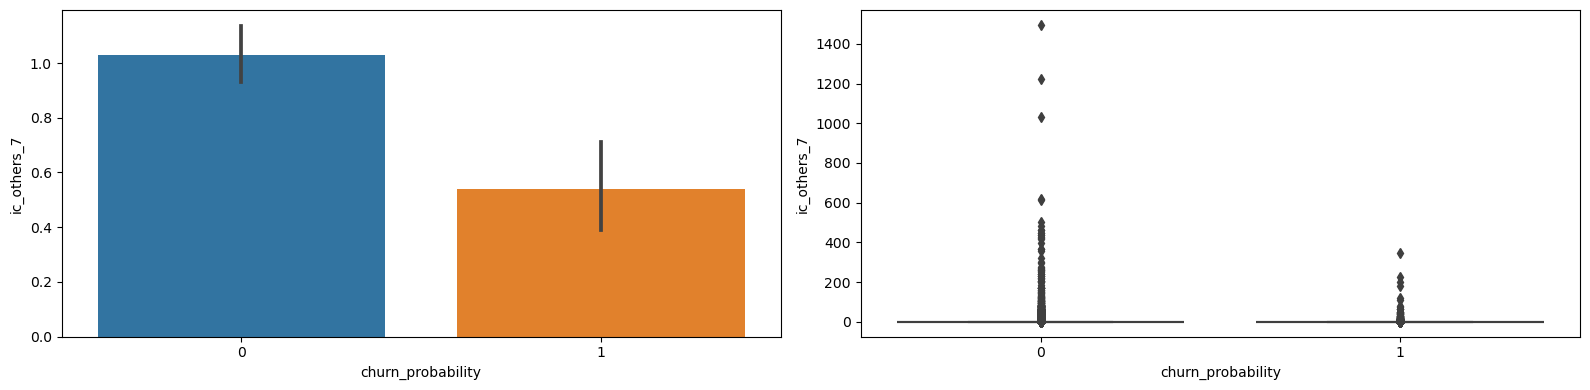

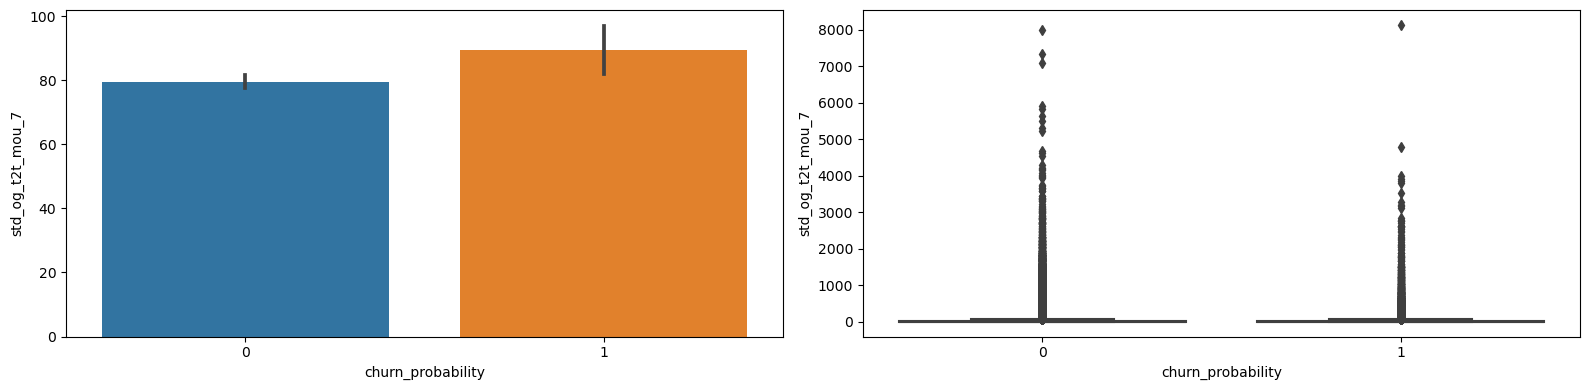

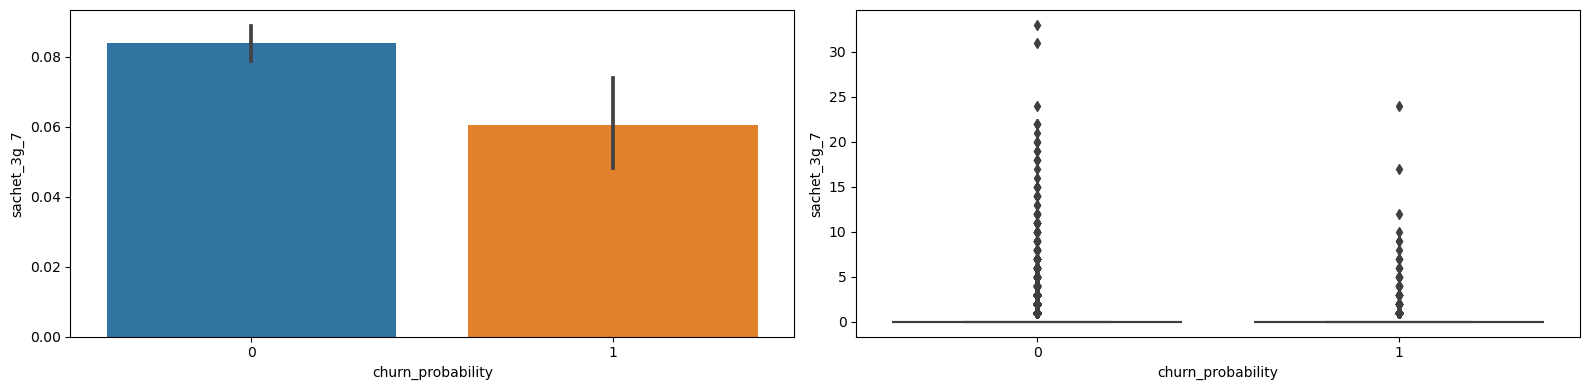

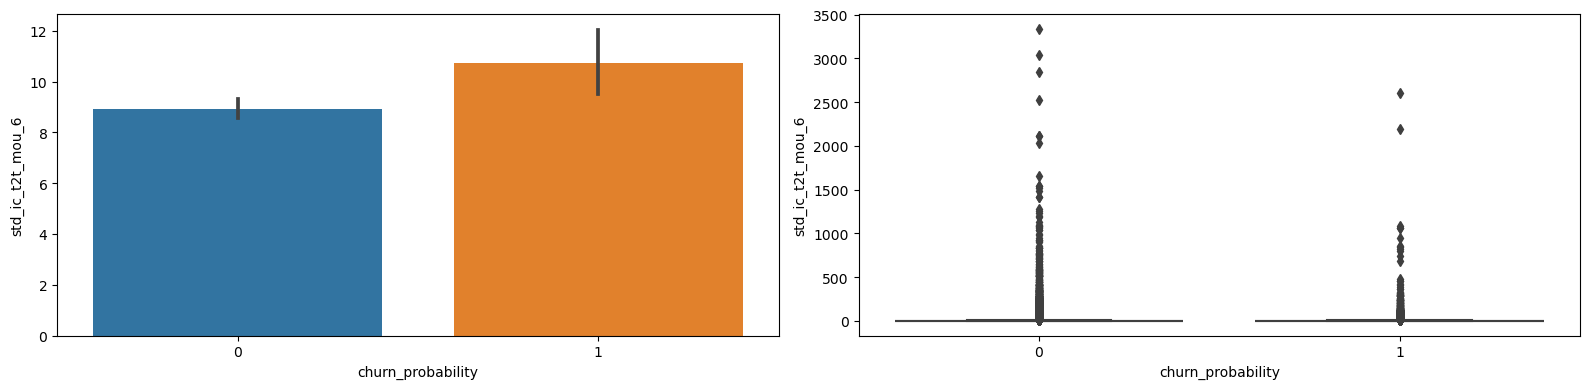

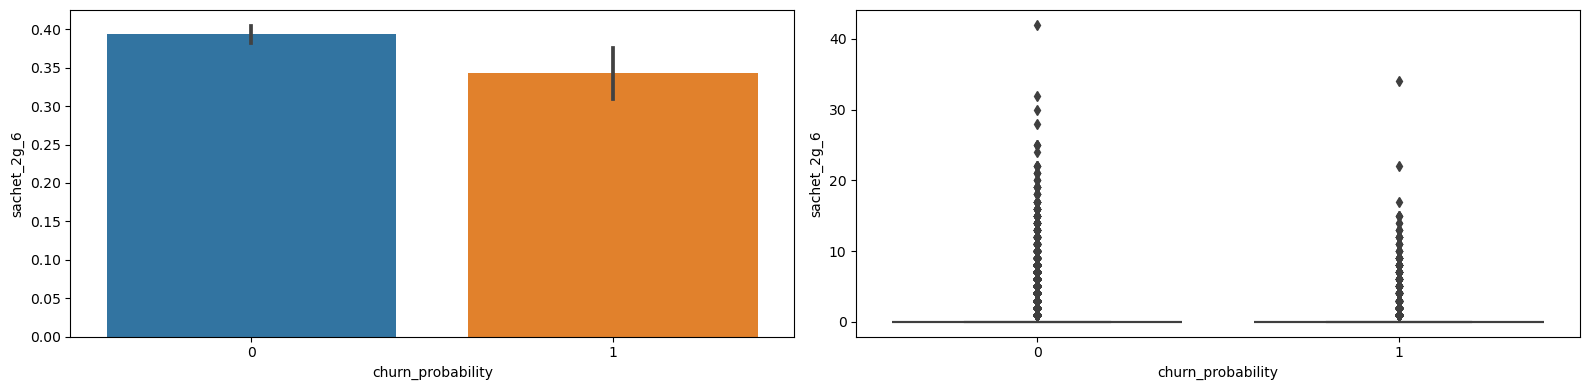

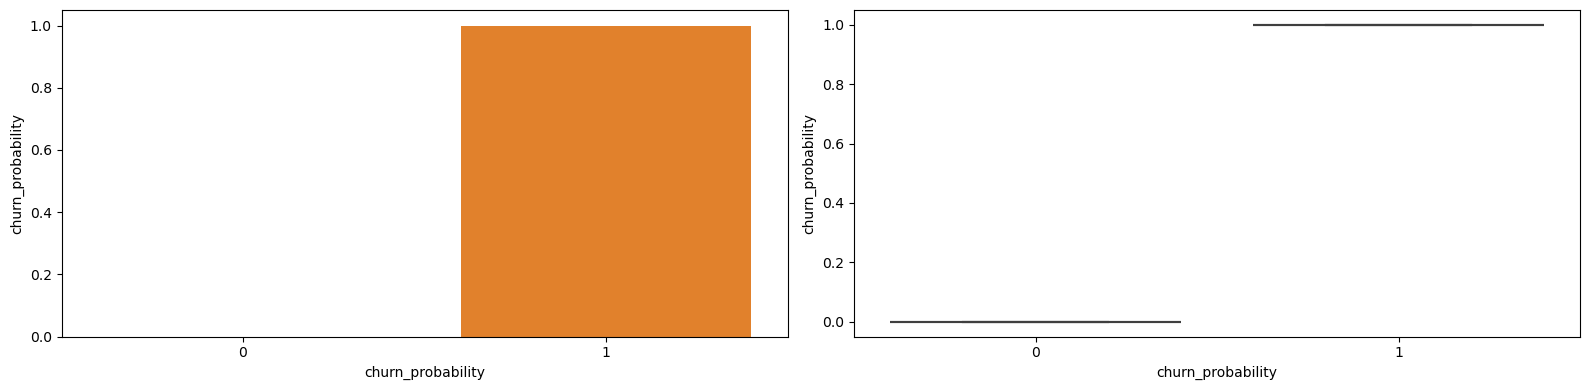

In [121]:
for col in churn_train2.columns:
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.barplot(x=churn_train2['churn_probability'], y=churn_train2[col], ax=p[0])
    sns.boxplot(x=churn_train2['churn_probability'], y=churn_train2[col], ax=p[1])
    plt.tight_layout()
    plt.show()

##### For few variables churn probability is quite high let's print them

In [123]:
# Group the data by 'churn_probability' and calculate mean for each group
grouped_means = churn_train2.groupby('churn_probability').mean()

# Separate the means for churn_probability 0 and 1
means_0 = grouped_means.loc[0]
means_1 = grouped_means.loc[1]

# Compare the means and print variables where churn_probability 1 mean is greater than churn_probability 0 mean
for col in churn_train2.columns:
    if col != 'churn_probability':  # Exclude target column itself
        if means_1[col] > means_0[col]:
            print(f"{col}: Mean for churn_probability 1 ({means_1[col]:.2f}) is greater than for churn_probability 0 ({means_0[col]:.2f})")

std_og_mou_6: Mean for churn_probability 1 (265.19) is greater than for churn_probability 0 (152.13)
std_og_t2t_mou_6: Mean for churn_probability 1 (129.06) is greater than for churn_probability 0 (71.57)
roam_og_mou_7: Mean for churn_probability 1 (21.07) is greater than for churn_probability 0 (8.15)
std_og_t2m_mou_6: Mean for churn_probability 1 (134.55) is greater than for churn_probability 0 (79.18)
roam_og_mou_8: Mean for churn_probability 1 (20.17) is greater than for churn_probability 0 (8.02)
roam_ic_mou_7: Mean for churn_probability 1 (15.52) is greater than for churn_probability 0 (5.75)
roam_og_mou_6: Mean for churn_probability 1 (24.59) is greater than for churn_probability 0 (12.38)
roam_ic_mou_8: Mean for churn_probability 1 (14.48) is greater than for churn_probability 0 (5.74)
onnet_mou_6: Mean for churn_probability 1 (171.15) is greater than for churn_probability 0 (124.48)
roam_ic_mou_6: Mean for churn_probability 1 (16.01) is greater than for churn_probability 0 (8.

#### Features which are directly responsible for churn:
#### std_og_mou_6, std_og_t2t_mou_6, roam_og_mou_7, std_og_t2m_mou_6, roam_og_mou_8, roam_ic_mou_7, roam_og_mou_6, roam_ic_mou_8, onnet_mou_6, roam_ic_mou_6, total_og_mou_6, offnet_mou_6, total_rech_num_6, std_og_mou_7, std_og_t2t_mou_7, std_ic_t2t_mou_6  

In [185]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [186]:
churn_train3 = churn_train2.apply(cap_outliers, axis=0)

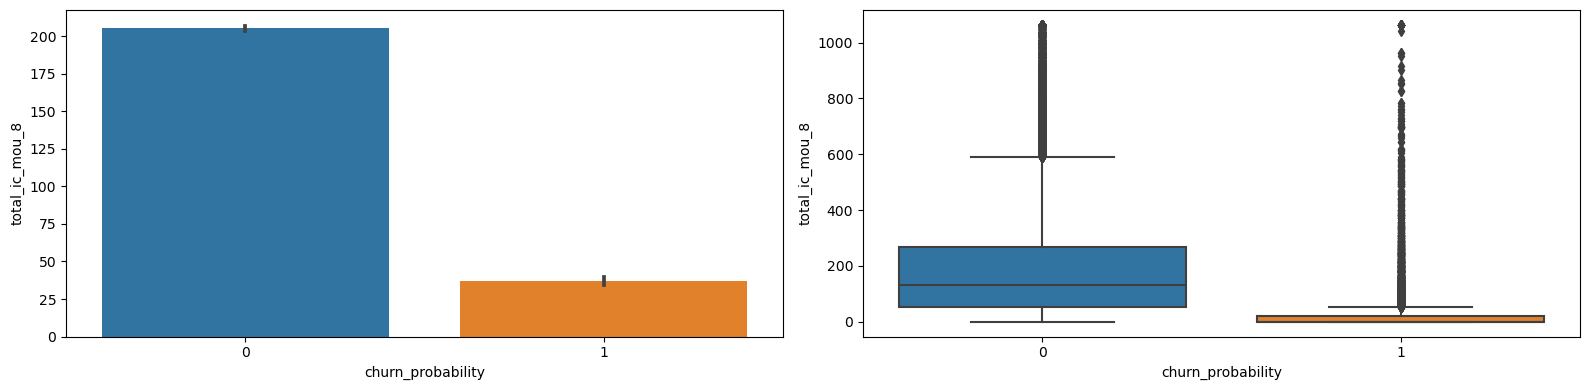

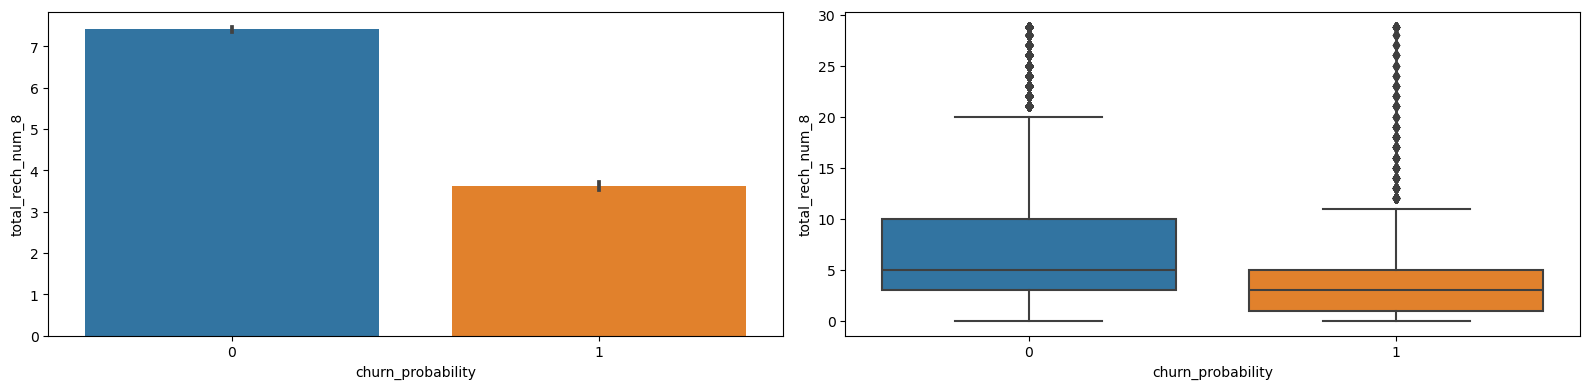

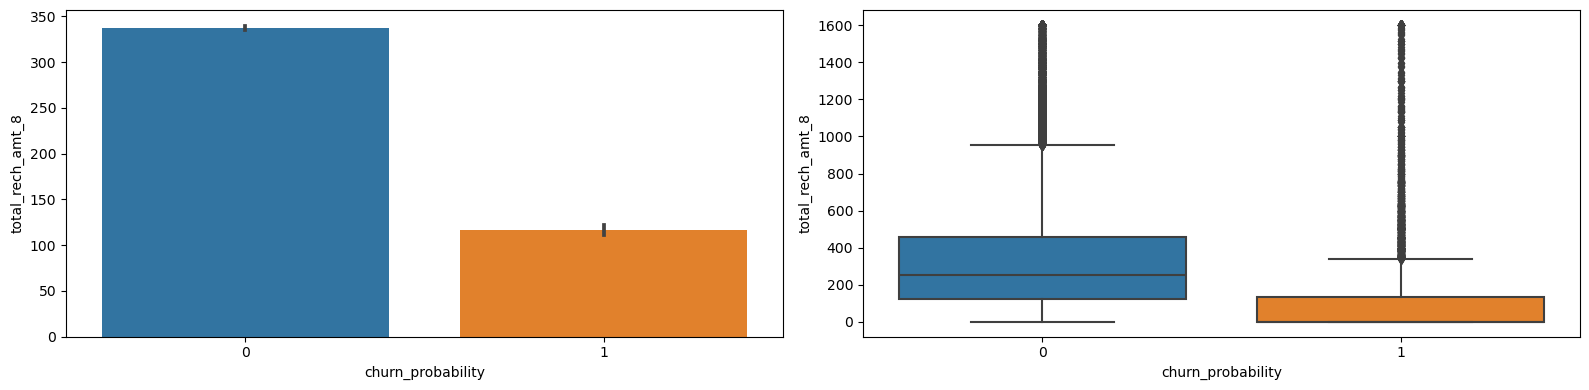

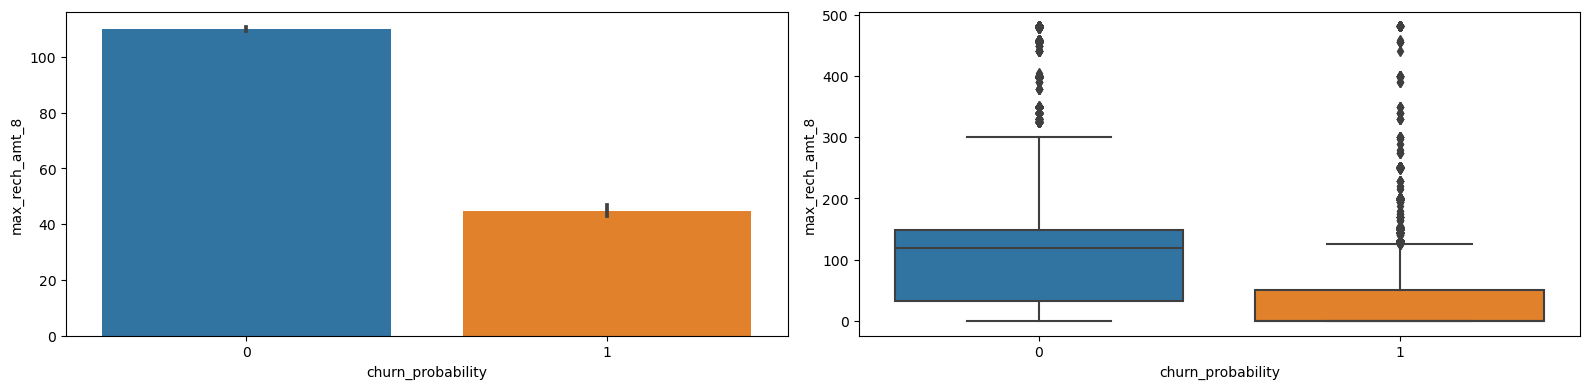

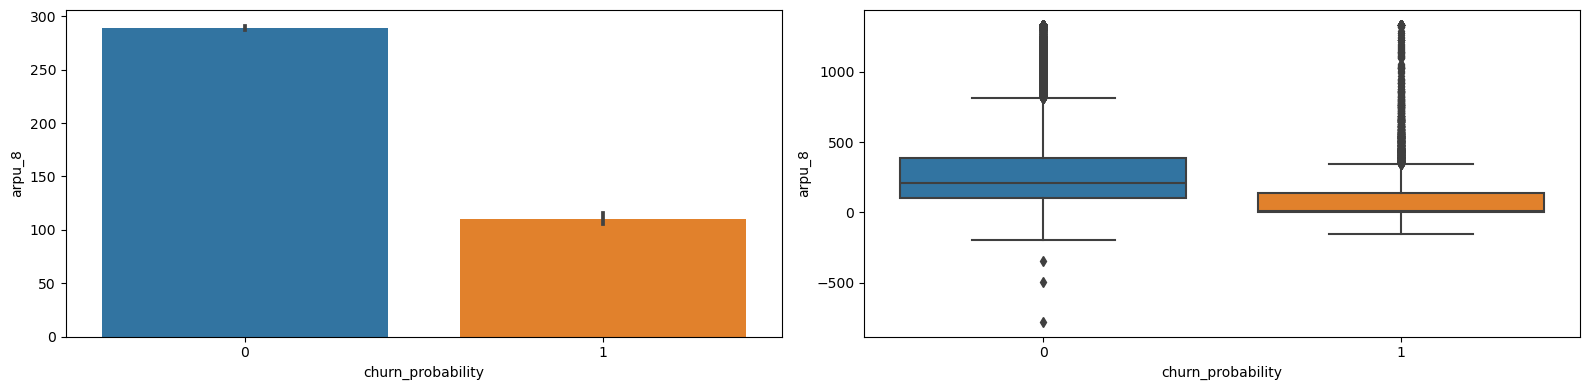

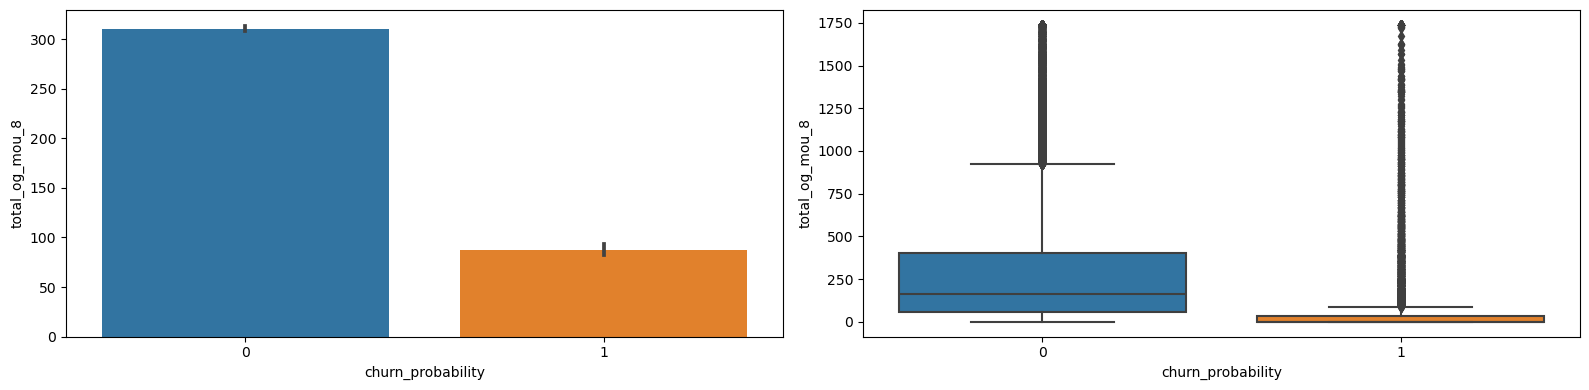

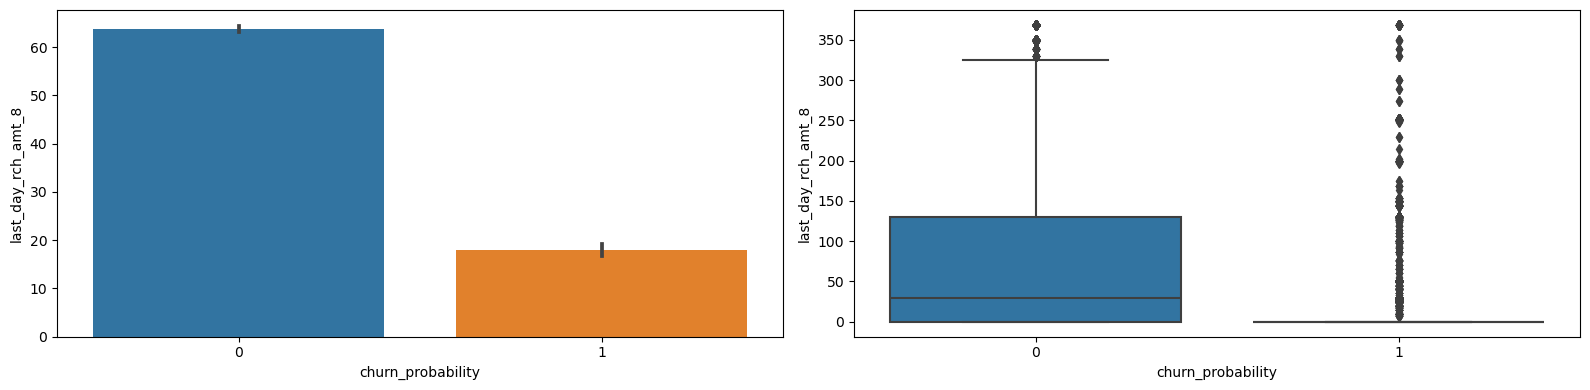

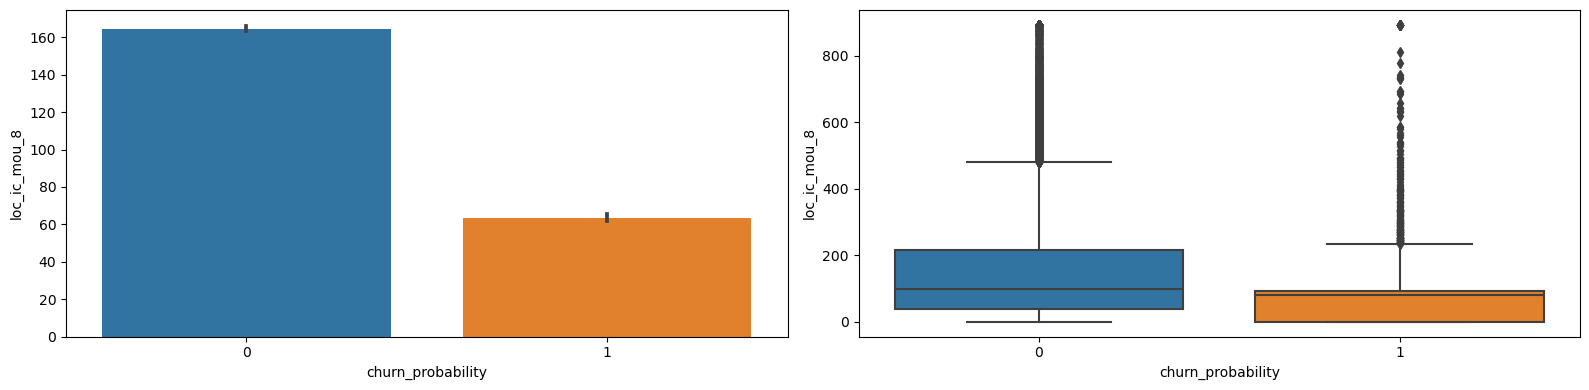

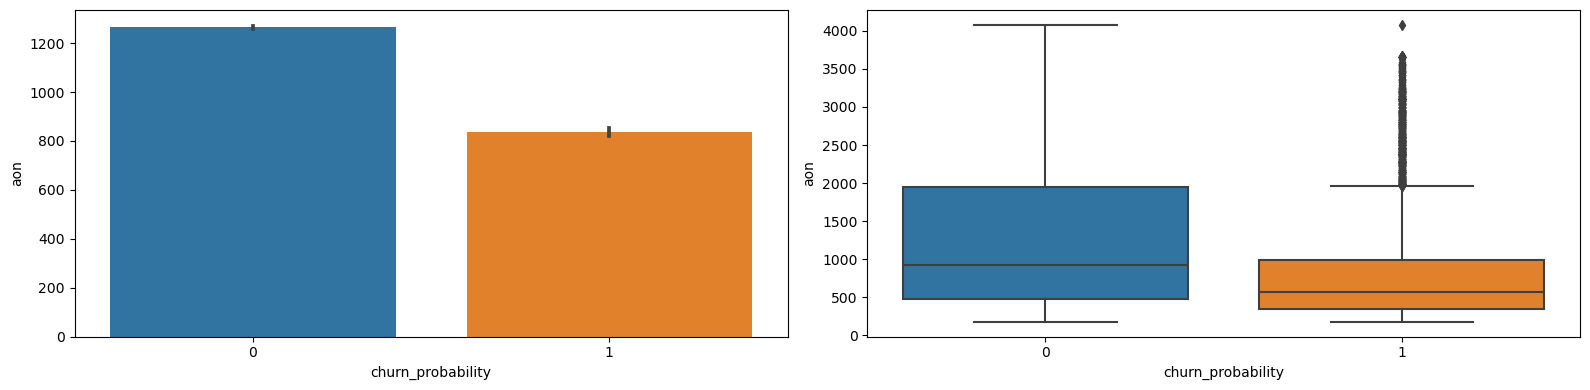

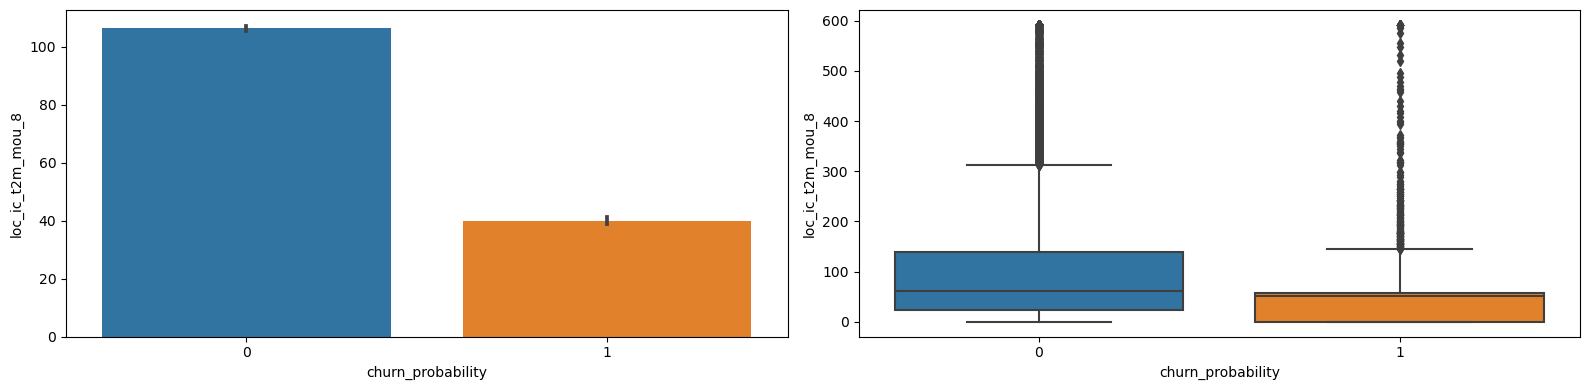

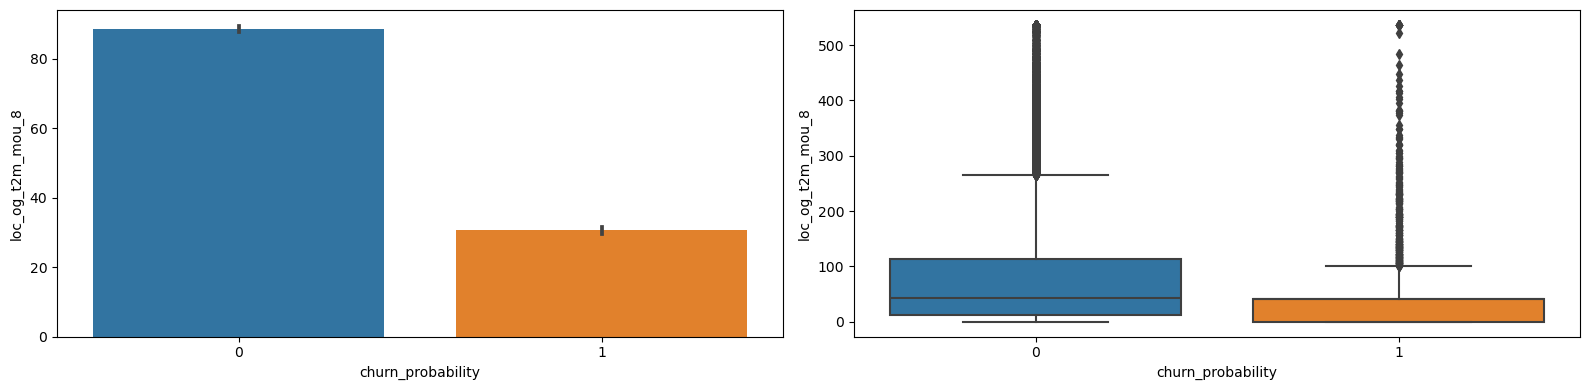

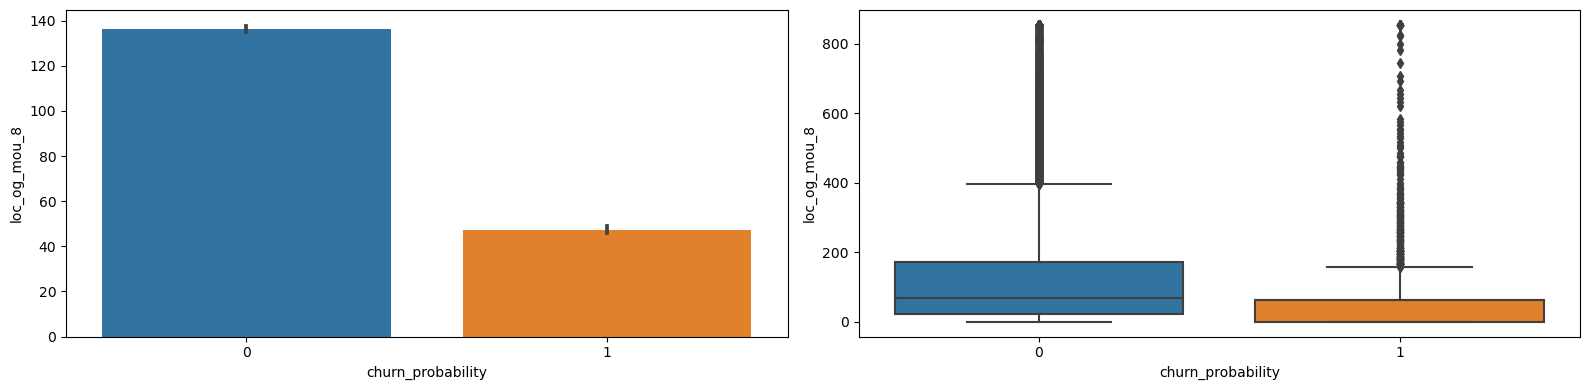

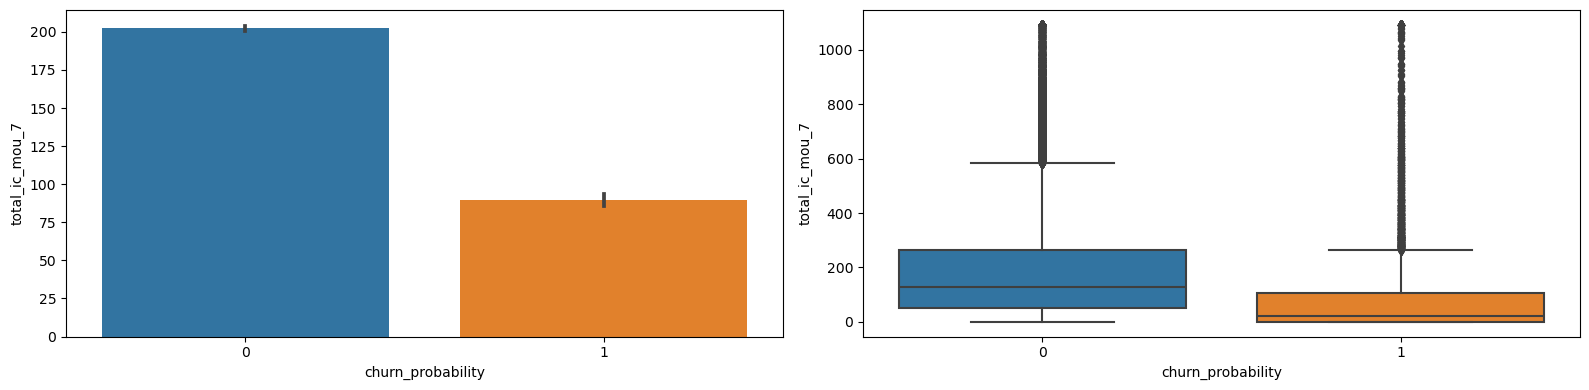

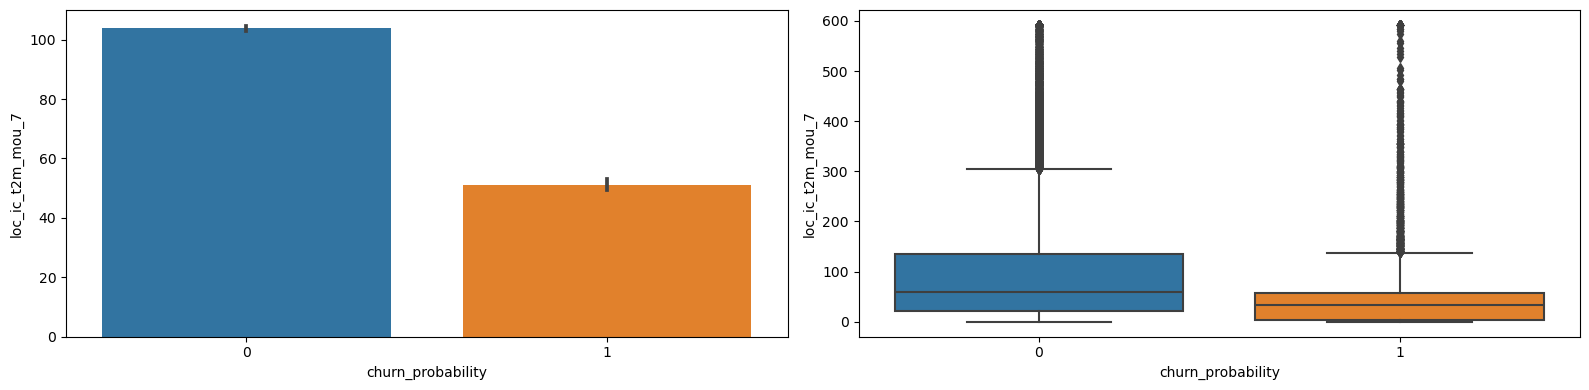

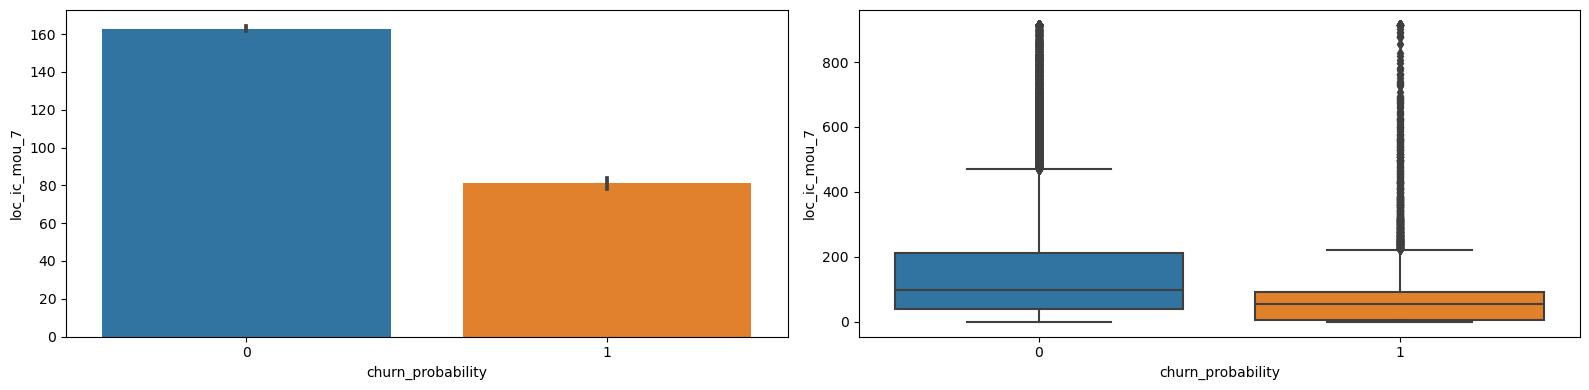

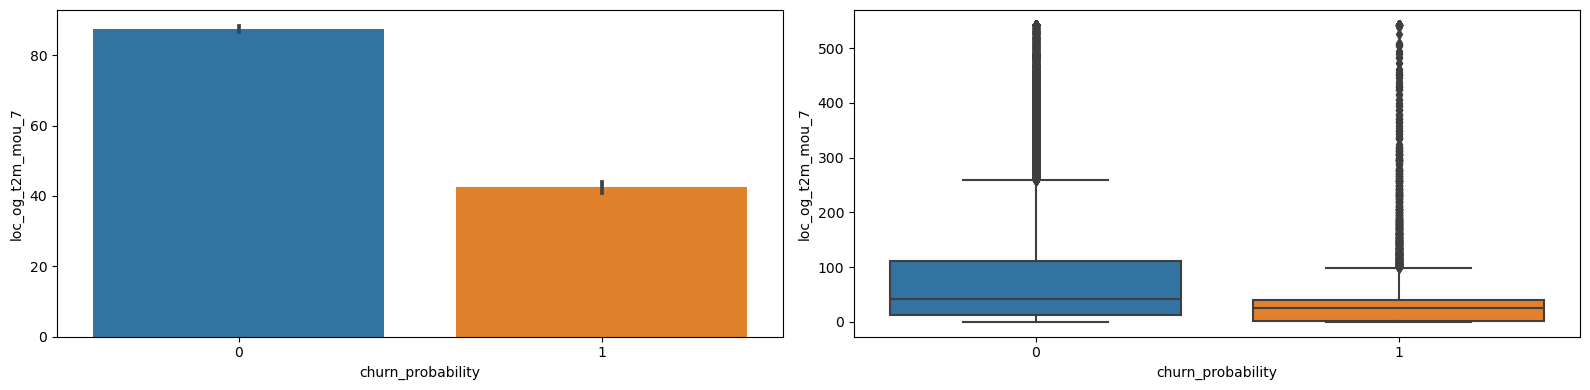

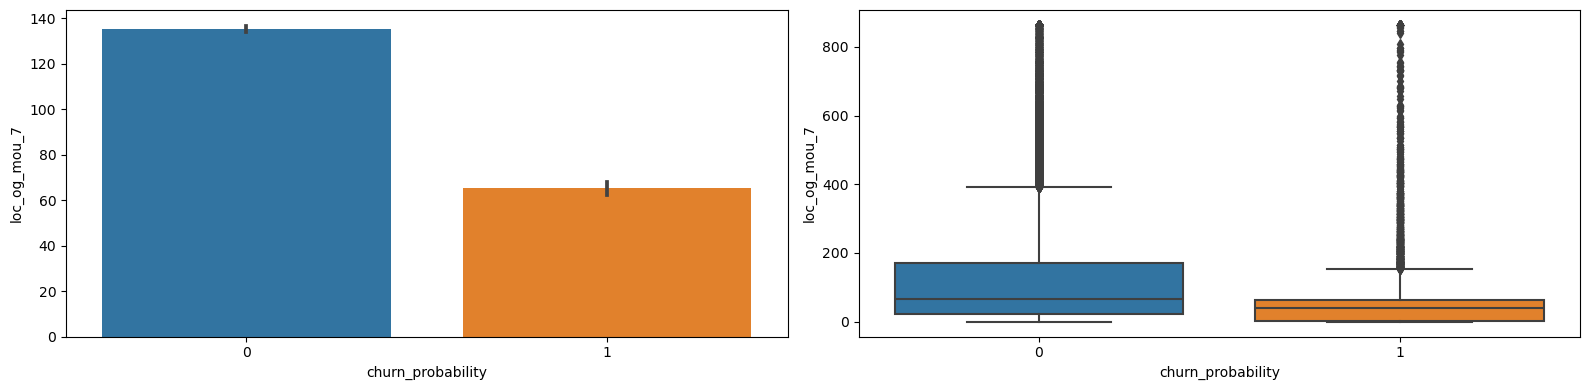

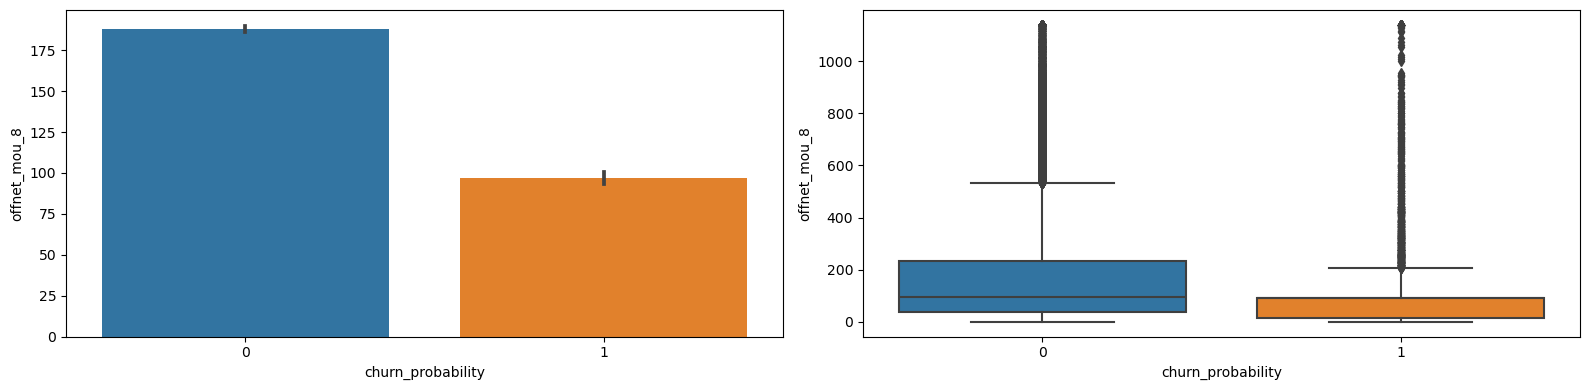

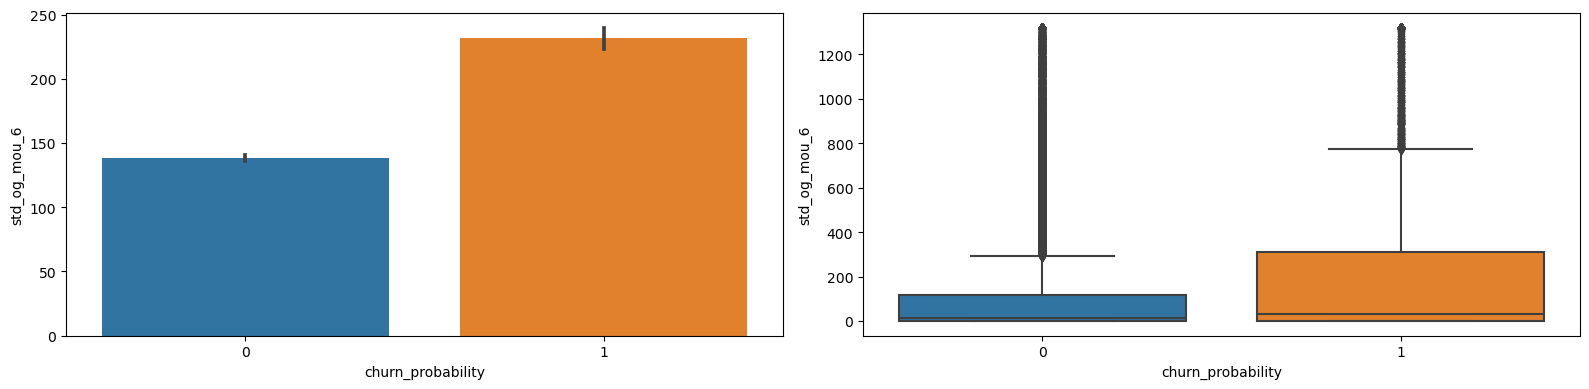

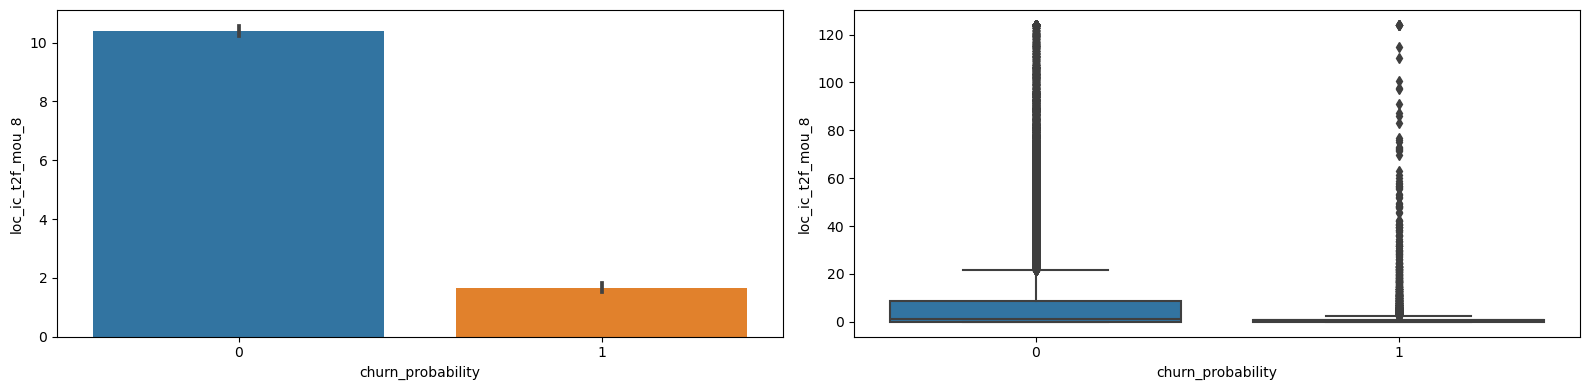

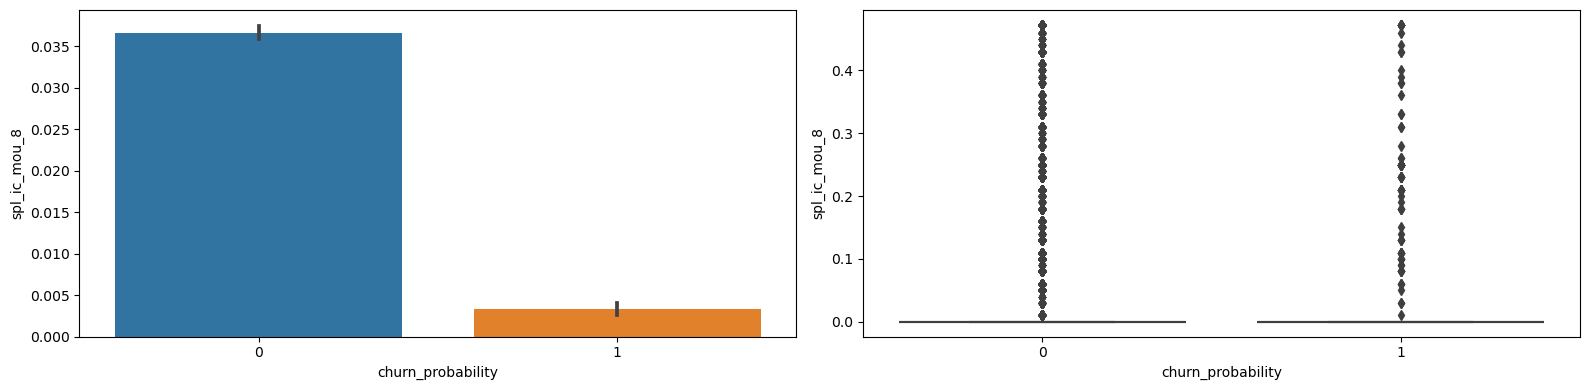

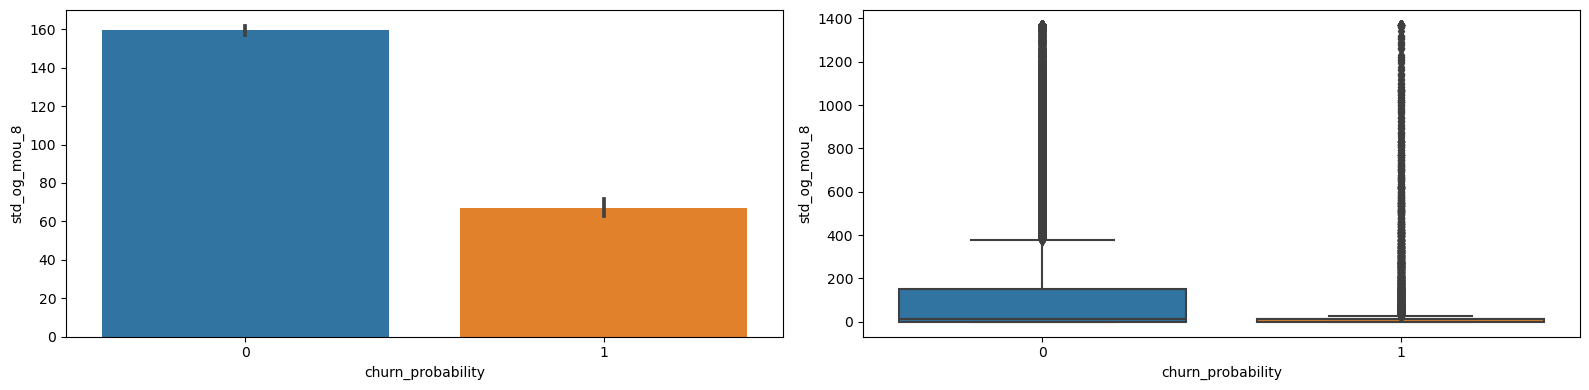

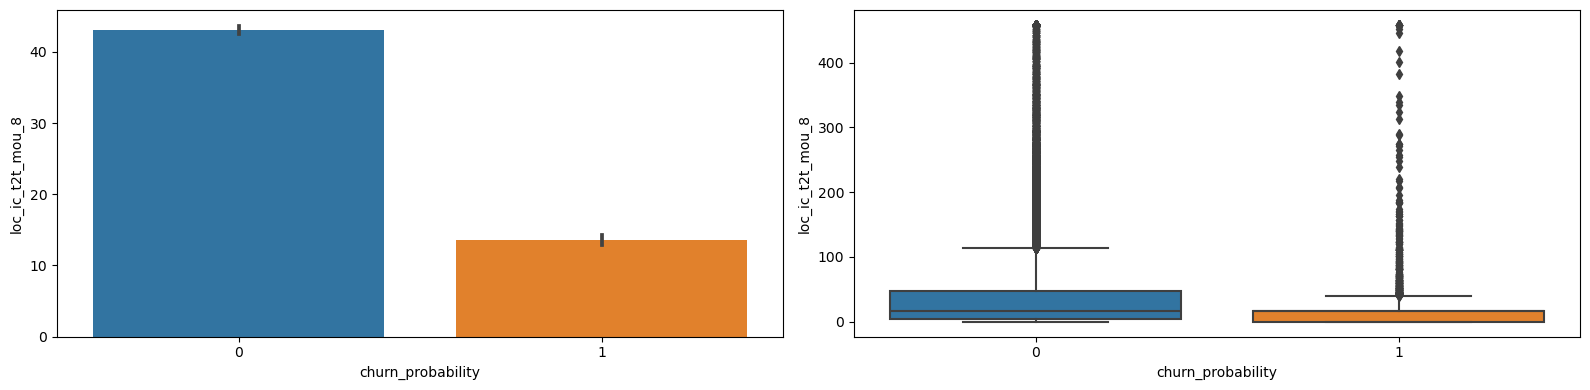

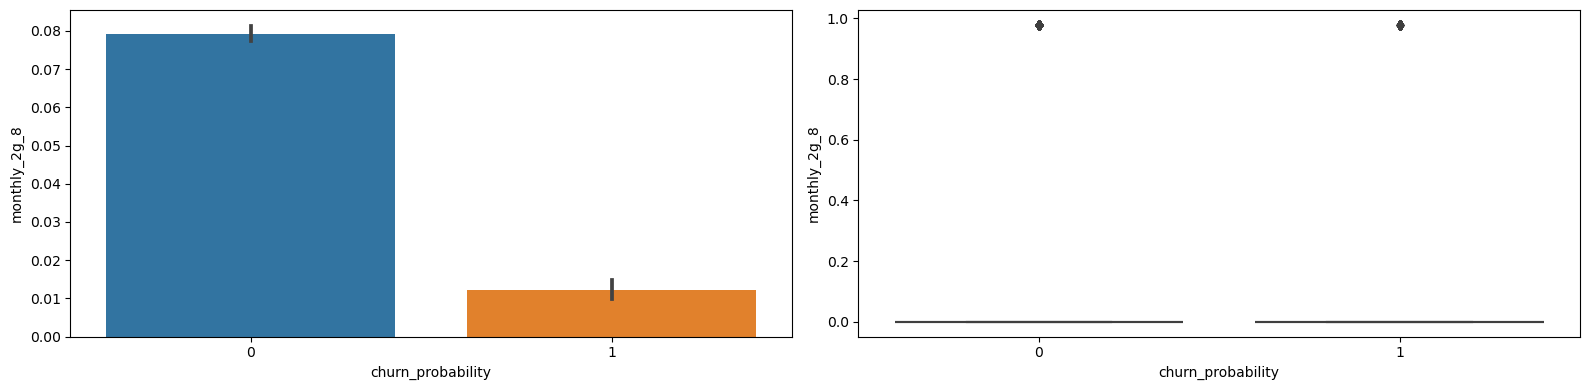

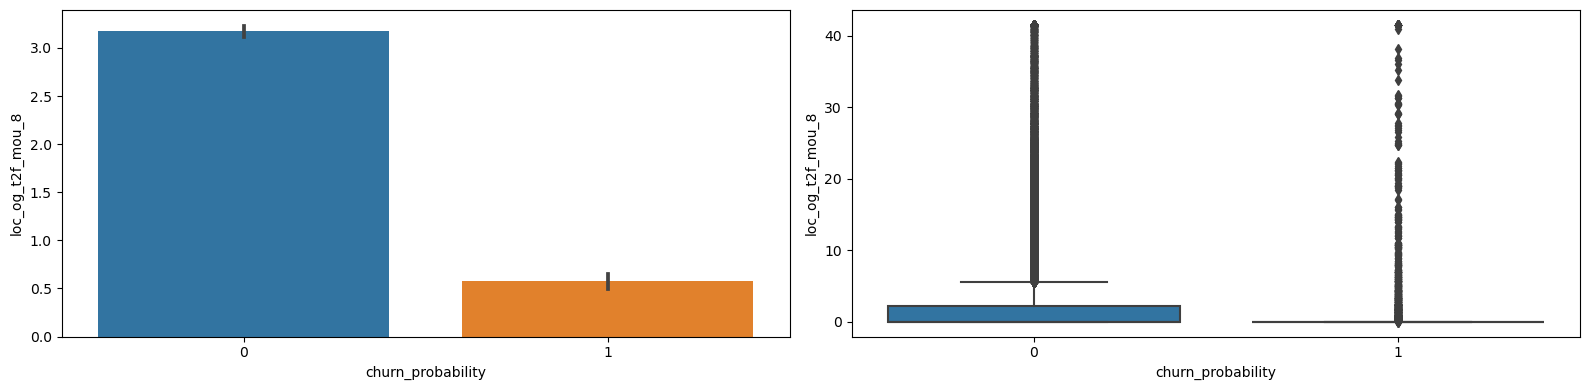

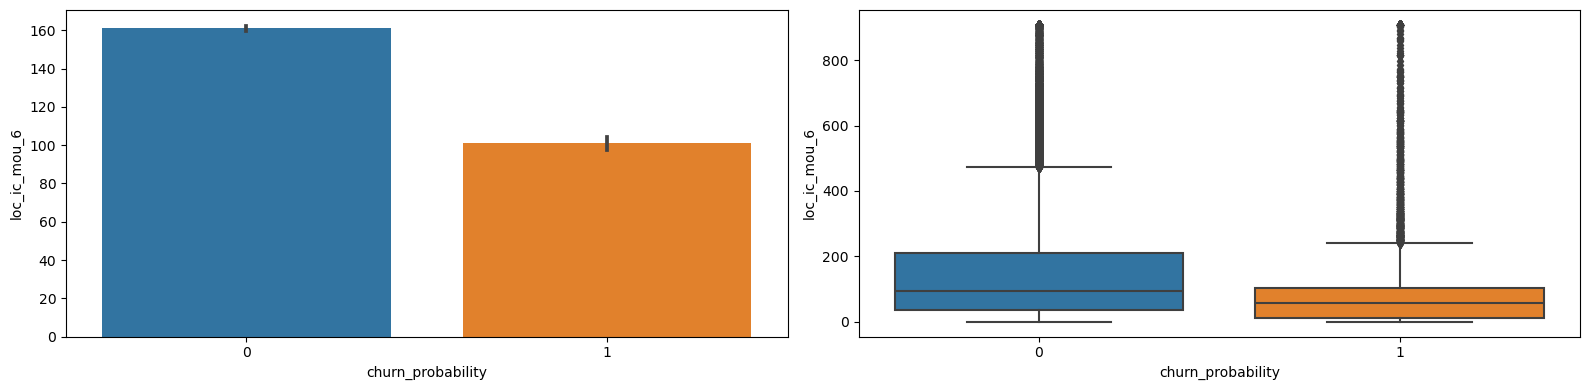

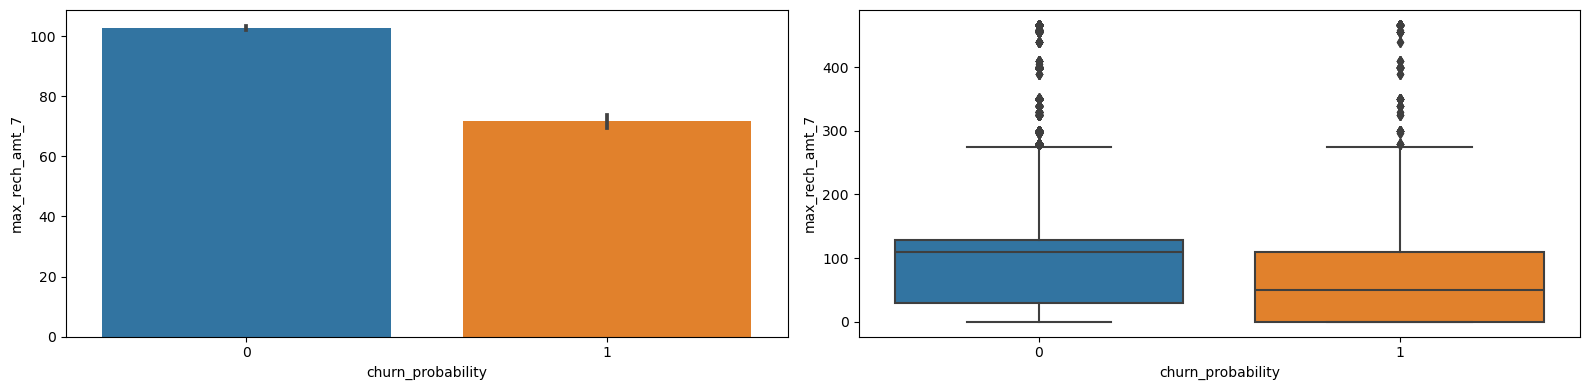

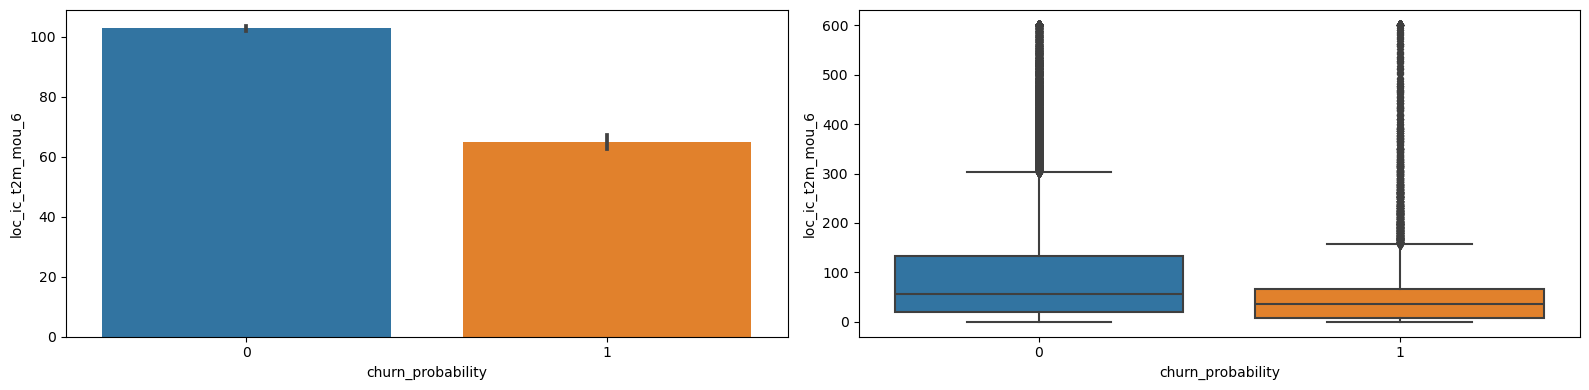

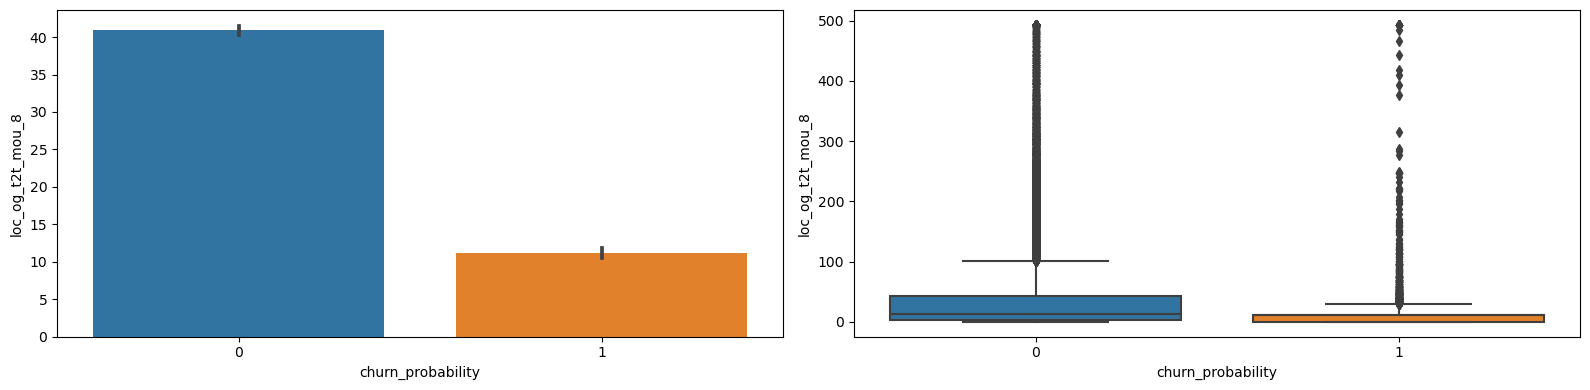

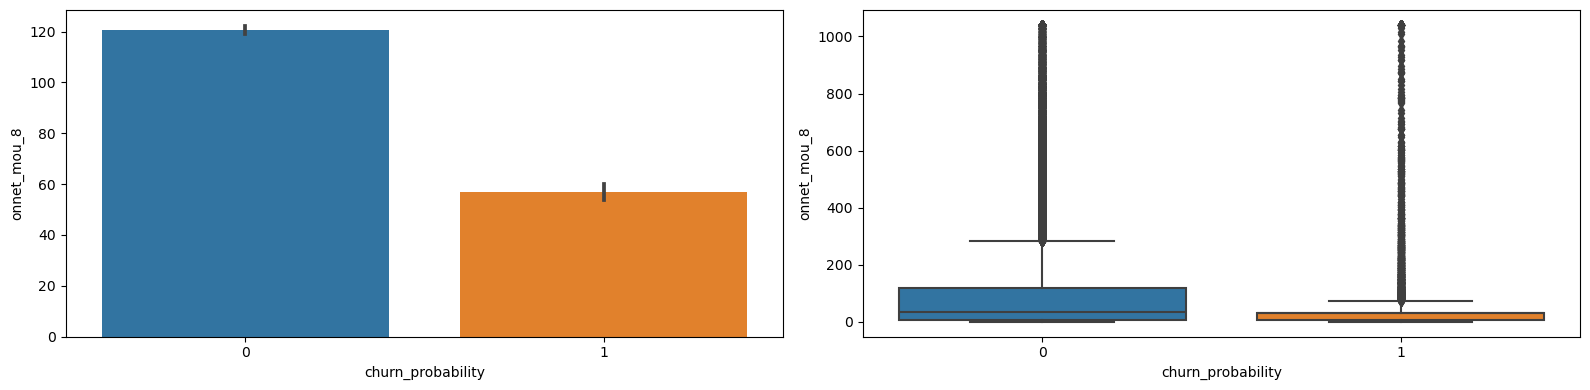

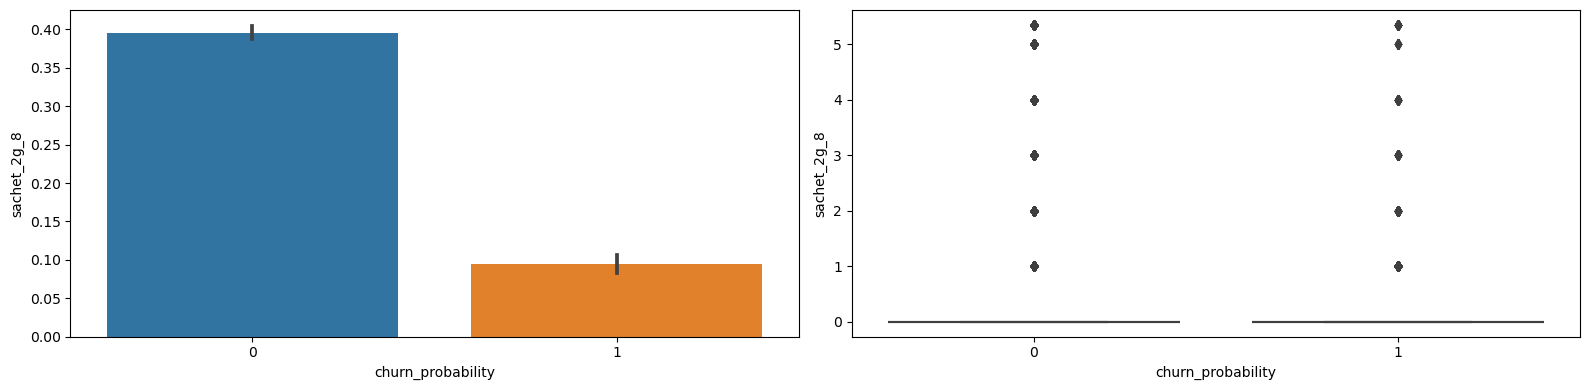

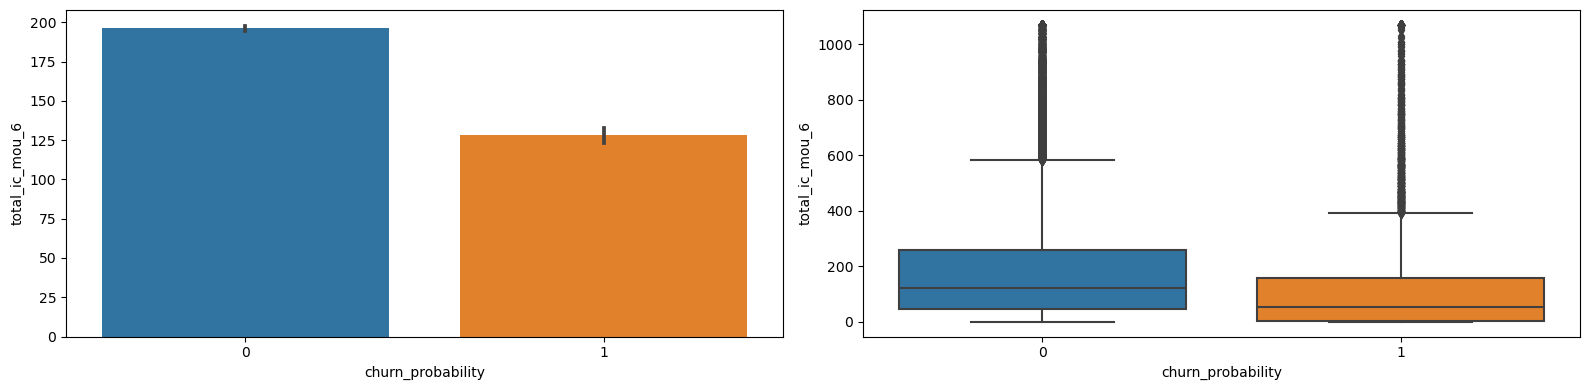

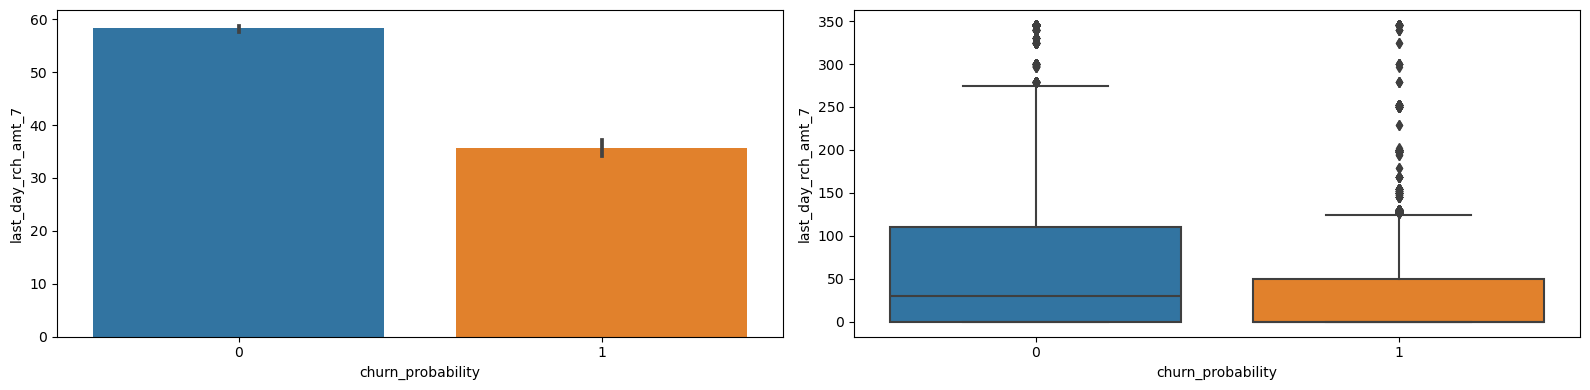

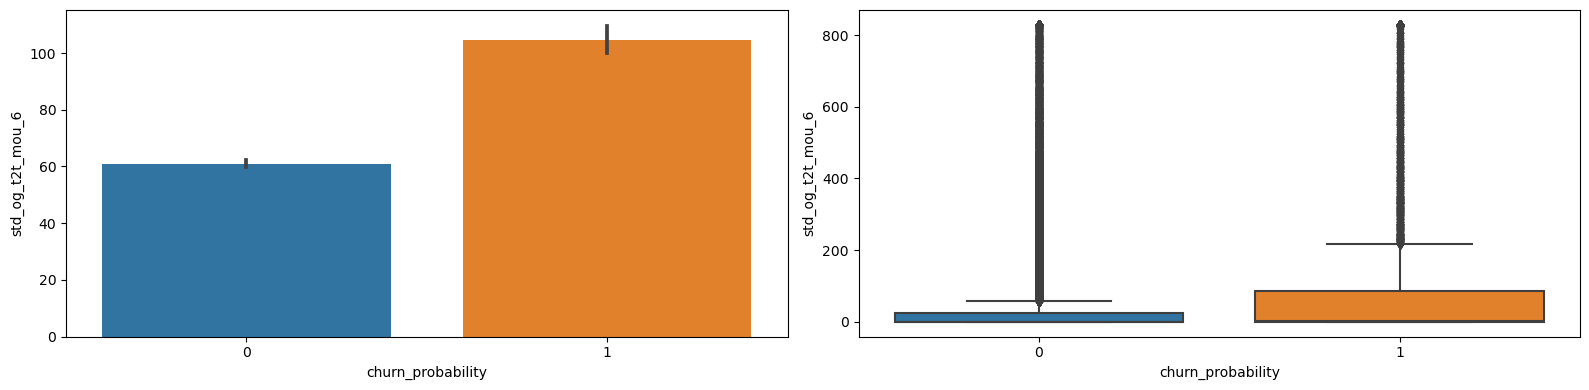

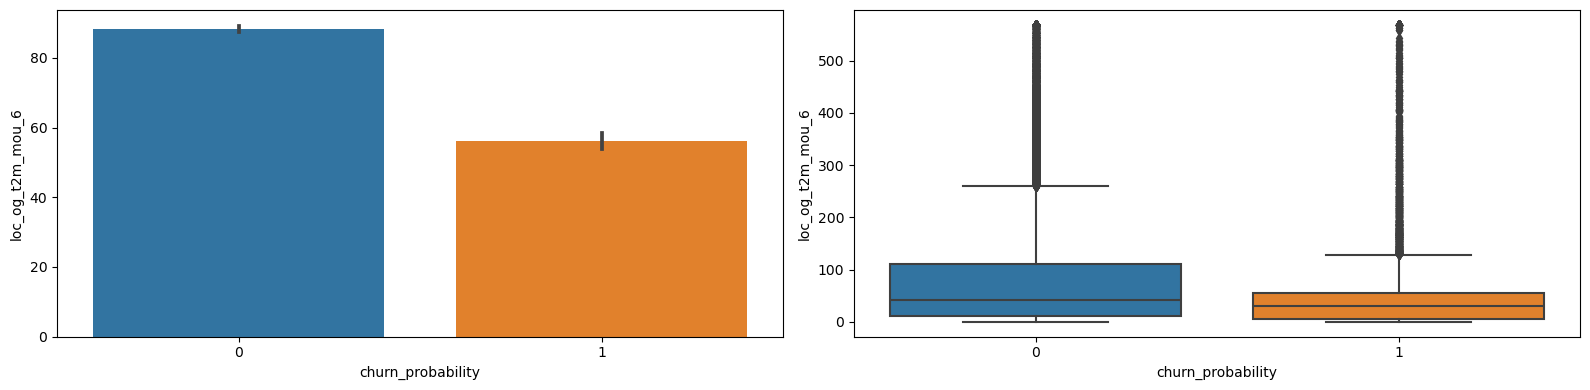

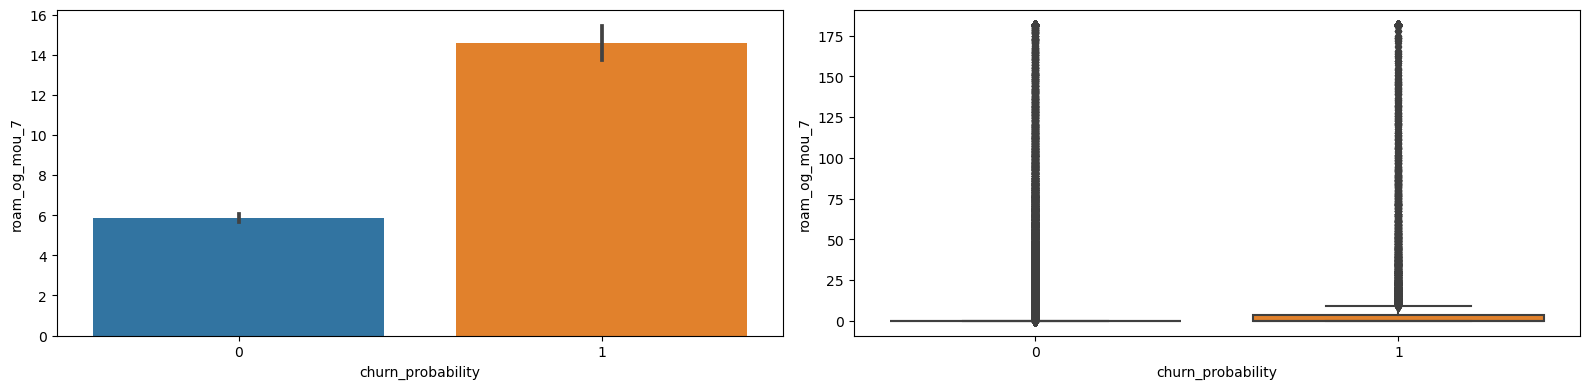

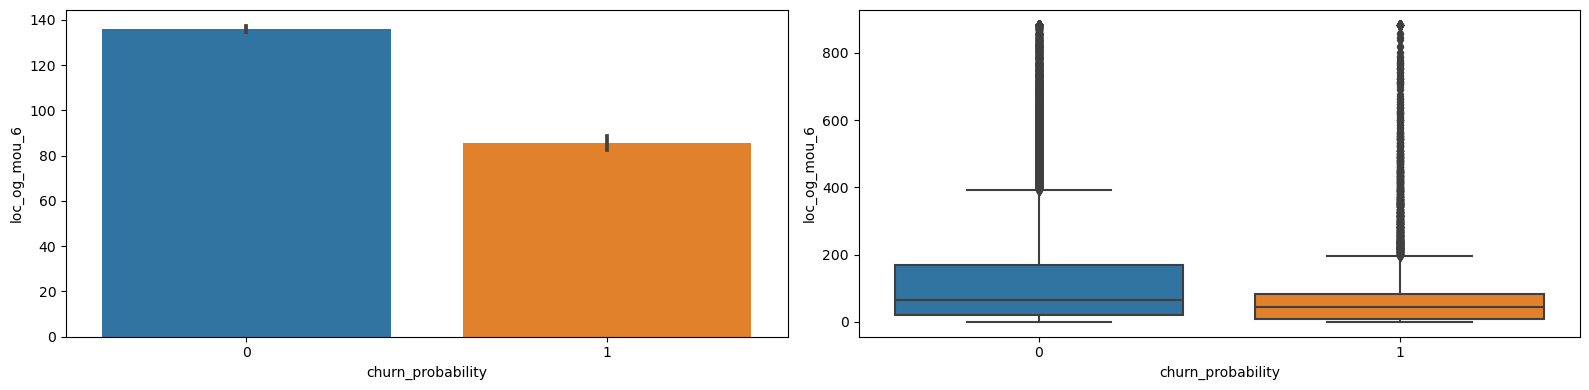

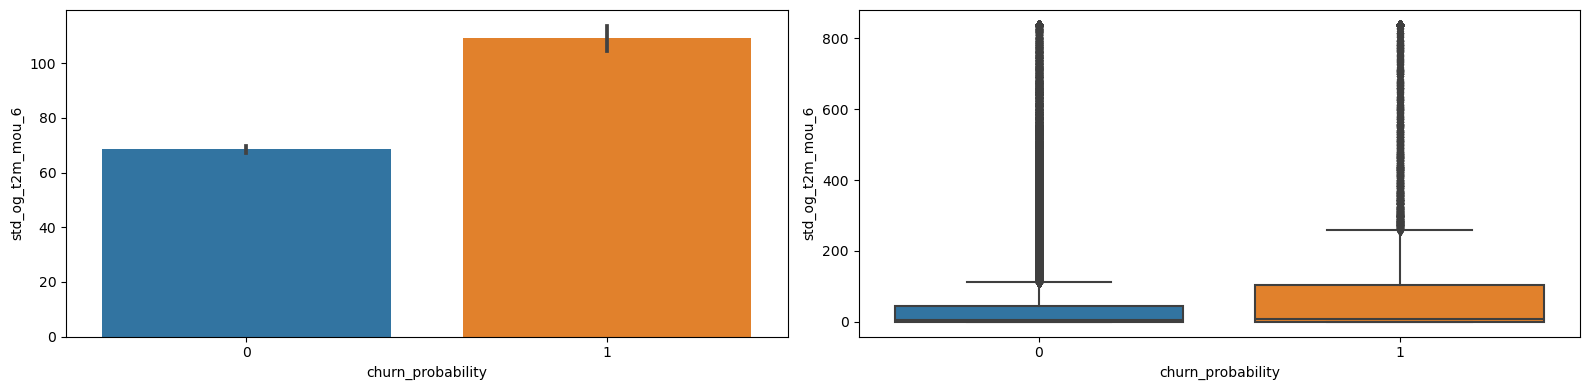

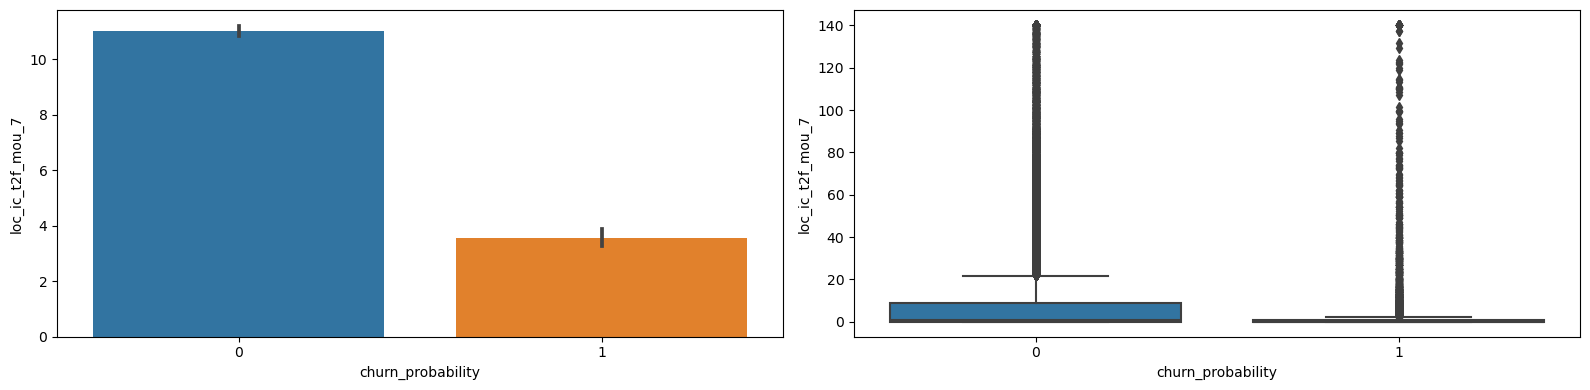

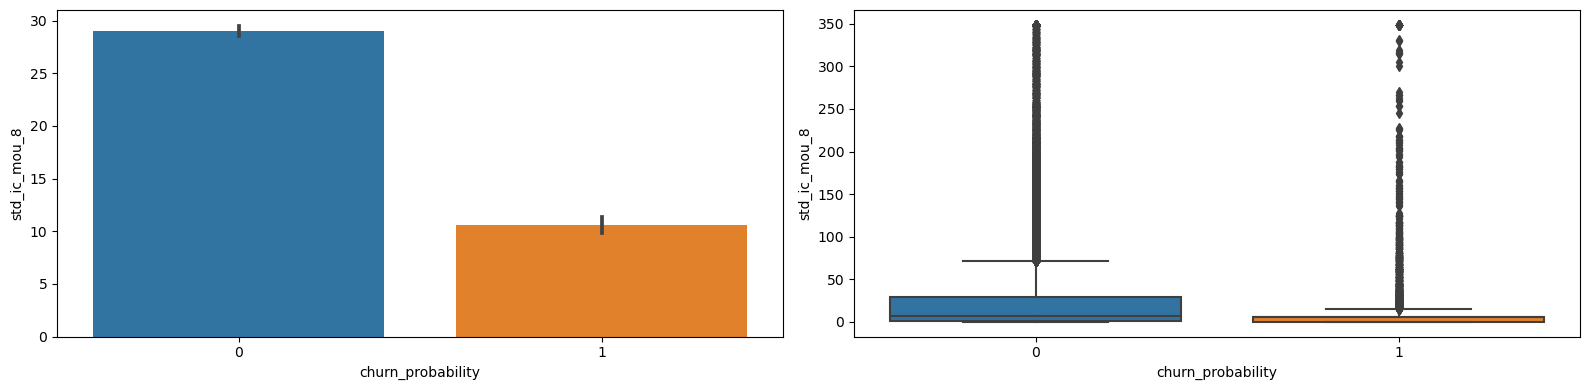

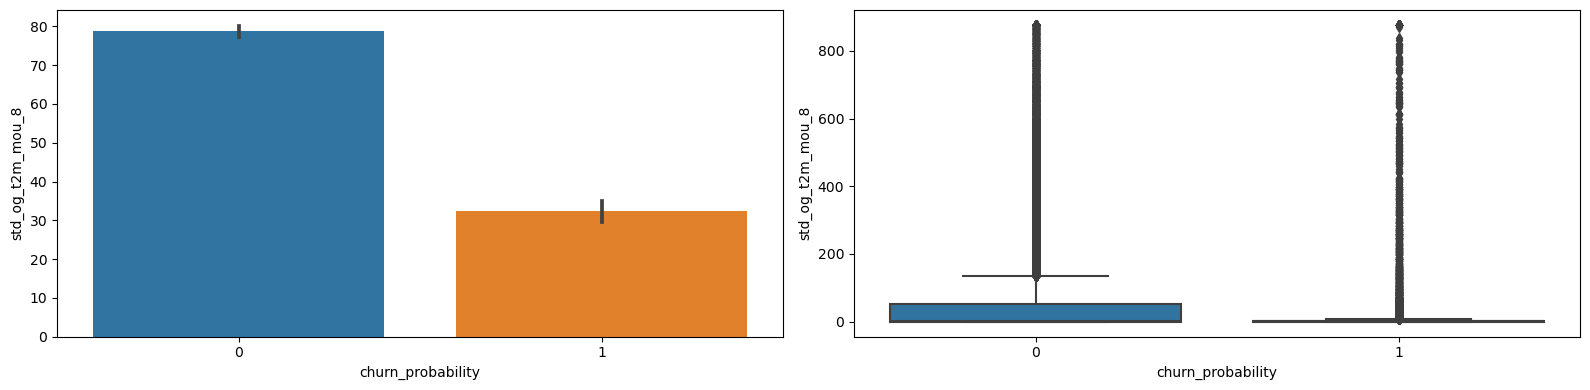

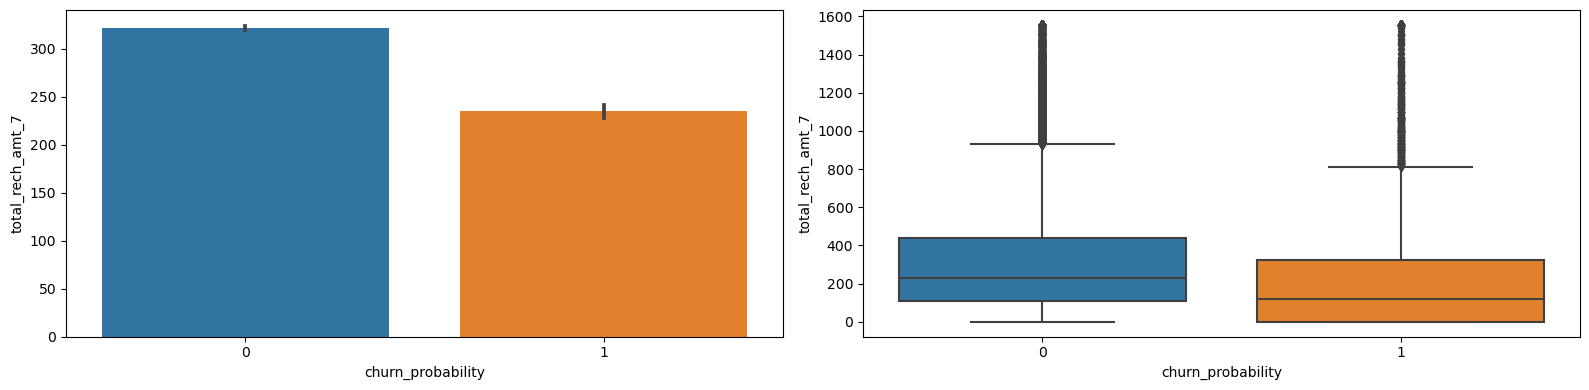

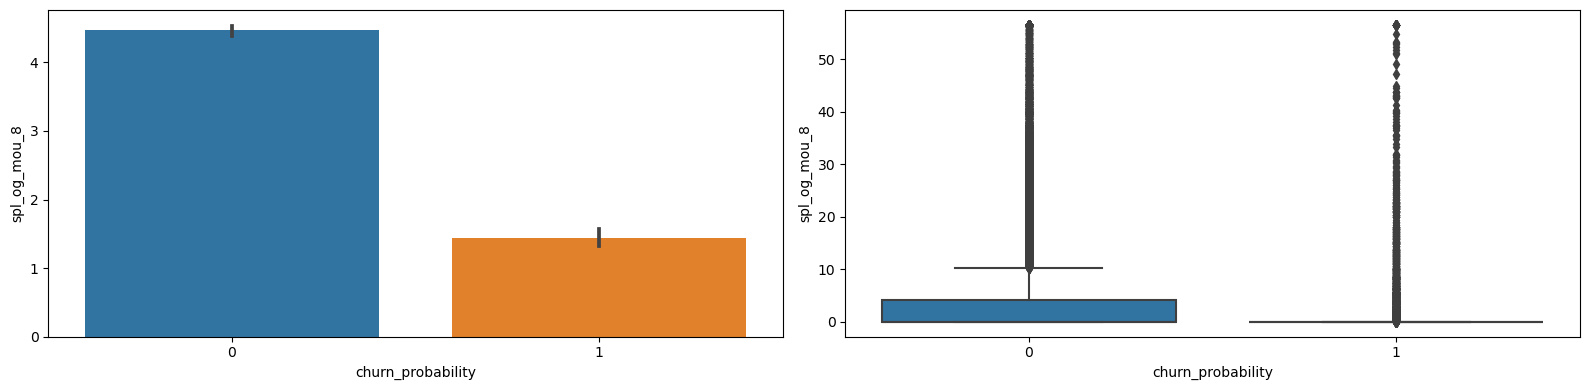

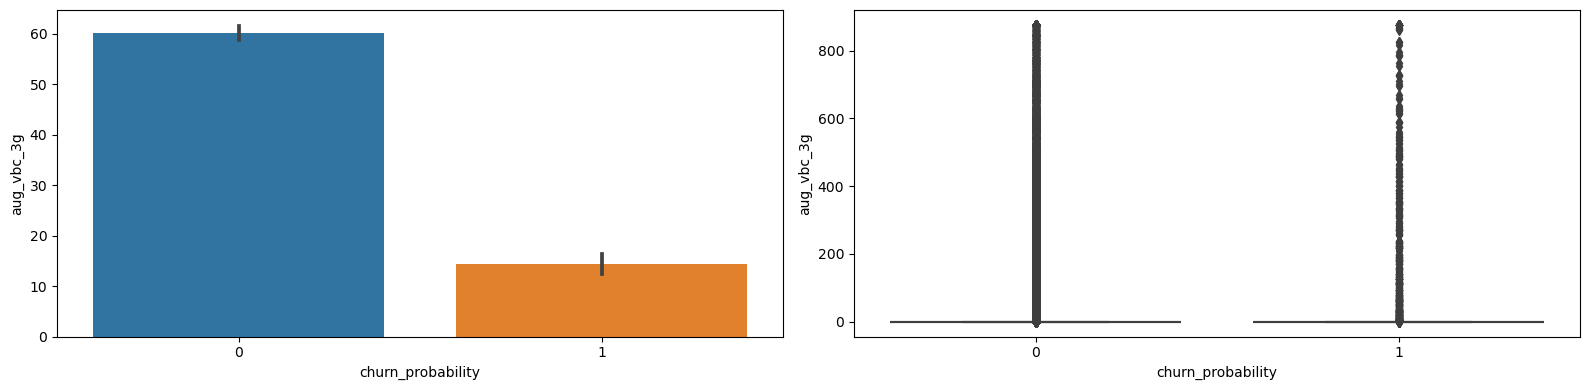

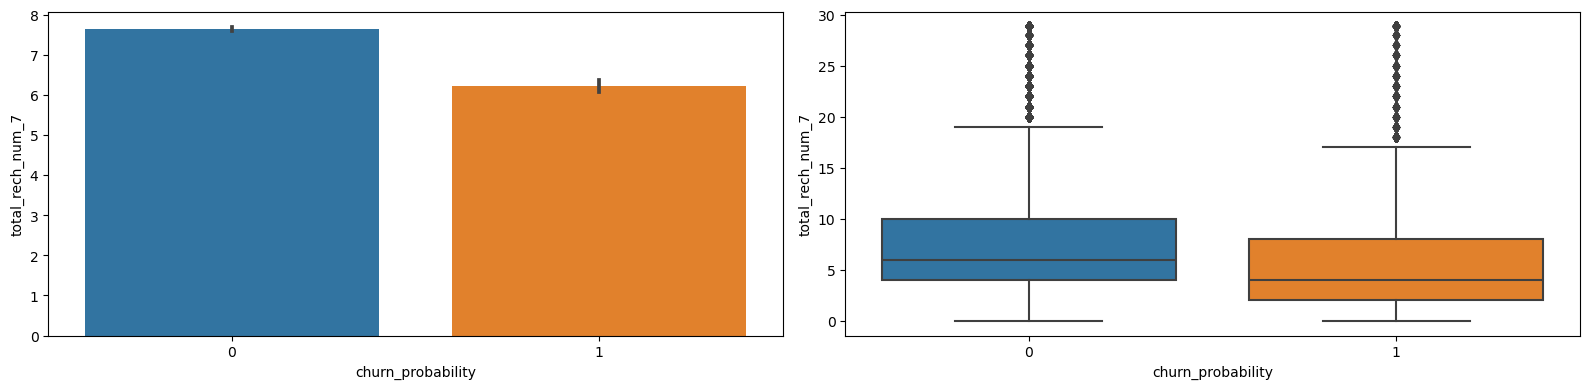

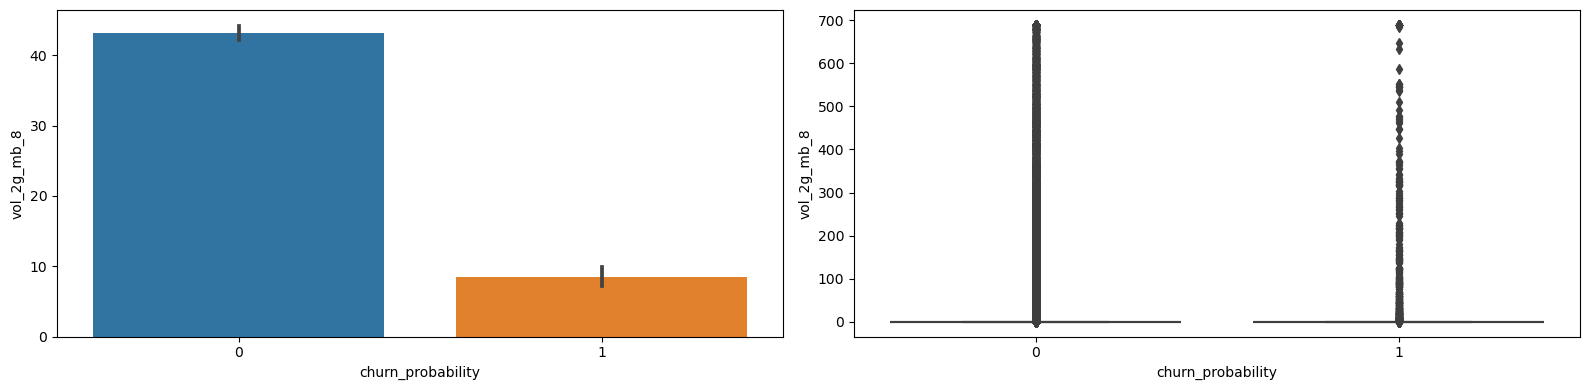

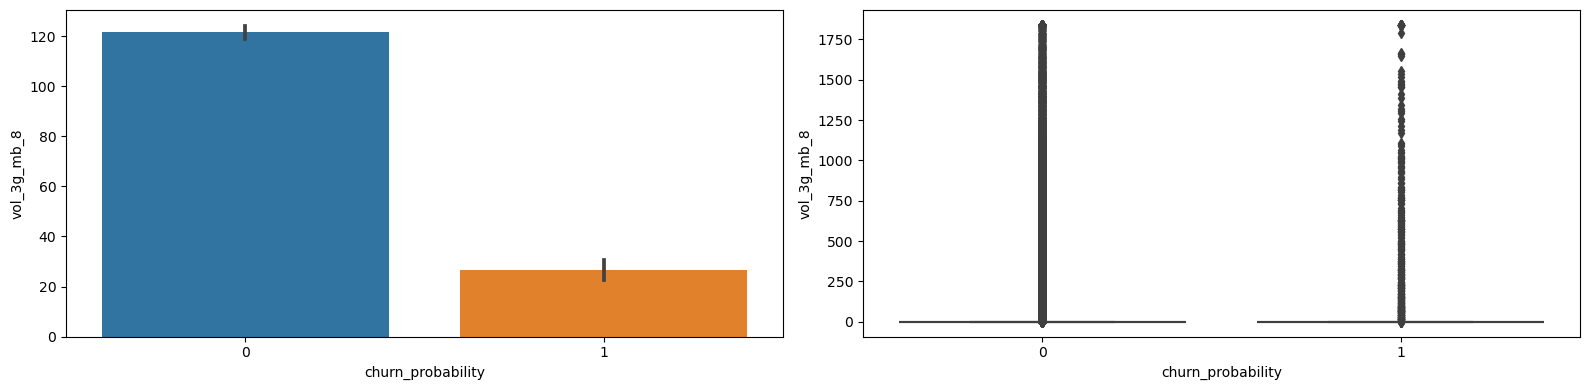

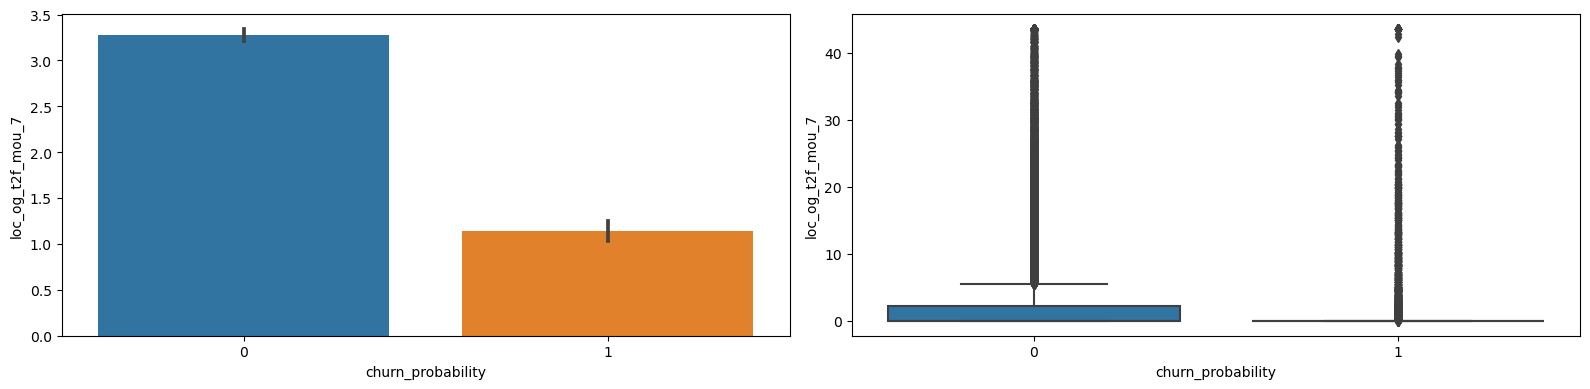

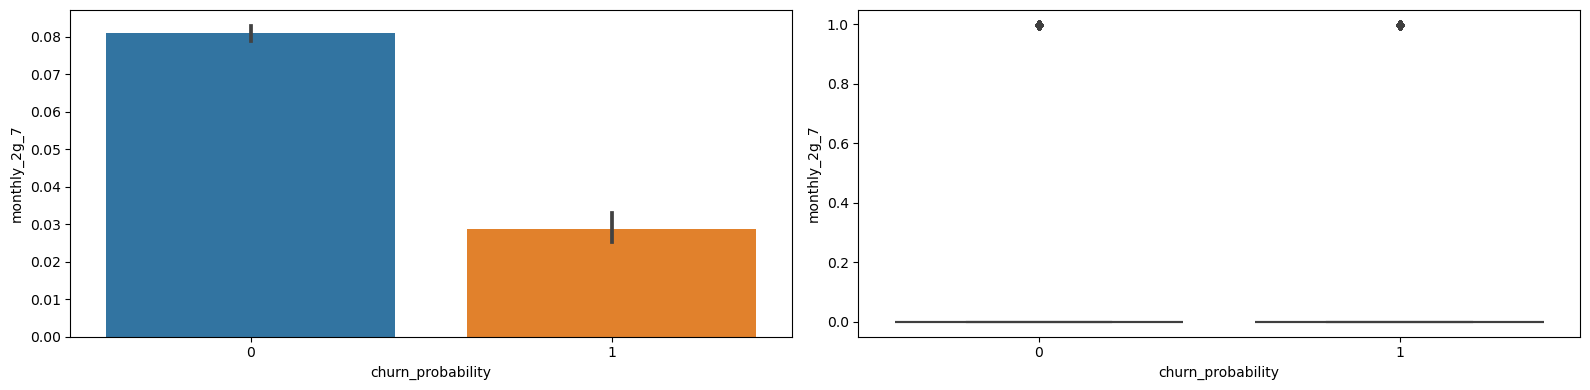

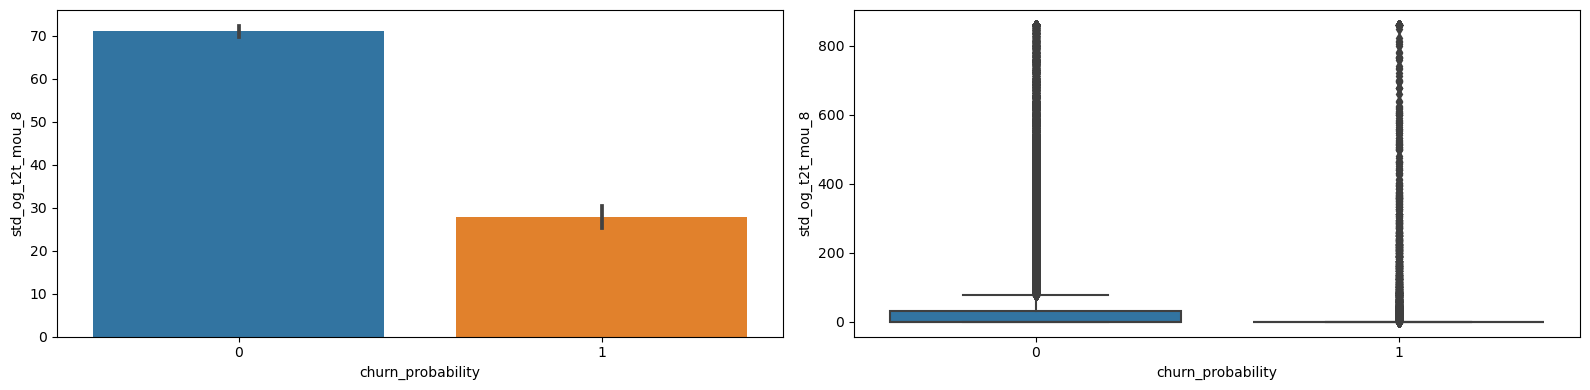

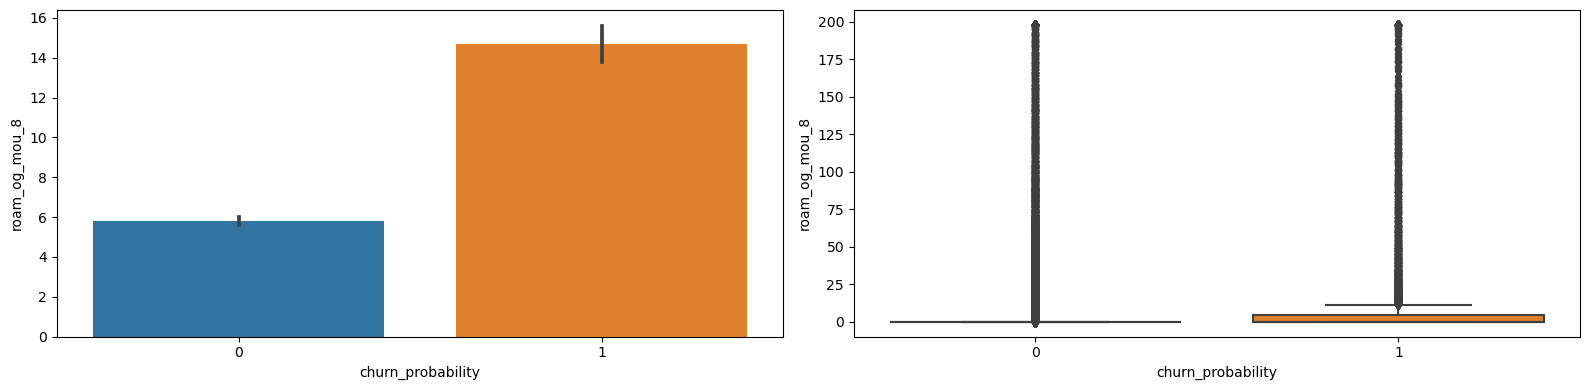

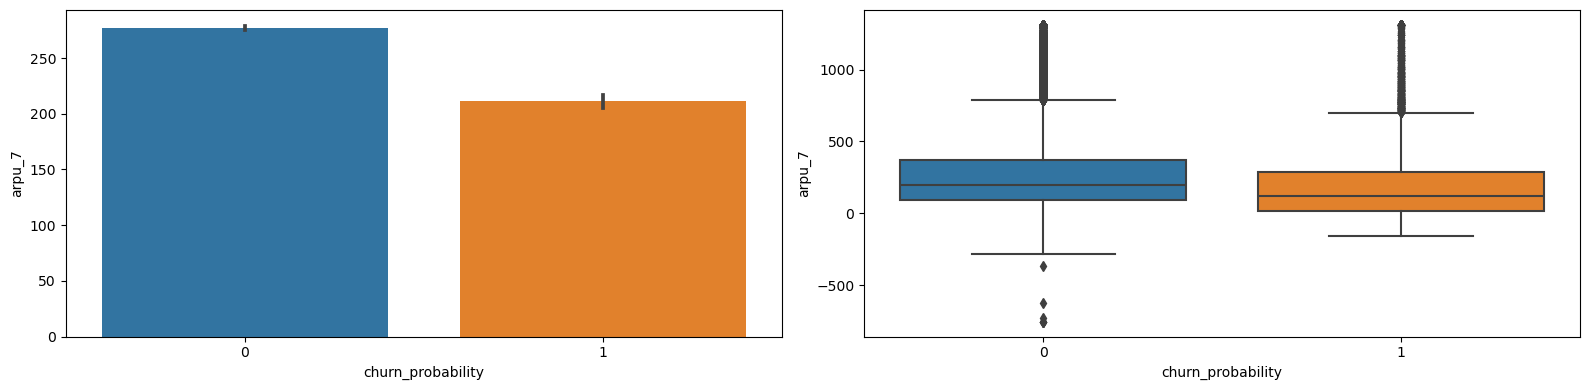

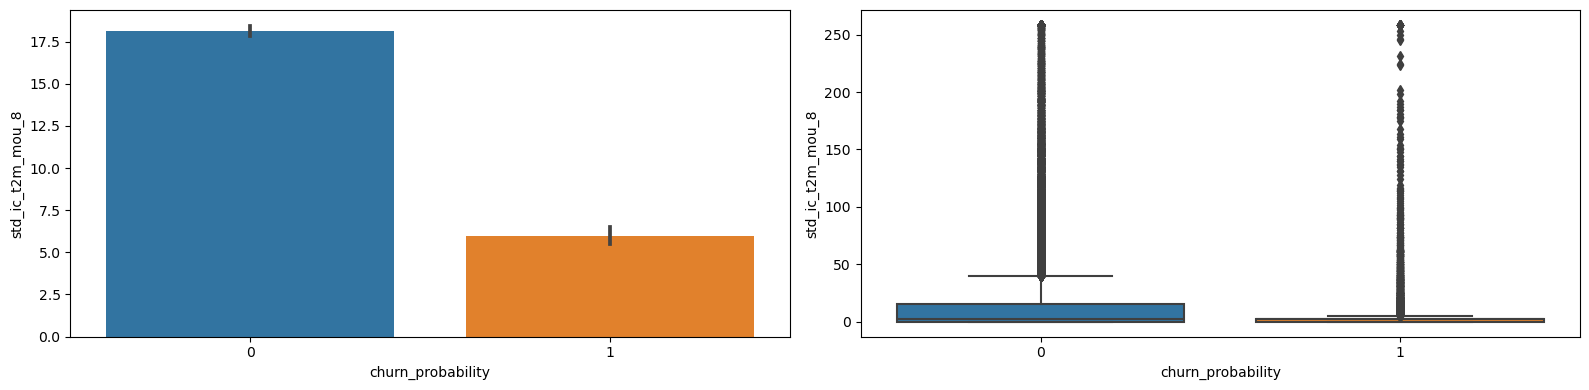

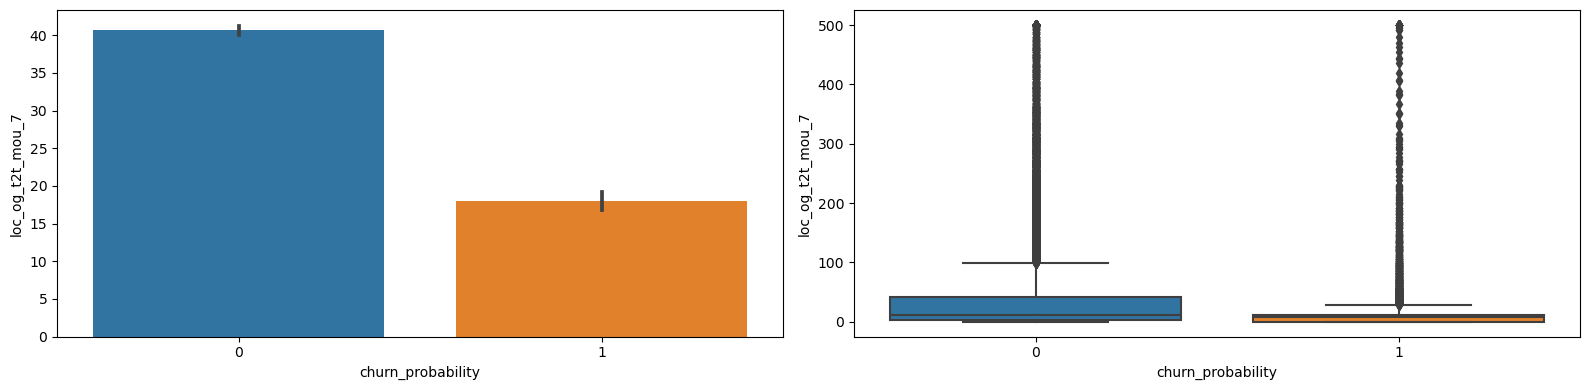

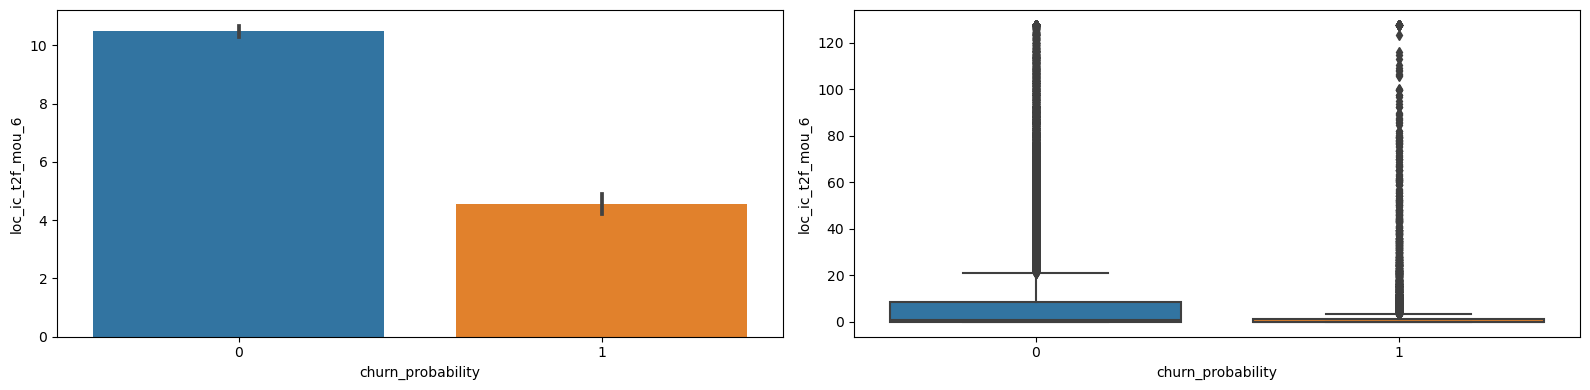

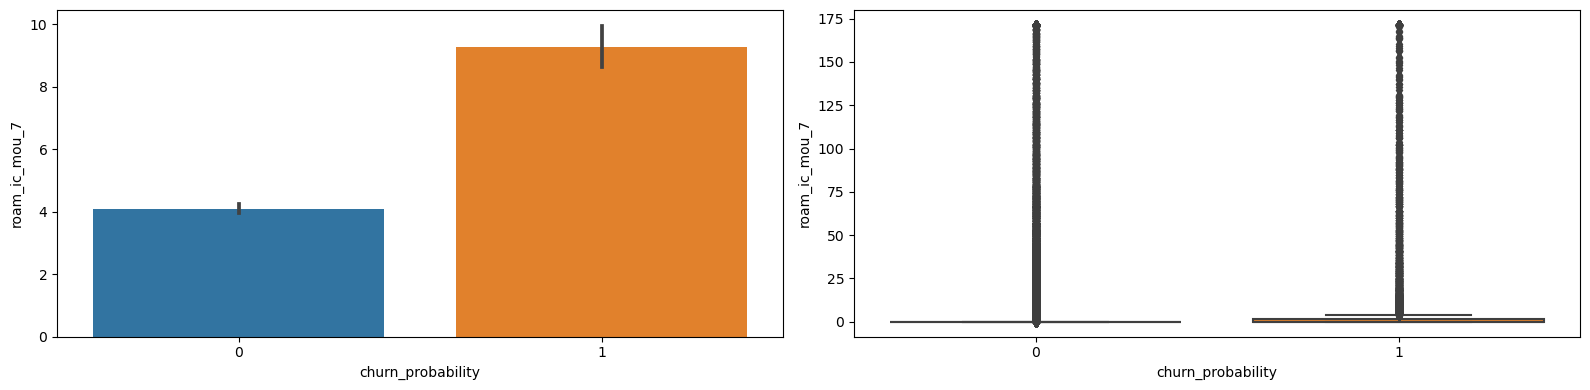

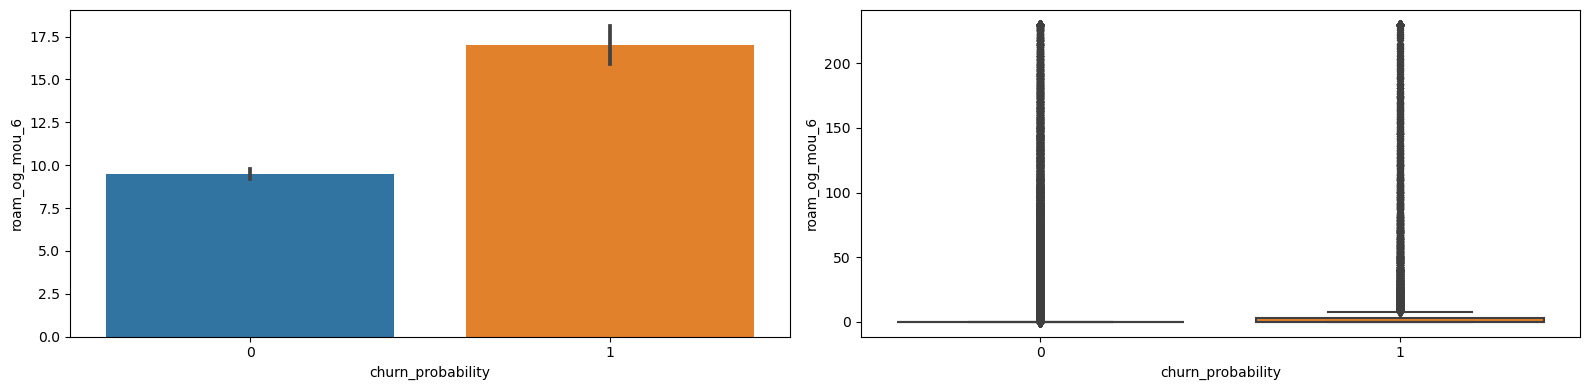

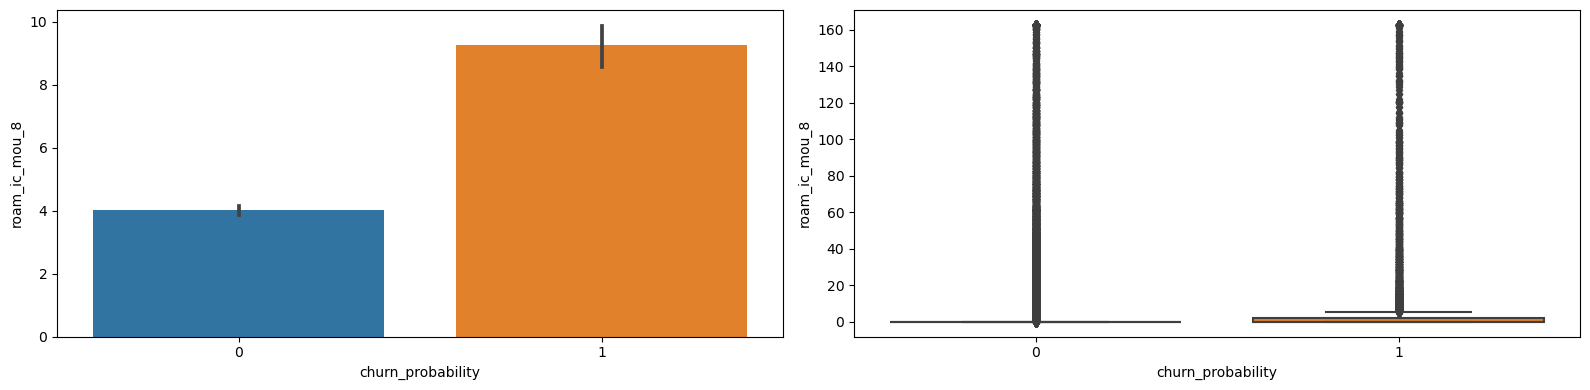

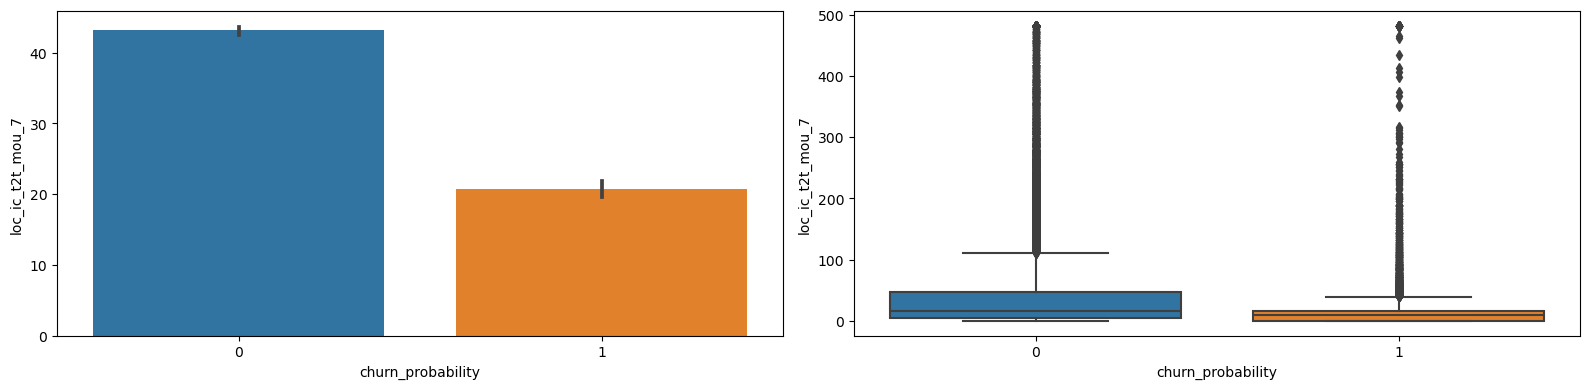

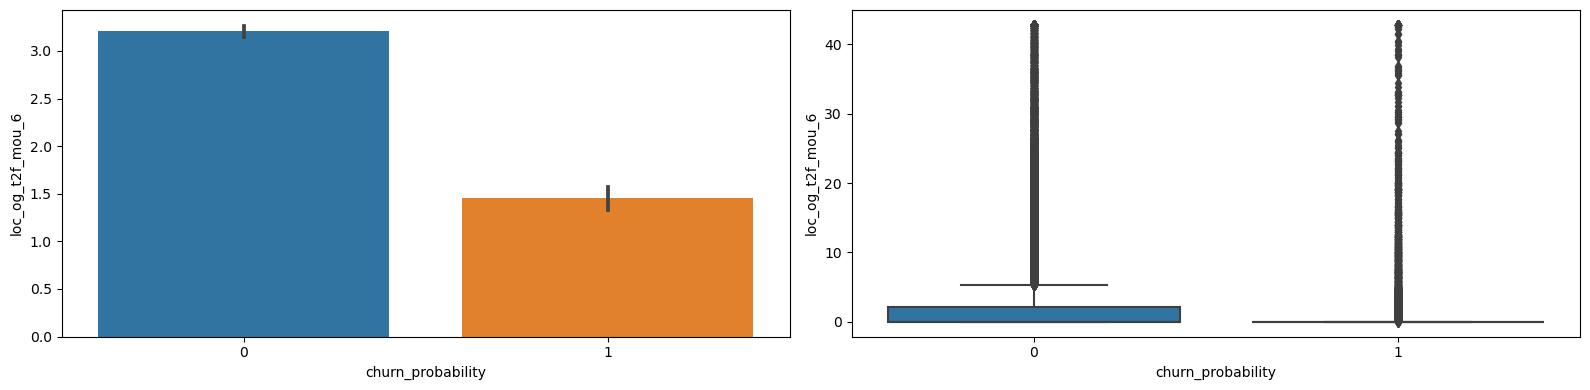

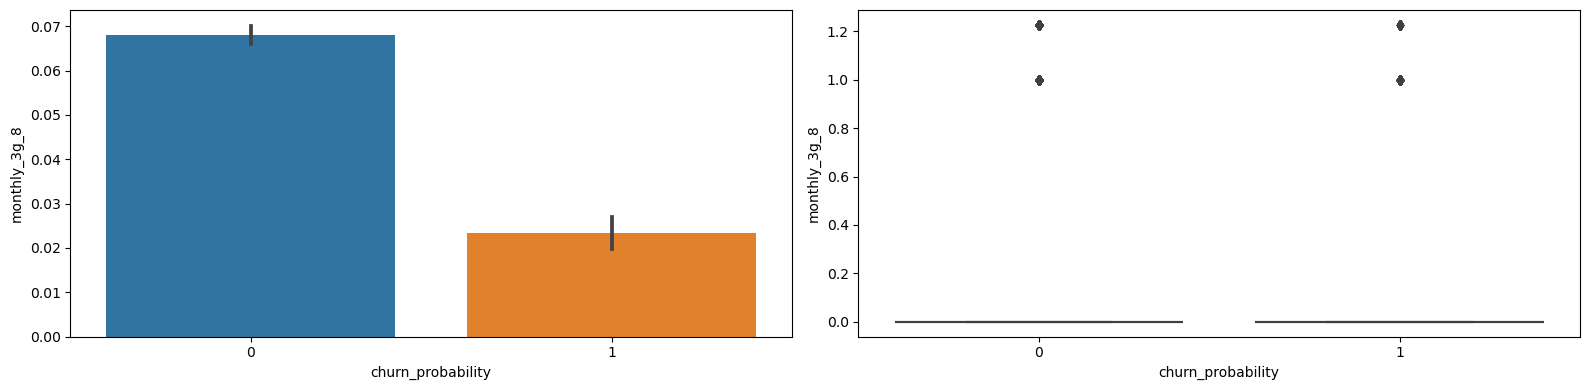

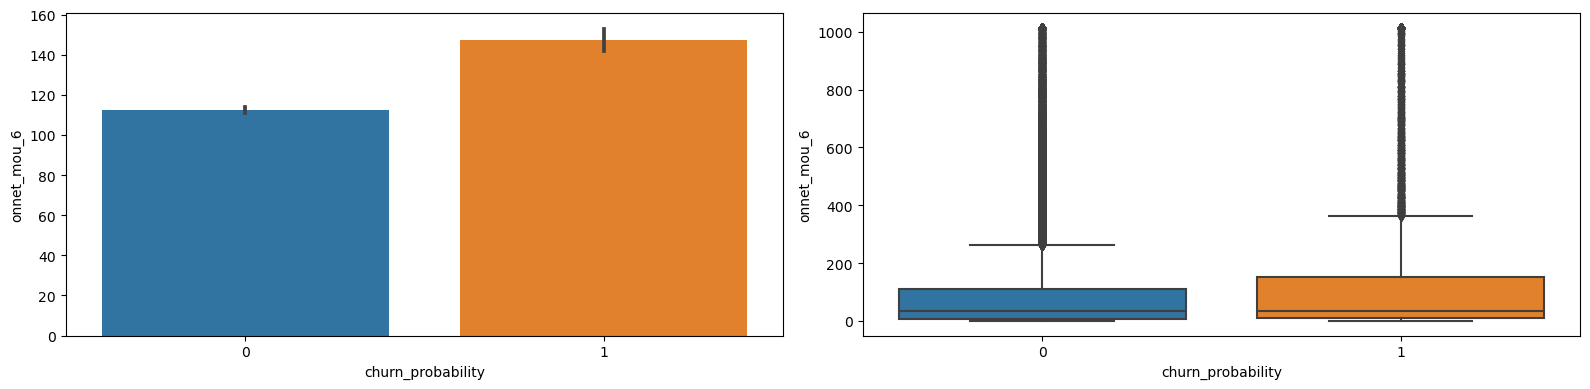

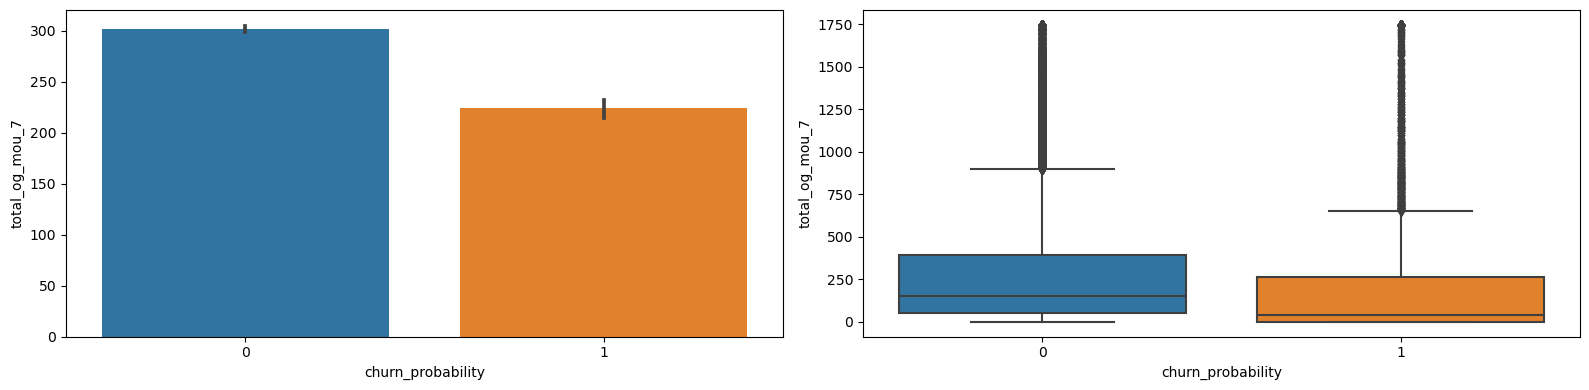

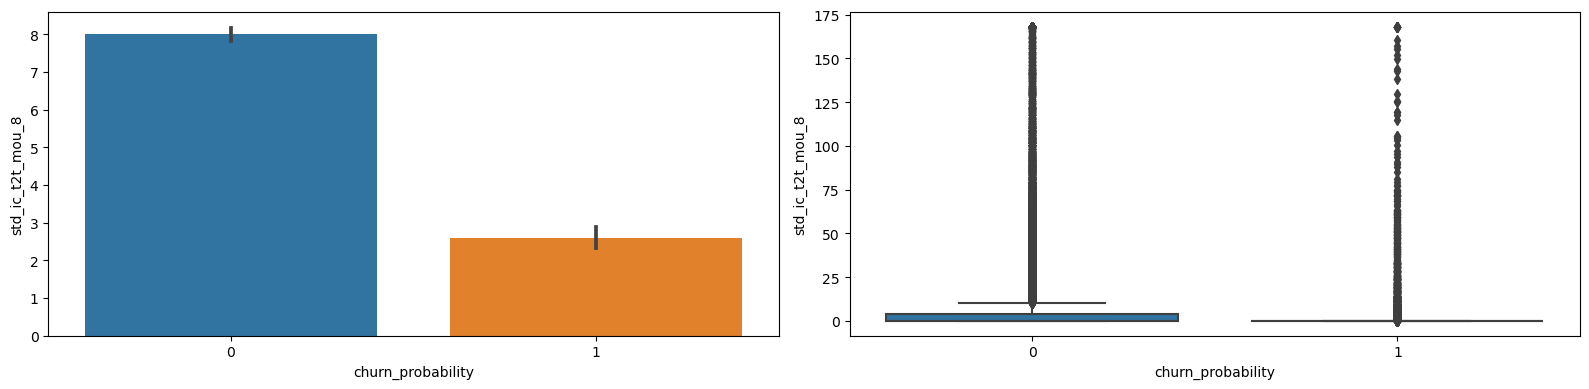

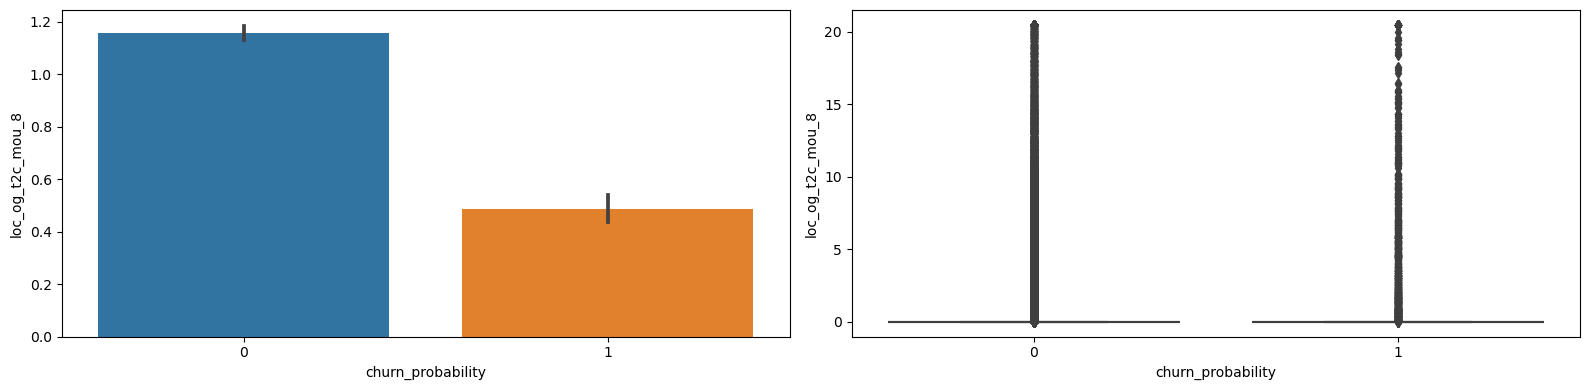

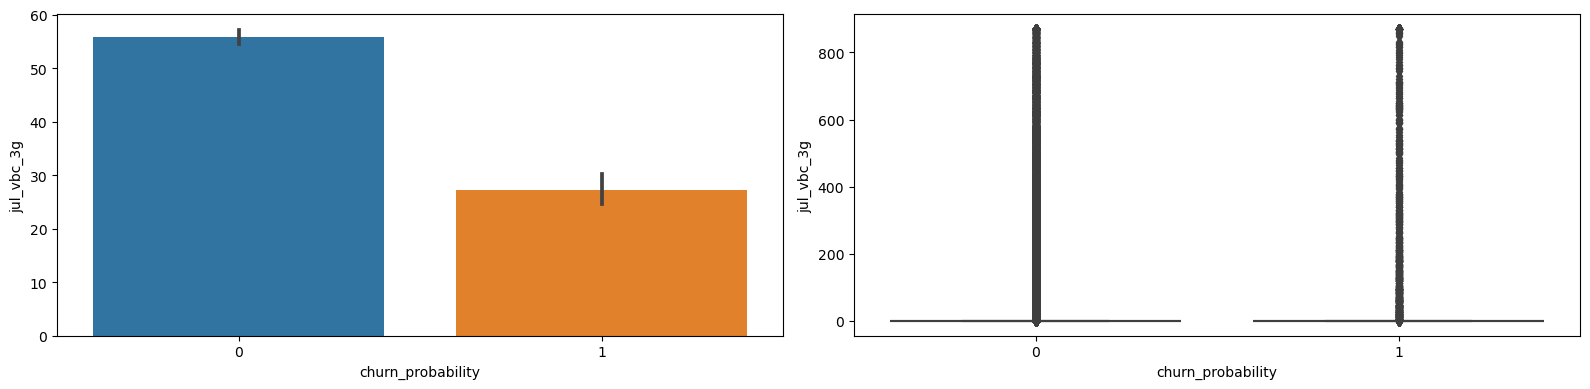

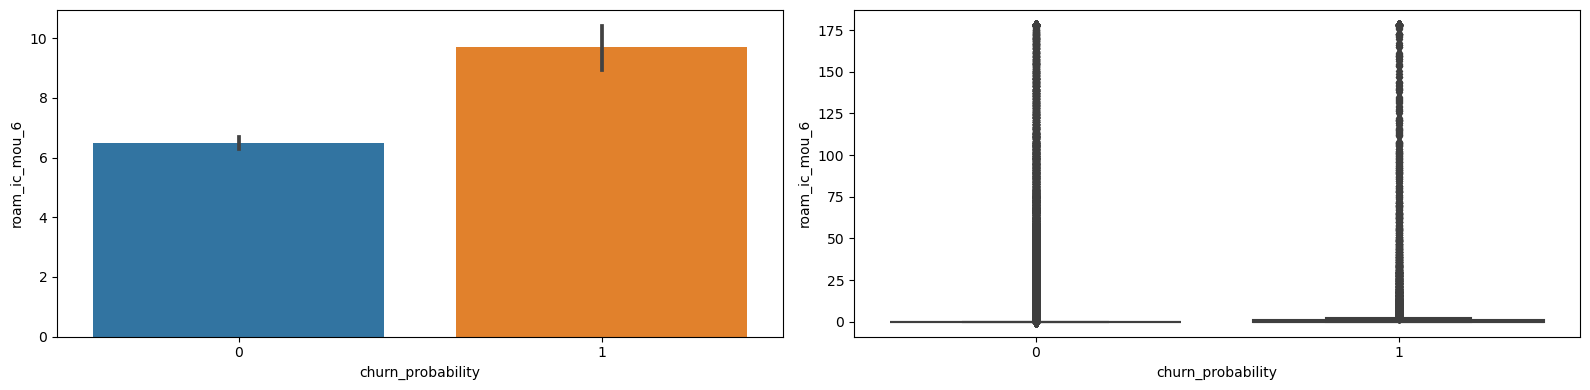

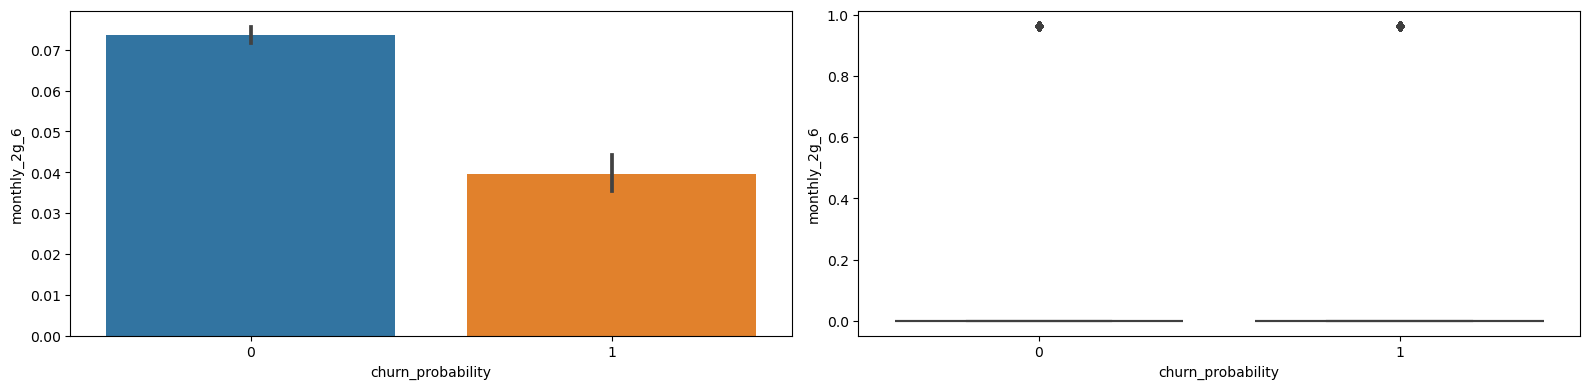

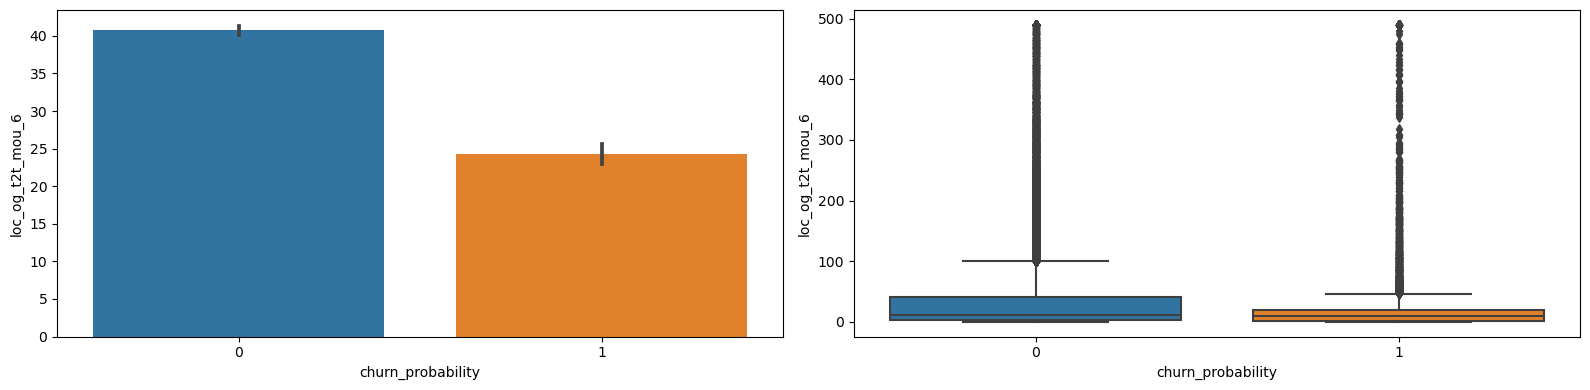

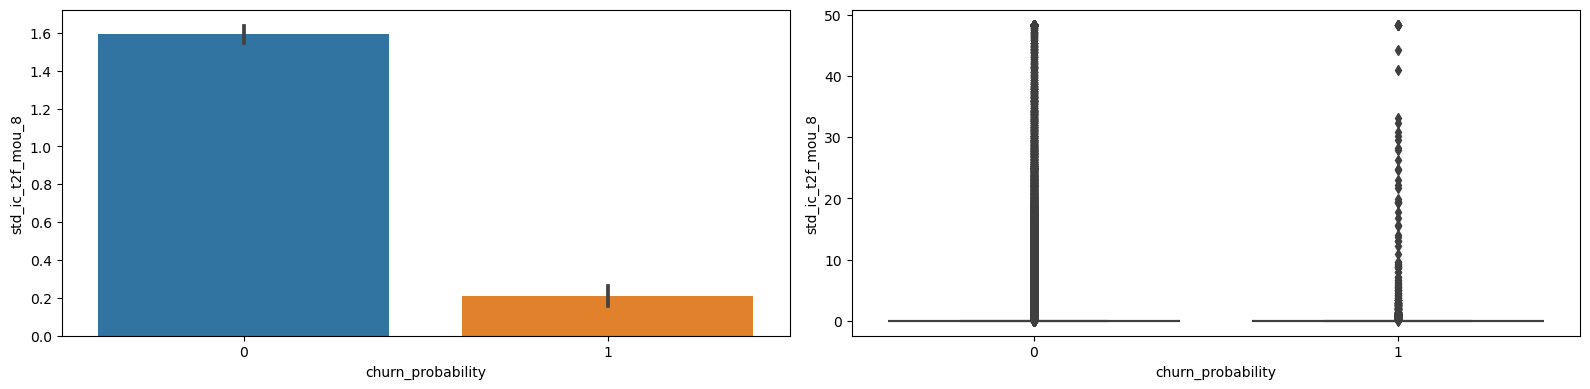

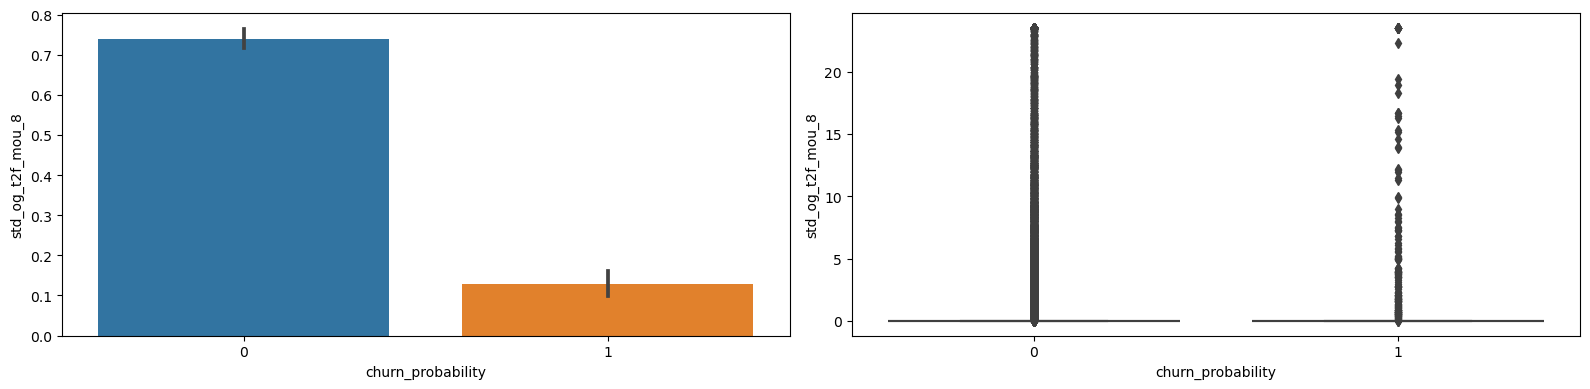

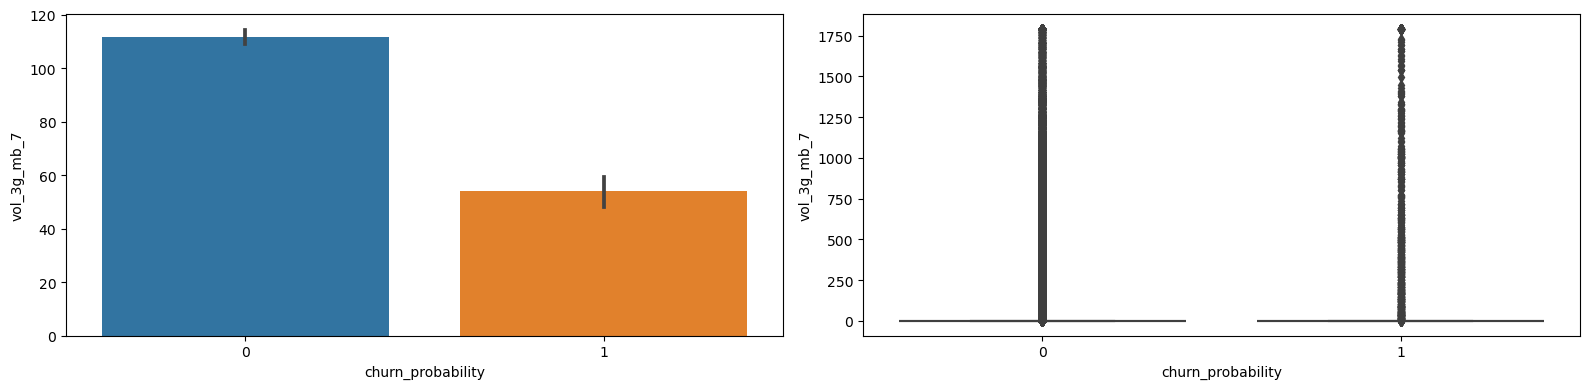

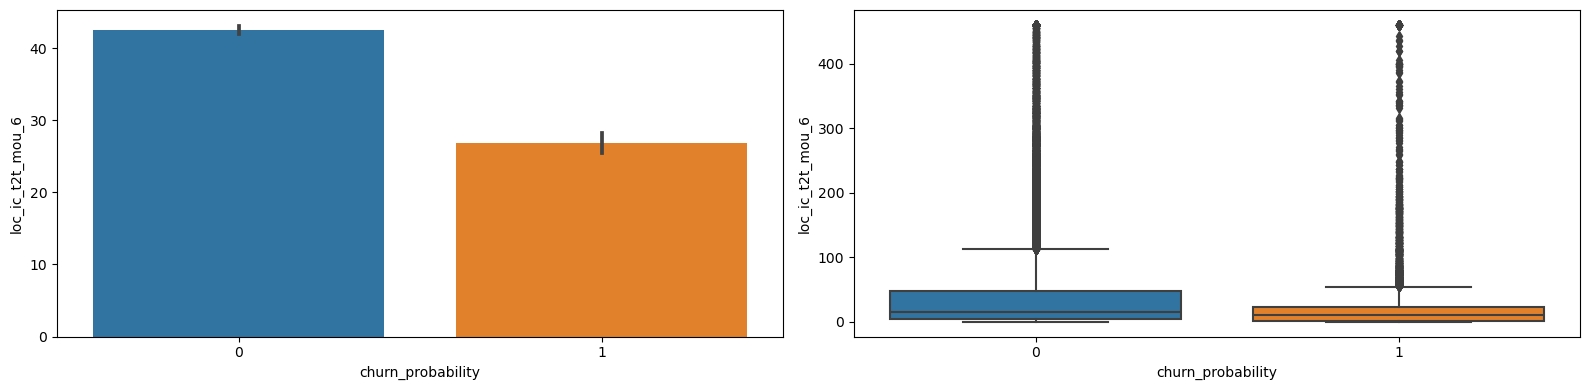

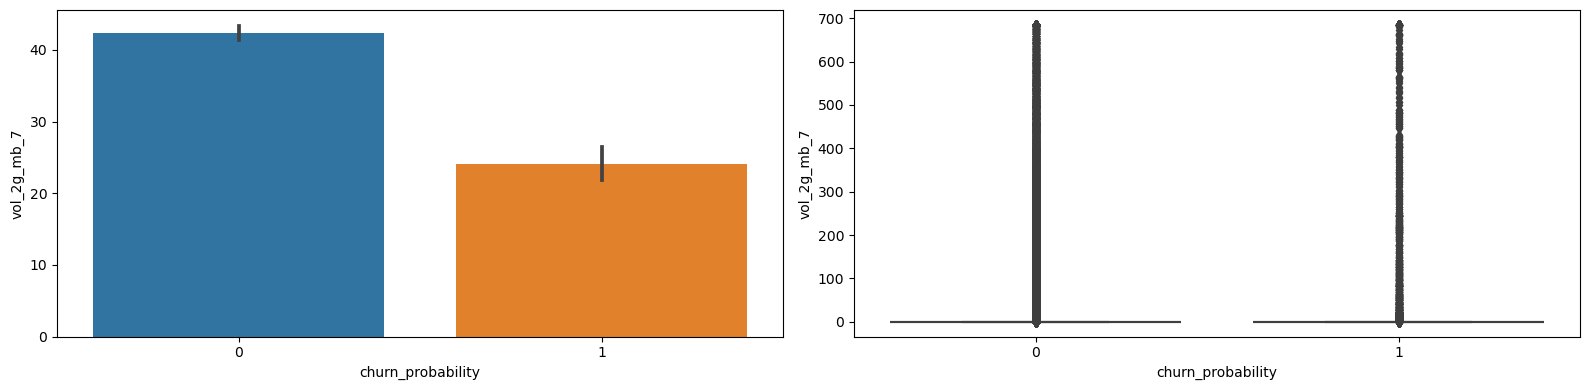

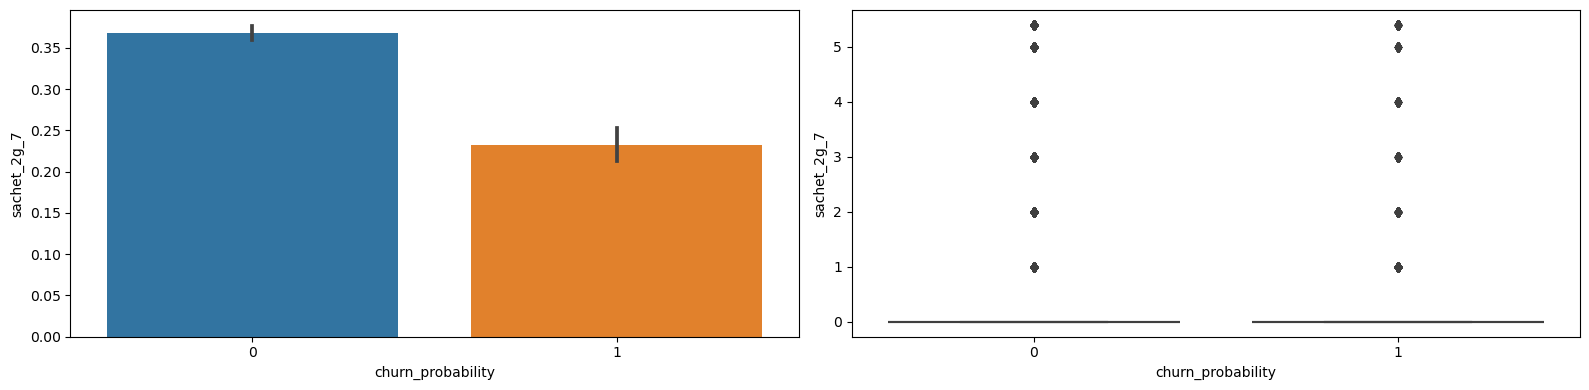

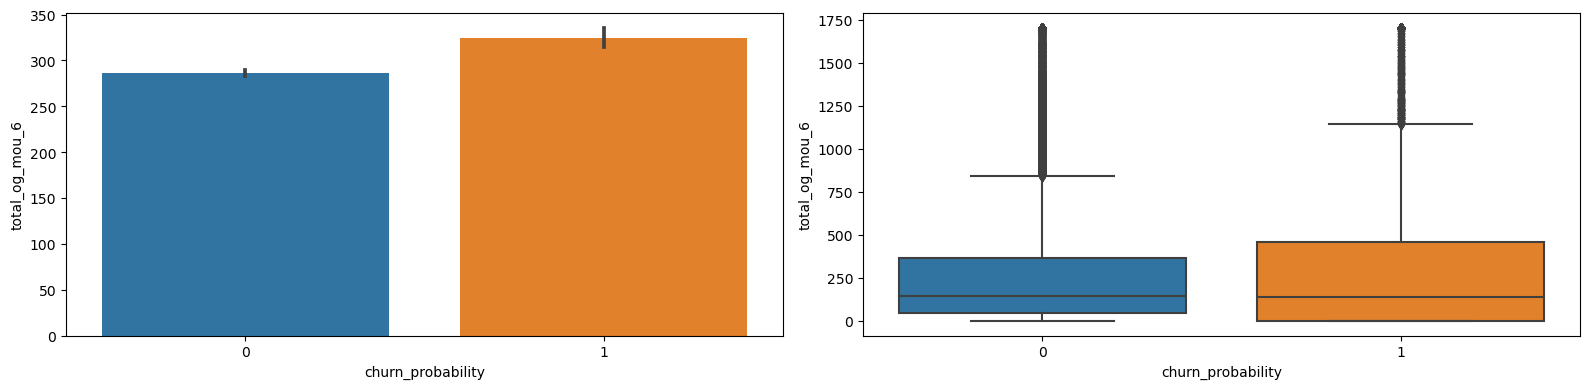

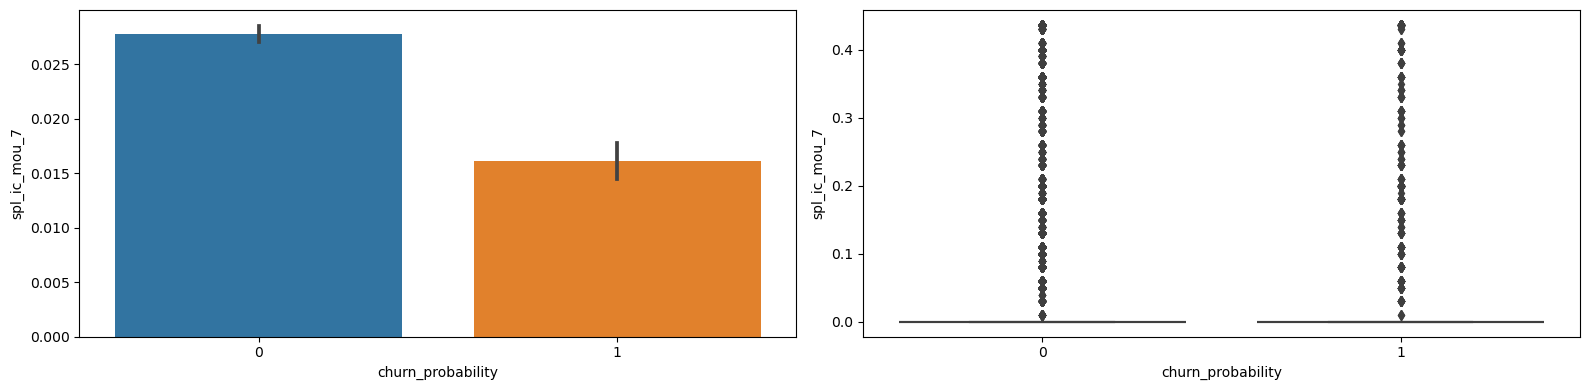

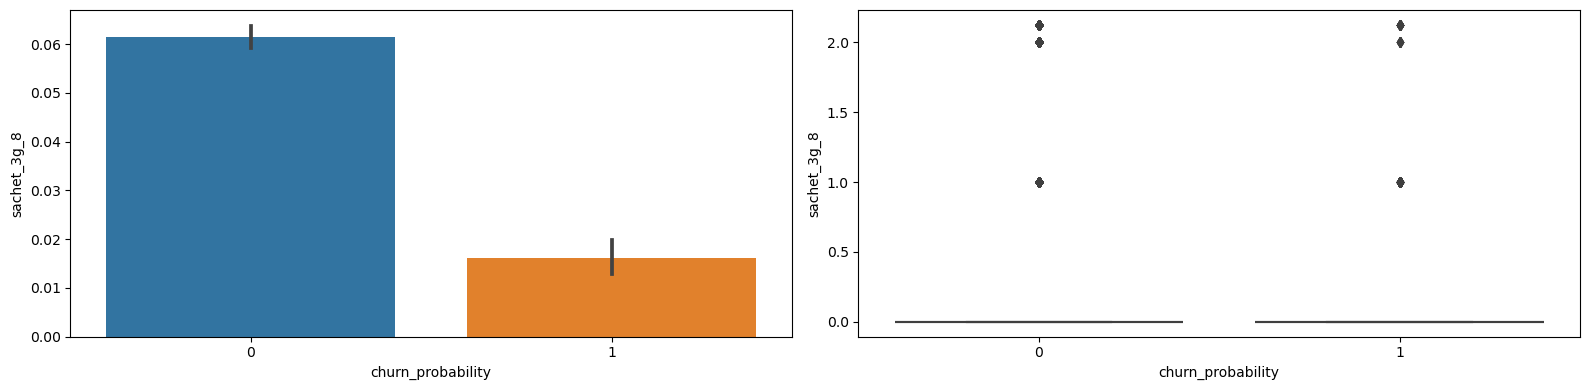

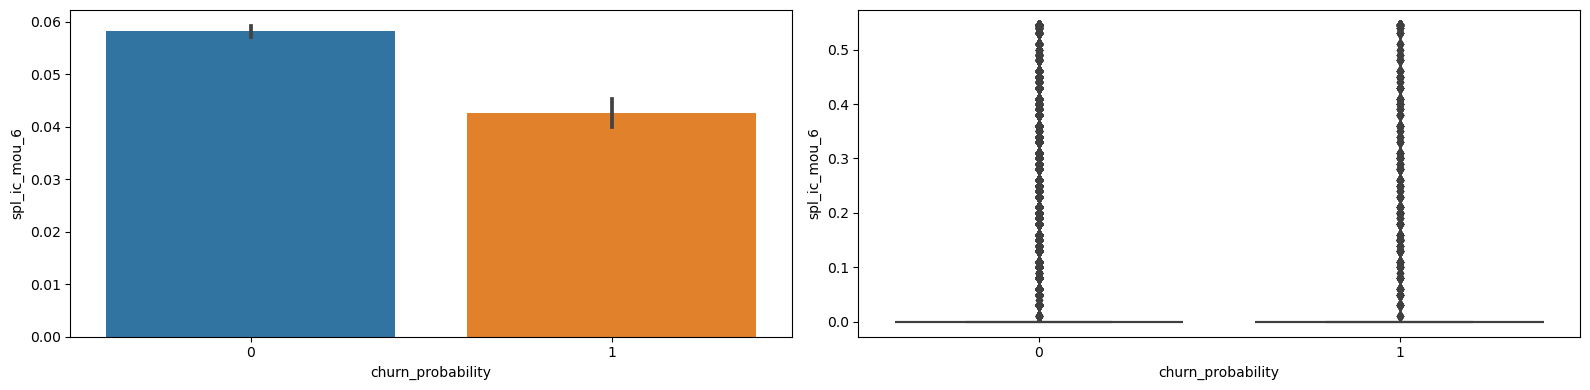

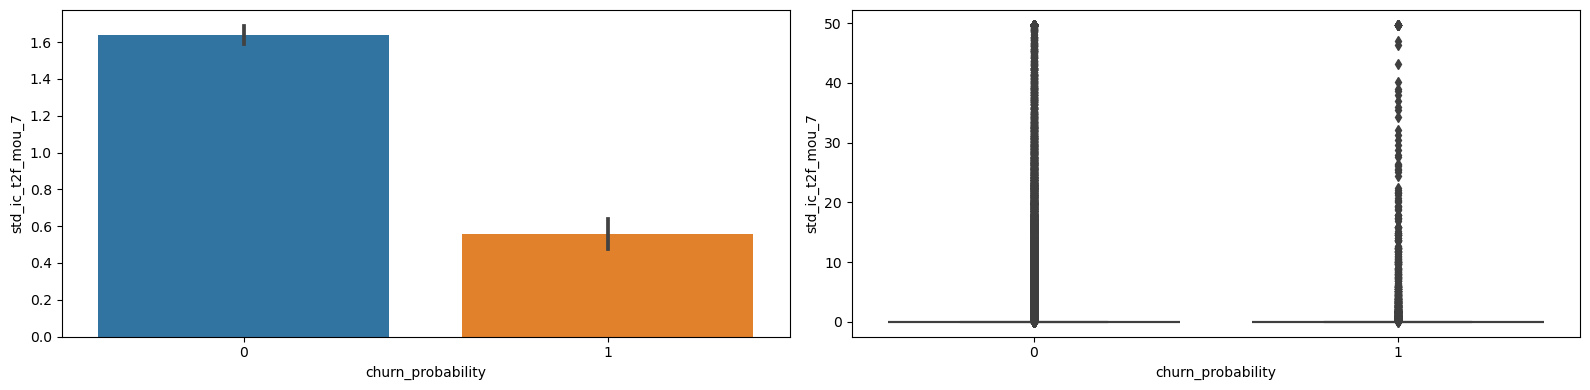

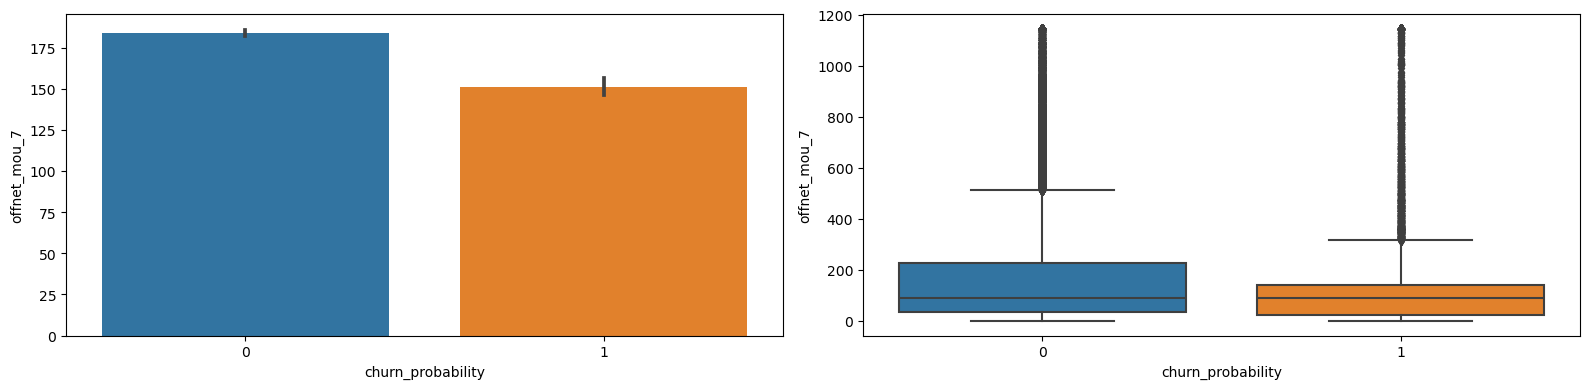

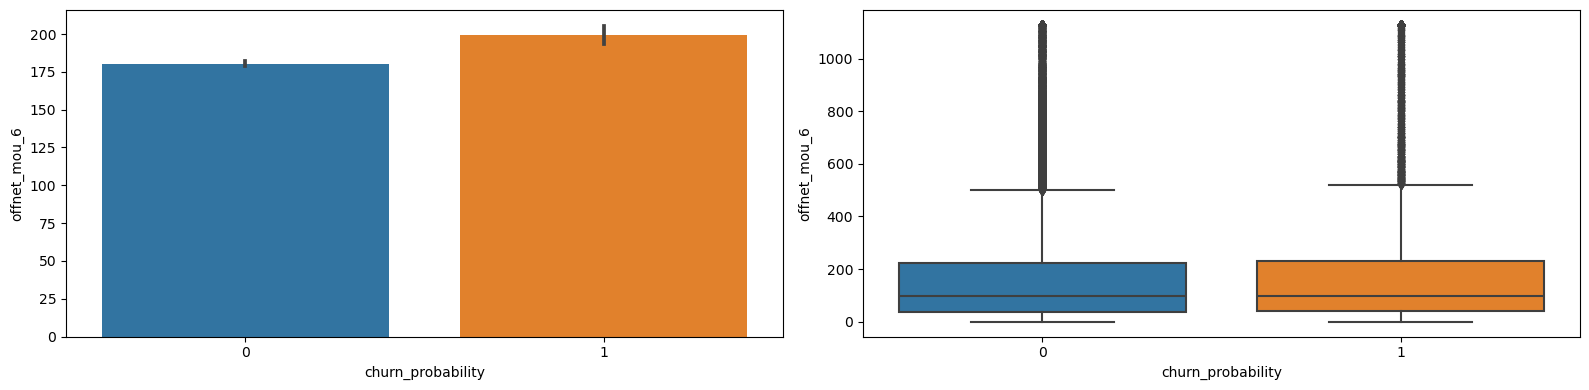

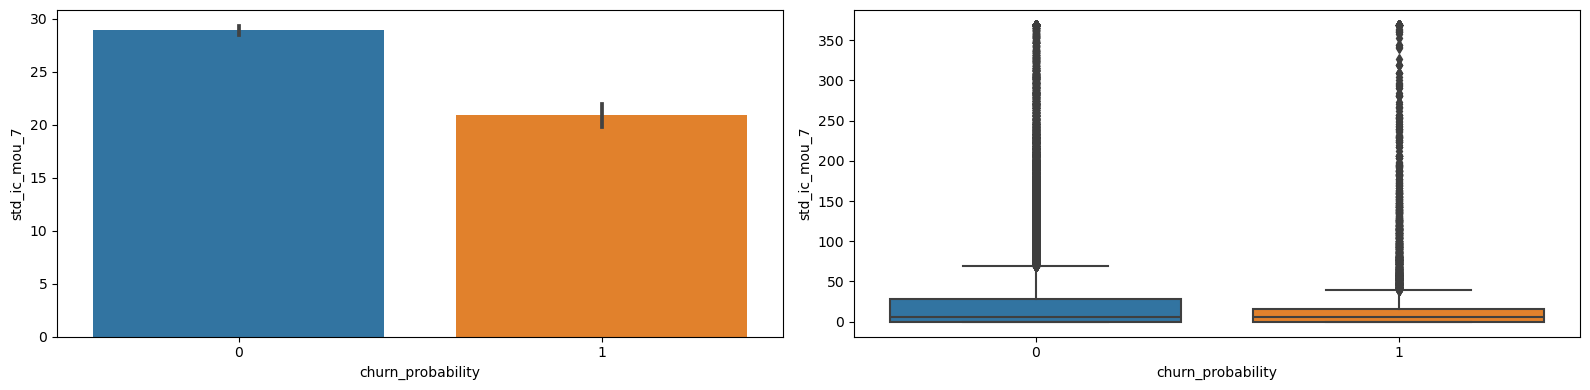

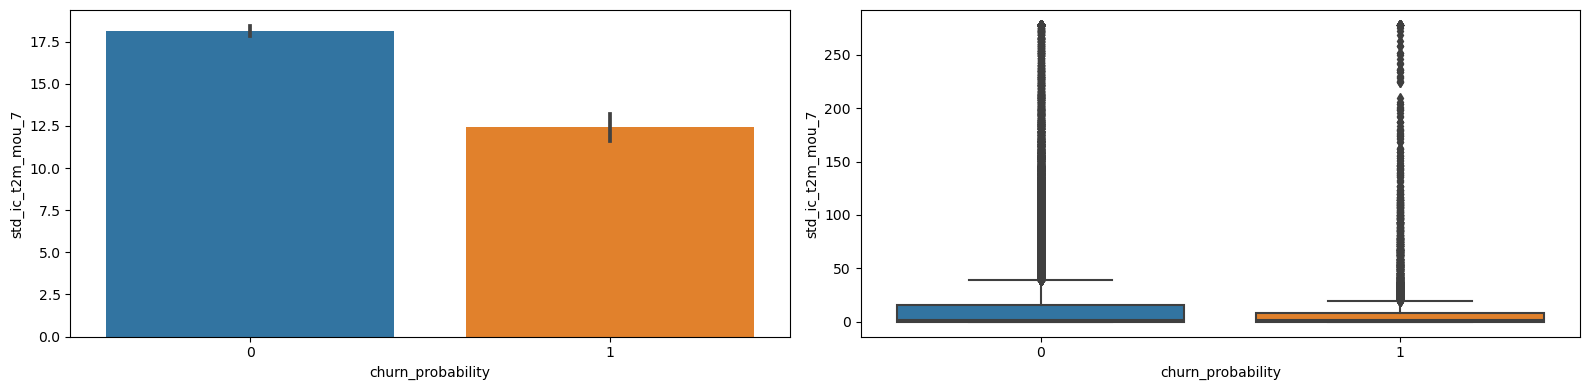

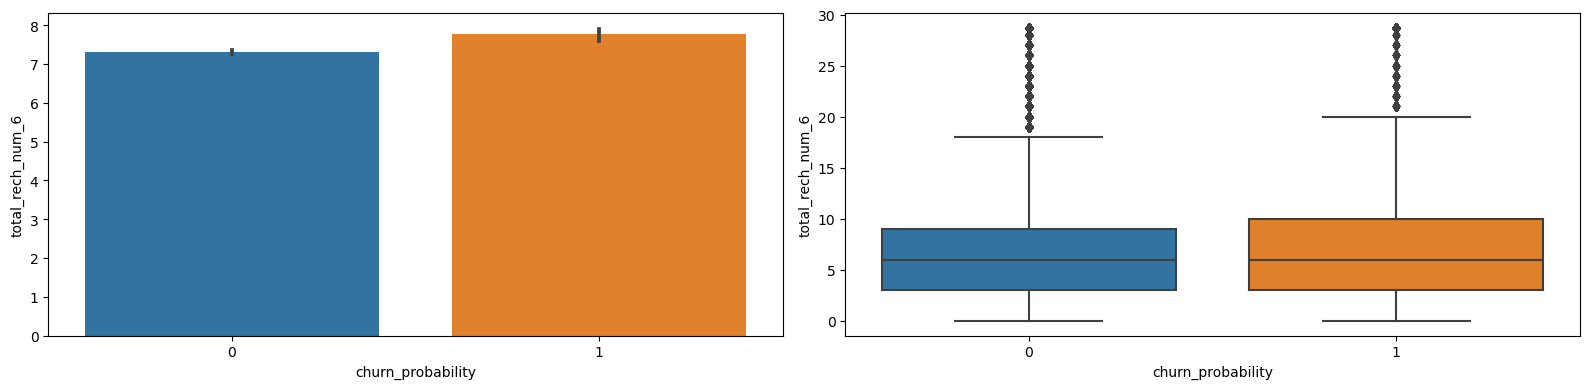

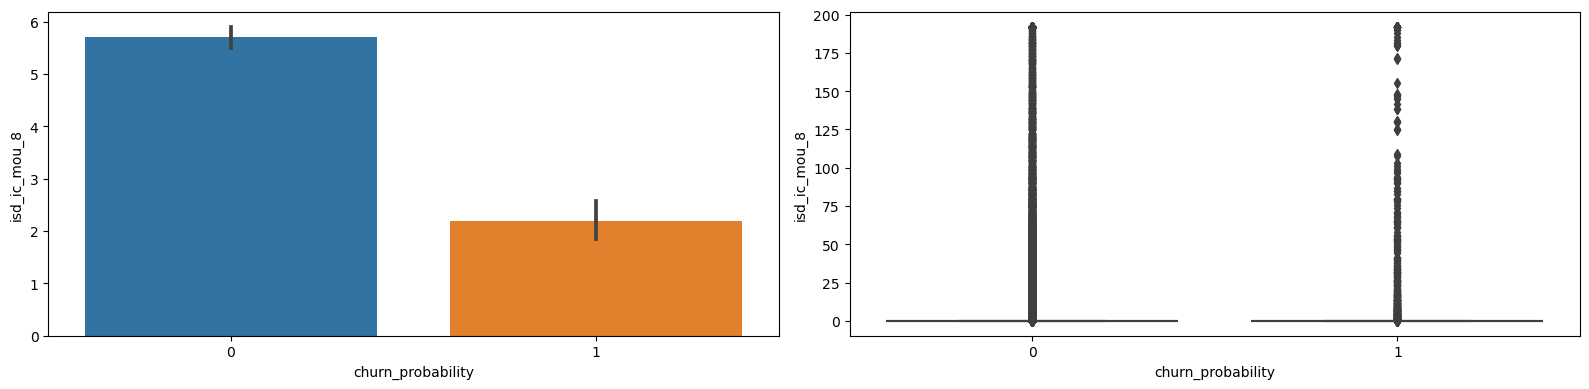

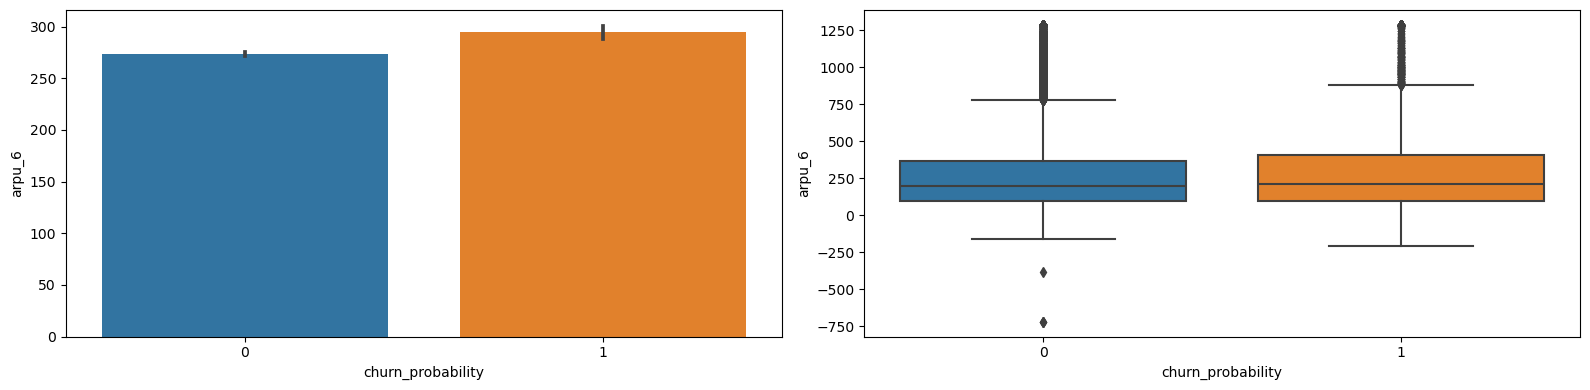

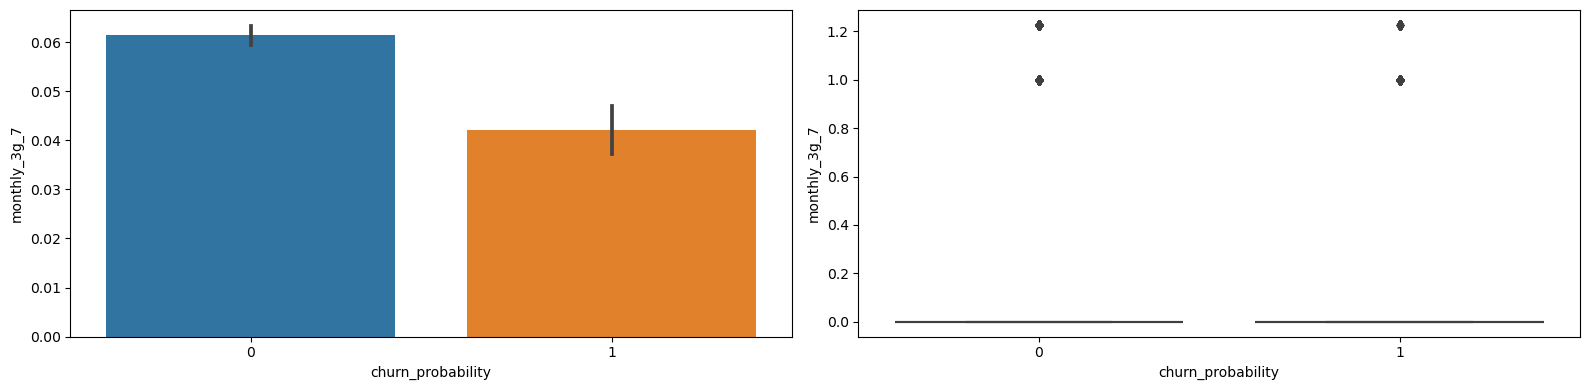

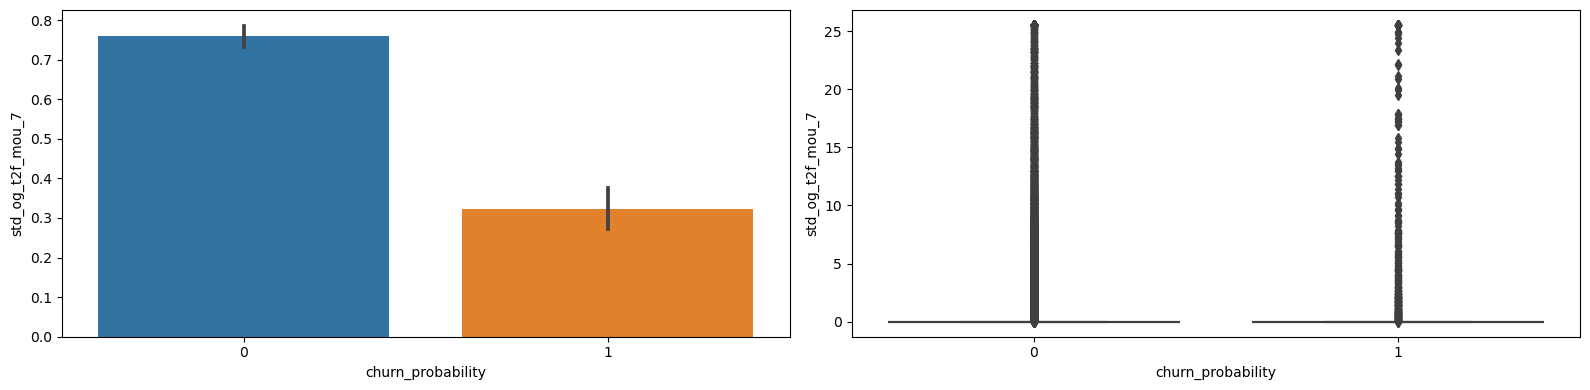

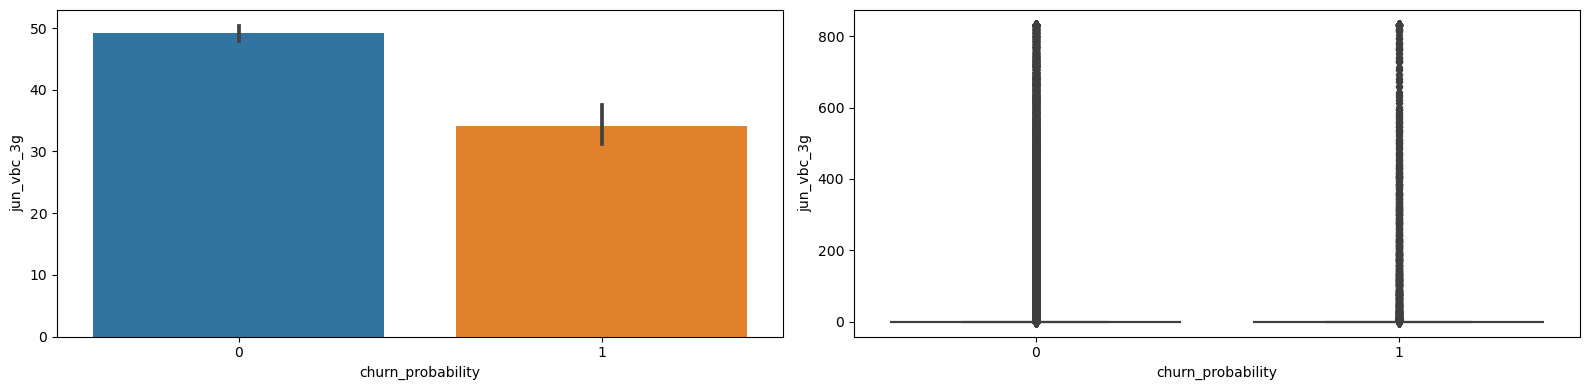

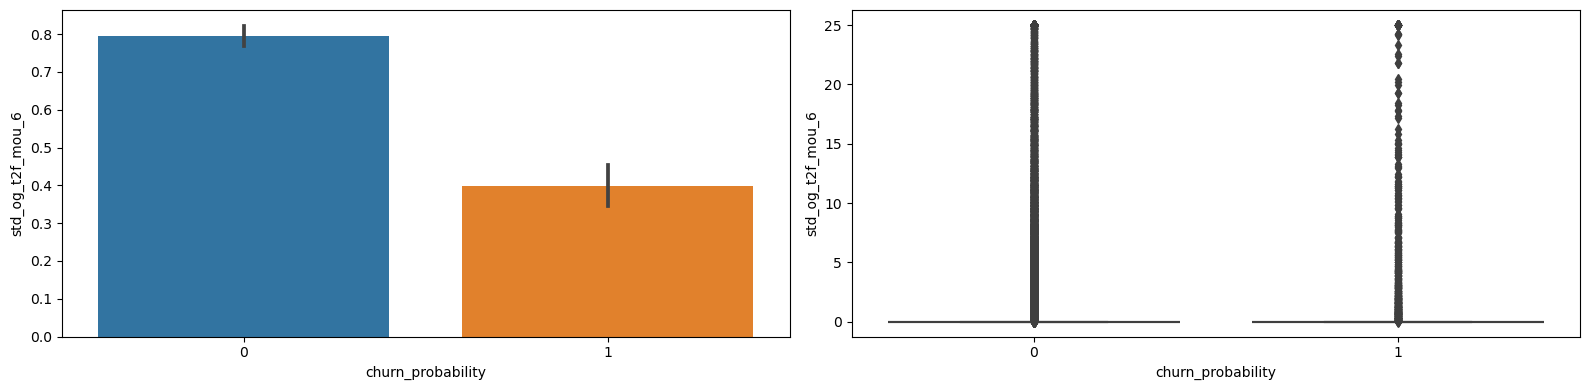

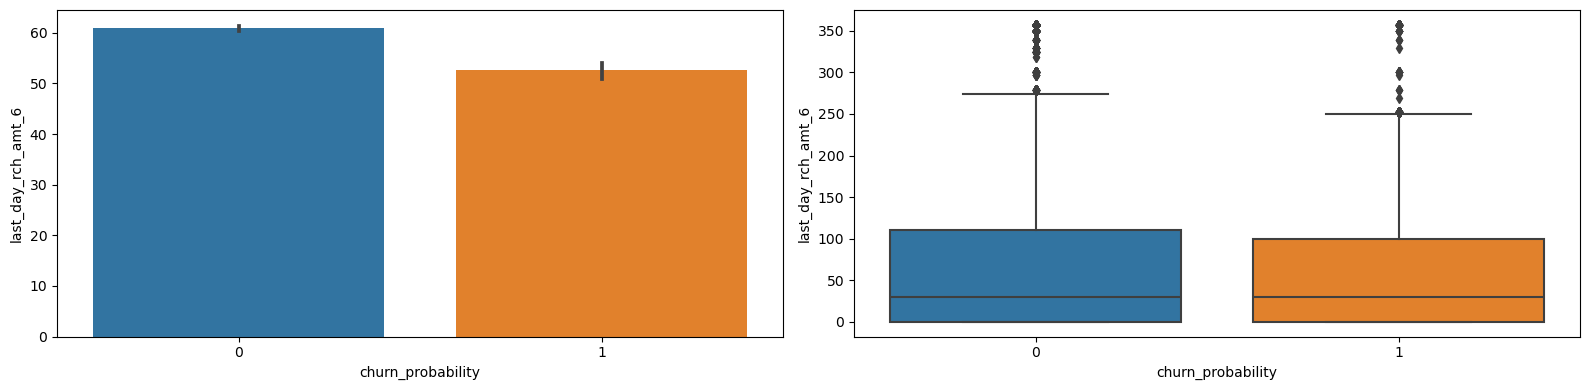

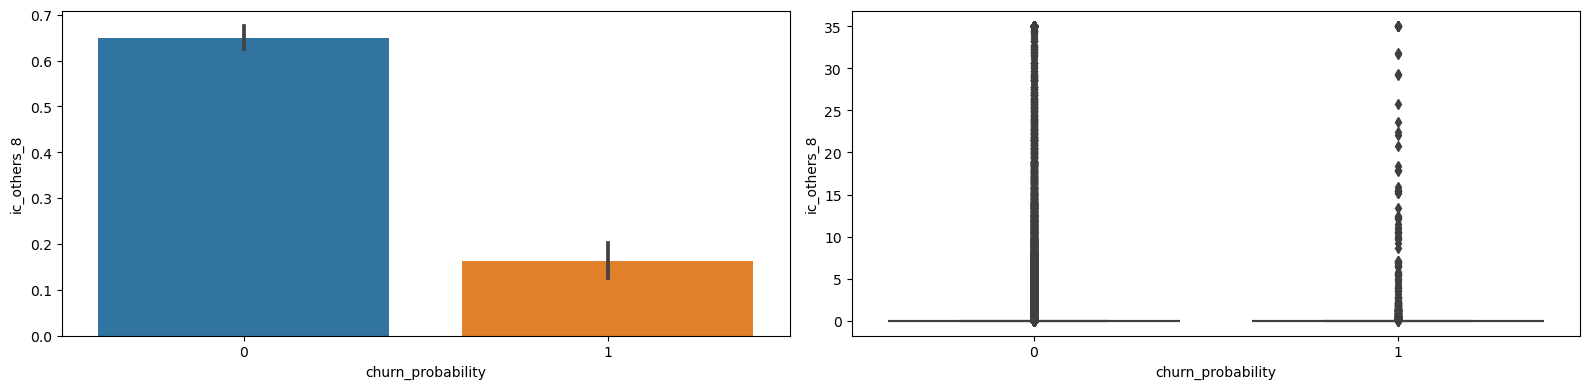

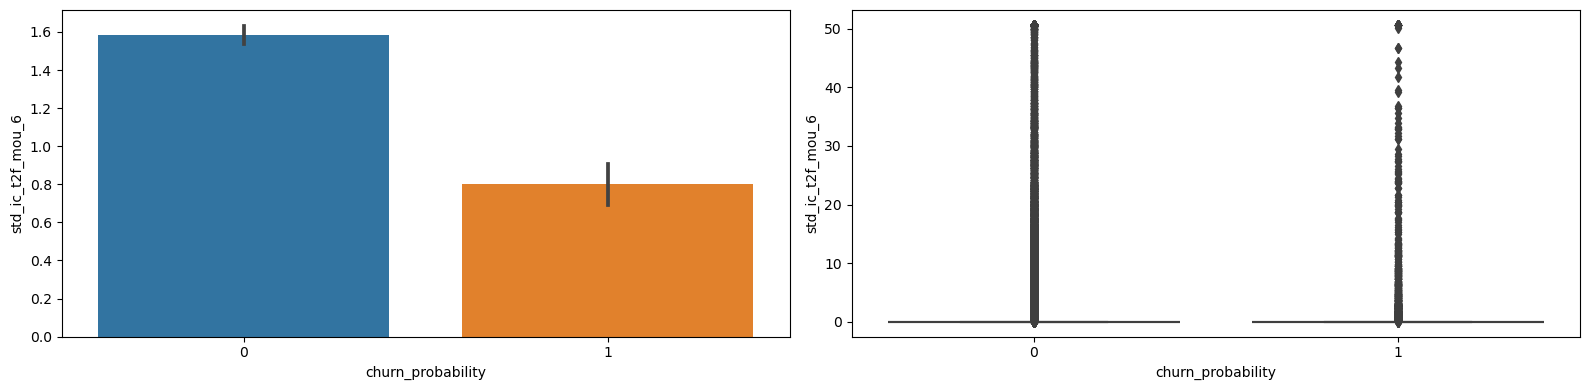

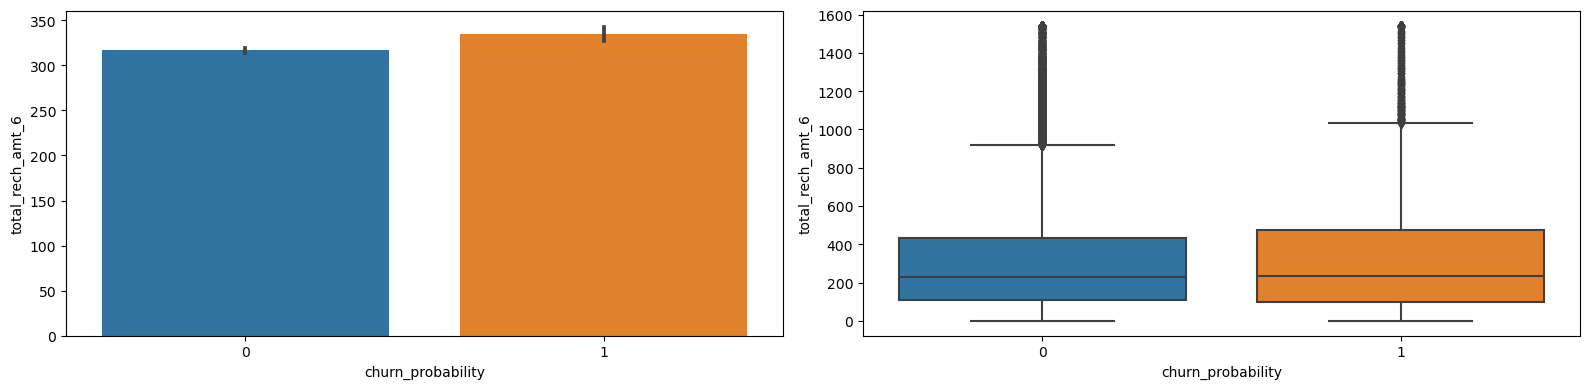

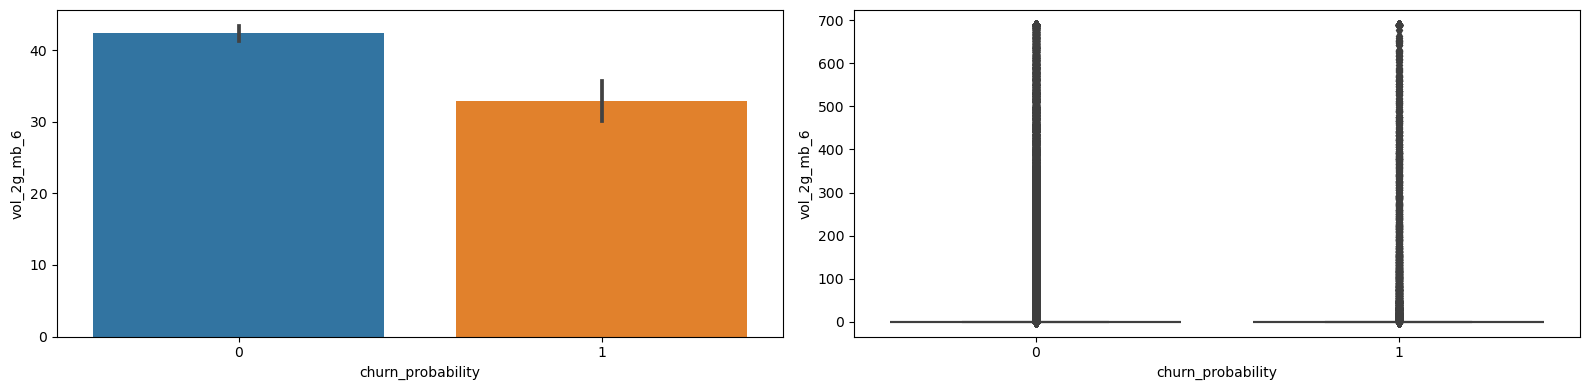

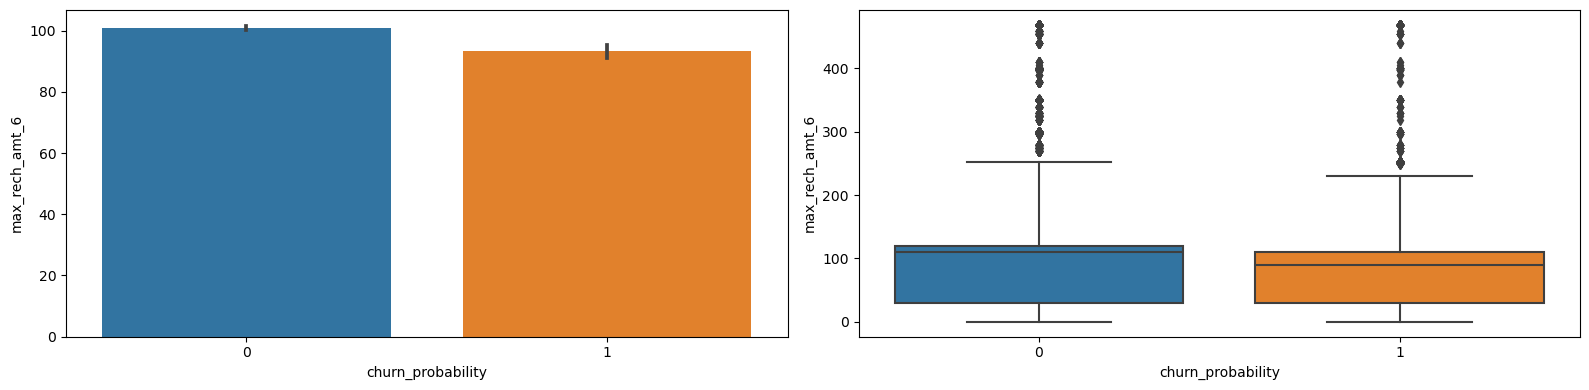

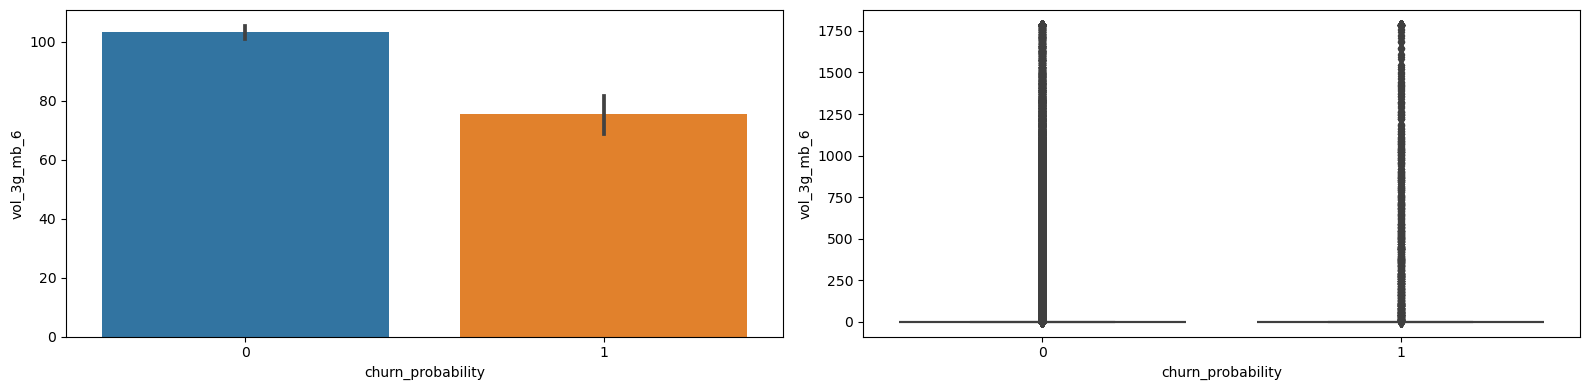

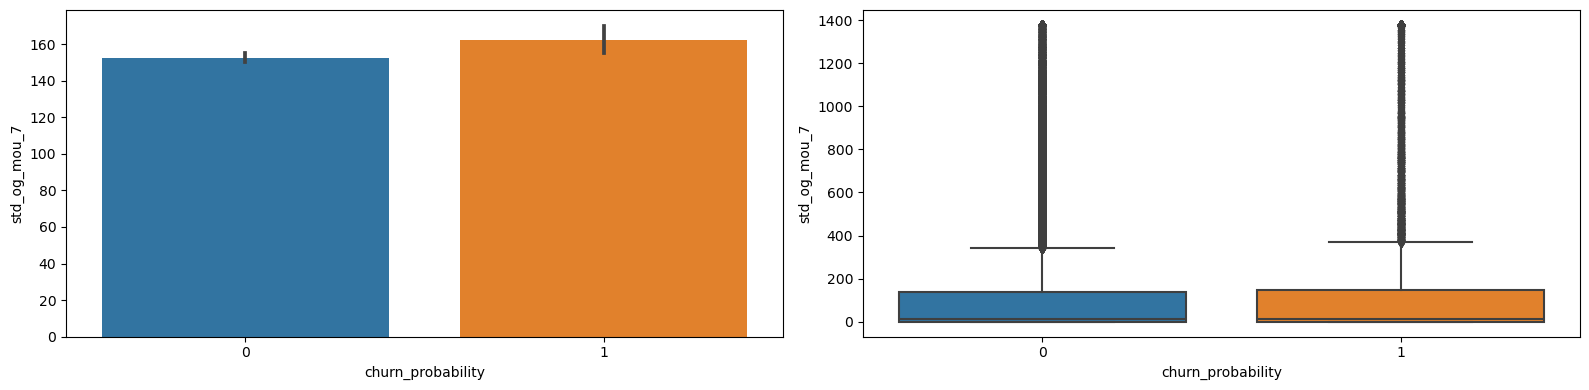

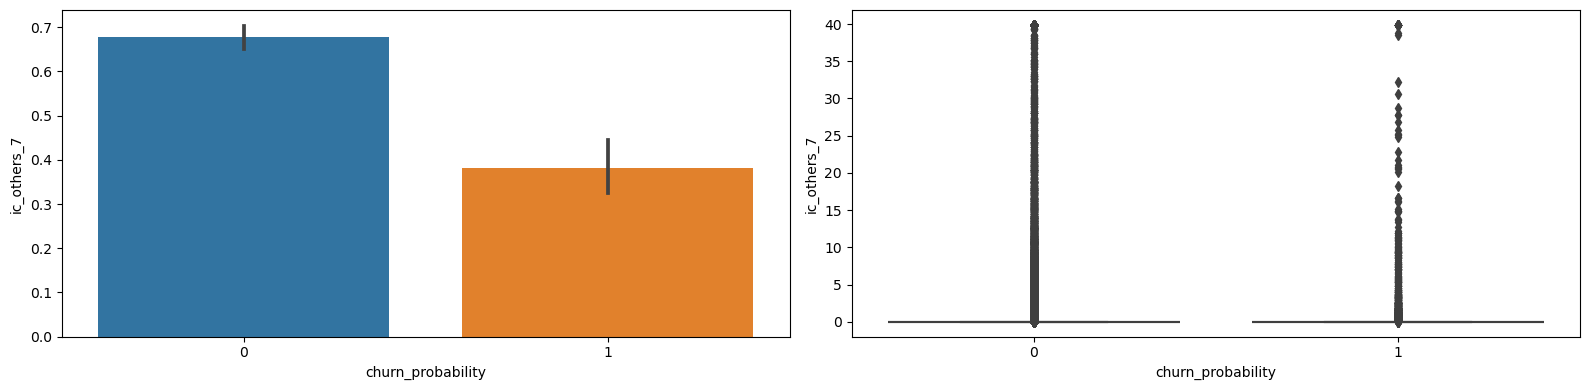

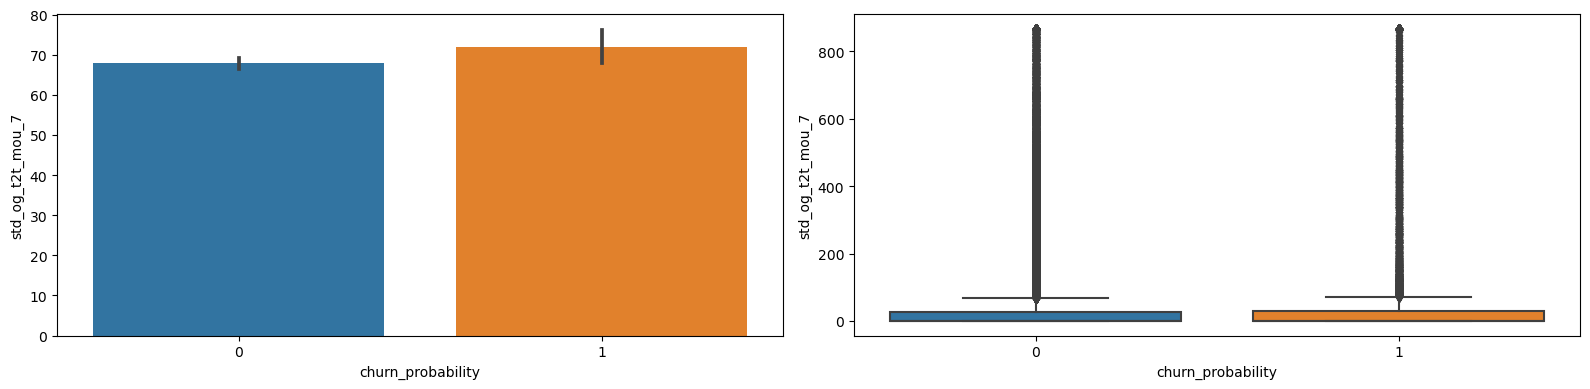

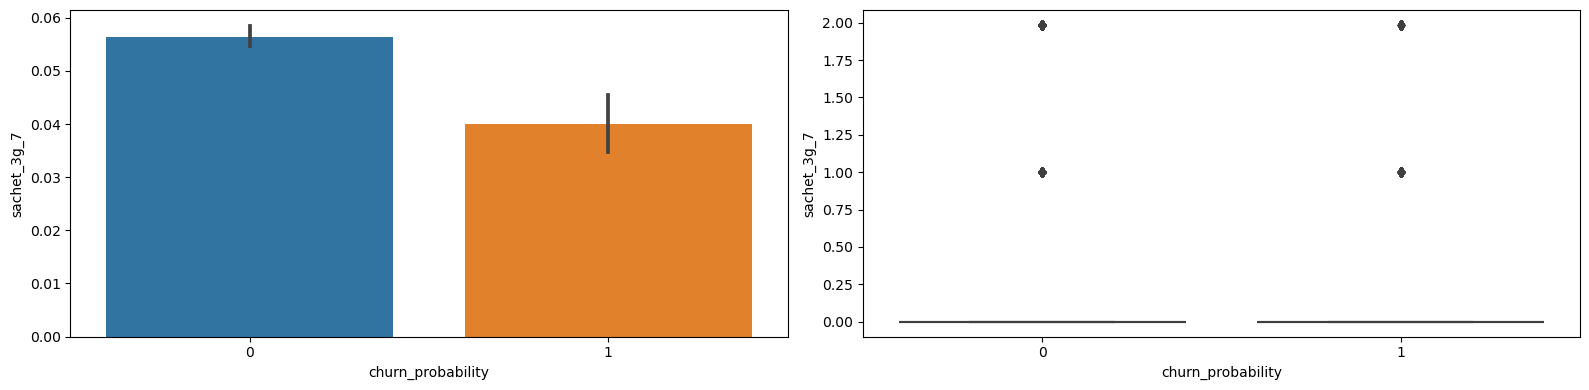

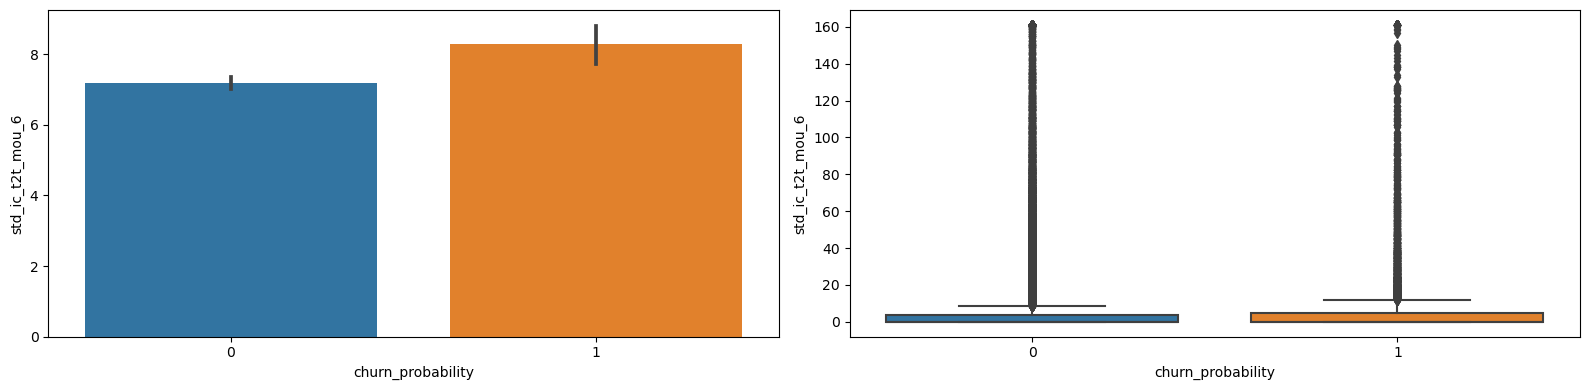

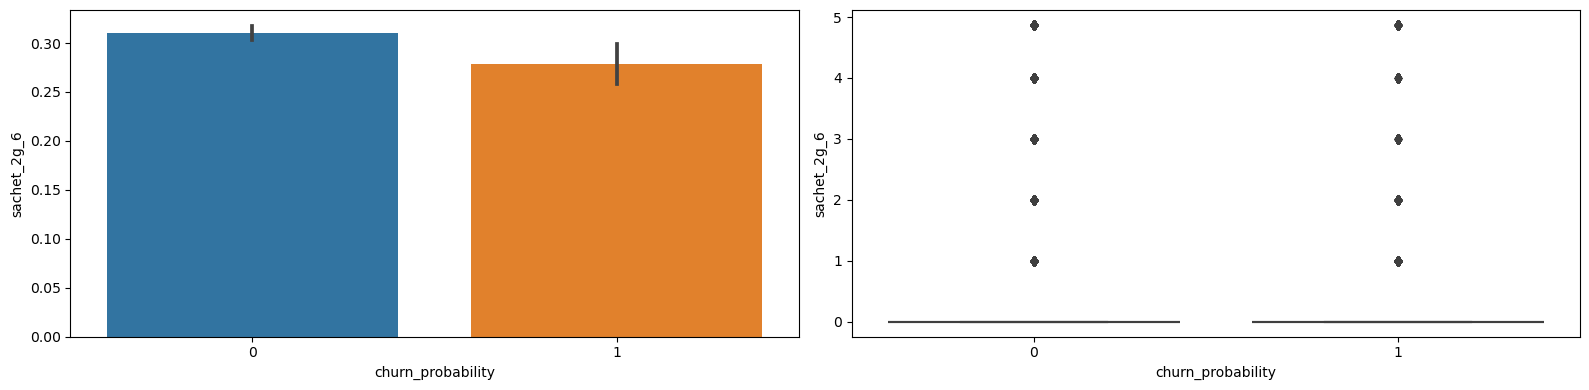

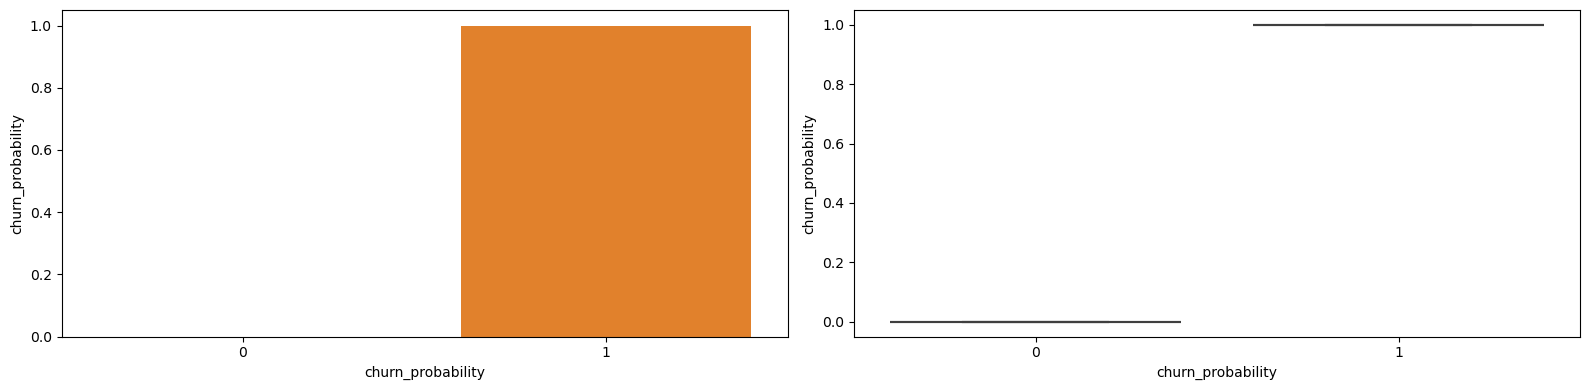

In [187]:
for col in churn_train3.columns:
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.barplot(x=churn_train3['churn_probability'], y=churn_train3[col], ax=p[0])
    sns.boxplot(x=churn_train3['churn_probability'], y=churn_train3[col], ax=p[1])
    plt.tight_layout()
    plt.show()

### Train Test Split

In [224]:
X = churn_train3.drop("churn_probability", axis = 1)
y = churn_train3.churn_probability

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [226]:
X_train.shape

(52499, 104)

In [227]:
y_train.shape

(52499,)

In [228]:
y_train.head()

43851    0
7414     0
53263    0
54550    0
50994    0
Name: churn_probability, dtype: int64

In [229]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52499, 104)
(52499,)
(17500, 104)
(17500,)


#### Scaling

In [230]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52499 entries, 43851 to 15795
Columns: 104 entries, total_ic_mou_8 to sachet_2g_6
dtypes: float64(104)
memory usage: 42.1 MB


In [231]:
percentage_value_counts = y_train.value_counts(normalize=True) * 100
print(percentage_value_counts)

churn_probability
0    89.828378
1    10.171622
Name: proportion, dtype: float64


##### We see lot of data imbalance we will handle this using SMOTE

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [234]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (94318, 104)
Dimension of y_train_sm Shape: (94318,)


In [235]:
percentage_value_counts = y_train_sm.value_counts(normalize=True) * 100
print(percentage_value_counts)

churn_probability
0    50.0
1    50.0
Name: proportion, dtype: float64


In [236]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_sm)

In [237]:
X_train_scaled.shape

(94318, 104)

#### PCA

In [238]:
from sklearn.decomposition import PCA

In [203]:
pca = PCA(random_state=42)

In [204]:
pca.fit(X_train_scaled)

PCA(random_state=42)

In [205]:
pca.components_

array([[ 1.64738810e-01,  9.24322613e-02,  1.65767952e-01, ...,
         1.79944528e-02,  4.43804791e-02,  5.42493548e-03],
       [-1.08210658e-01,  1.09261172e-01,  8.00488118e-02, ...,
        -1.41896953e-02,  5.45763785e-02, -7.80735751e-03],
       [-4.36077225e-02,  3.15743054e-02,  1.13472510e-01, ...,
         1.00906651e-01, -1.32816447e-02,  7.16083192e-02],
       ...,
       [ 6.41147896e-02,  3.17119696e-03, -9.05151045e-04, ...,
        -5.09157928e-04, -1.27663534e-03, -2.09285092e-04],
       [-1.33600286e-01, -8.53691344e-03,  1.10174173e-02, ...,
         9.63787278e-06, -5.86349715e-03, -3.43490431e-04],
       [-8.22311795e-02, -1.40153970e-03, -4.45916254e-03, ...,
        -7.29279772e-04,  5.05358086e-03, -3.45383812e-04]])

In [206]:
pca.explained_variance_ratio_

array([1.82060397e-01, 9.28035905e-02, 5.94142350e-02, 4.63211092e-02,
       4.04254018e-02, 3.68193576e-02, 3.18104938e-02, 2.89748048e-02,
       2.60956521e-02, 2.23155090e-02, 2.09858792e-02, 1.82656440e-02,
       1.80006504e-02, 1.60319516e-02, 1.55302156e-02, 1.49259623e-02,
       1.40731601e-02, 1.33106872e-02, 1.28478132e-02, 1.24508257e-02,
       1.20093630e-02, 1.14397540e-02, 1.01777173e-02, 9.85035266e-03,
       9.30893826e-03, 8.78344477e-03, 8.57988454e-03, 8.26784970e-03,
       8.13163605e-03, 7.52370274e-03, 7.27362558e-03, 7.20004595e-03,
       7.10062201e-03, 6.49293302e-03, 6.37301919e-03, 6.29306334e-03,
       6.20045320e-03, 6.05853266e-03, 5.95498782e-03, 5.69795126e-03,
       5.56178222e-03, 5.18190361e-03, 5.09517742e-03, 4.85827768e-03,
       4.72589157e-03, 4.66225012e-03, 4.27519748e-03, 4.14706365e-03,
       3.81090086e-03, 3.79010245e-03, 3.64710611e-03, 3.52126993e-03,
       3.37806651e-03, 3.34243050e-03, 3.26300406e-03, 3.21900598e-03,
      

#### Scree Plot

In [207]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

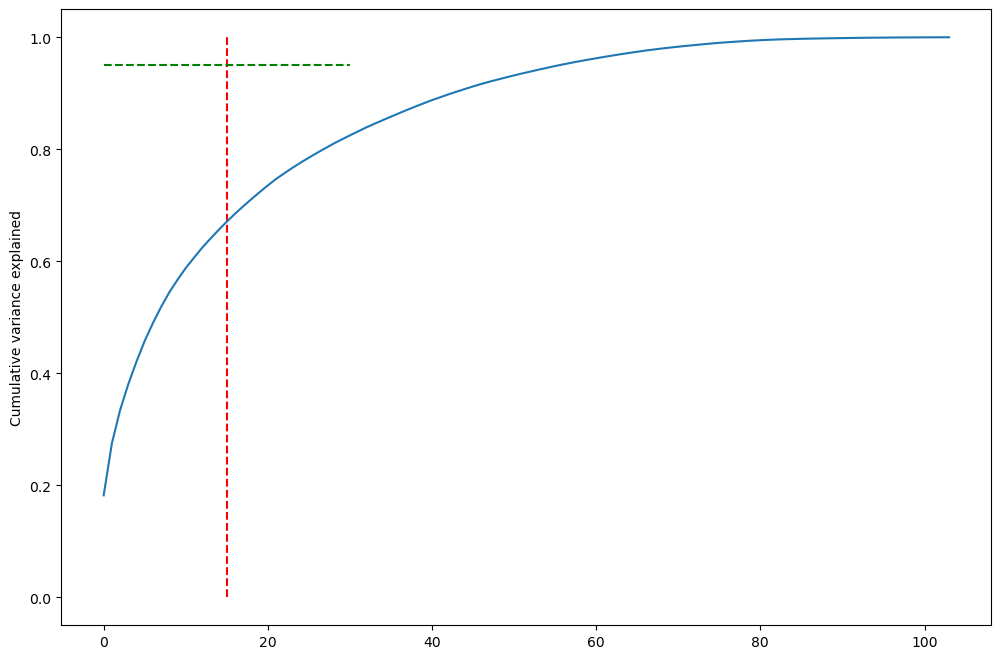

In [208]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### Using Incremental PCA for better results

In [209]:
from sklearn.decomposition import IncrementalPCA

In [210]:
def perform_incremental_pca(data, n_components_list, verbose=True):
    pca_results = {}
    explained_variances = {}
    
    for n_components in n_components_list:
        ipca = IncrementalPCA(n_components=n_components)
        transformed_data = ipca.fit_transform(data)
        pca_results[n_components] = pd.DataFrame(transformed_data)
        explained_variances[n_components] = ipca.explained_variance_ratio_.sum()
        
        if verbose:
            print(f"Incremental PCA with {n_components} components explains {explained_variances[n_components] * 100:.2f}% of the variance")
    
    # Plotting explained variance for visual analysis
    if verbose:
        plt.figure(figsize=(8, 6))
        plt.plot(n_components_list, [explained_variances[n] for n in n_components_list], marker='o')
        plt.title('Explained Variance by Number of Incremental PCA Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Explained Variance Ratio')
        plt.grid(True)
        plt.show()
    
    return pca_results

Incremental PCA with 16 components explains 66.42% of the variance
Incremental PCA with 20 components explains 71.44% of the variance
Incremental PCA with 25 components explains 76.93% of the variance
Incremental PCA with 30 components explains 81.08% of the variance


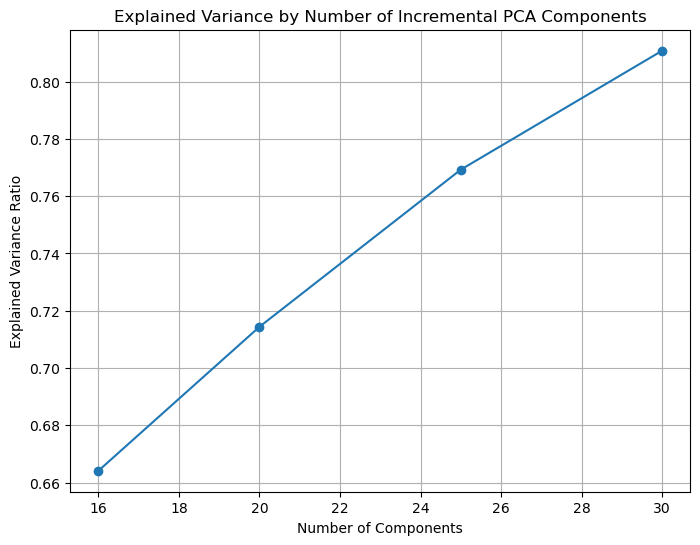

{16:               0         1         2         3         4         5         6   \
 0       7.484599 -2.813859 -1.982316 -1.652751 -0.703820 -3.396031  0.690991   
 1      12.056995 -6.627182  0.624079 -0.727609 -0.289921 -3.389292 -0.967094   
 2      -4.465209 -0.444118 -0.204298 -0.152687  0.646643 -0.594093 -0.213147   
 3       1.692087 -2.784823  5.011287 -1.088708 -1.476578 -0.405758 -1.057092   
 4       0.852285 -4.006029 -0.817121  1.893131  0.023963  2.516963  0.083782   
 ...          ...       ...       ...       ...       ...       ...       ...   
 94313  -2.074365  1.606793 -0.615156 -1.503422 -0.913834  1.702705 -0.301829   
 94314  -2.249746  2.732879  1.796527 -2.463687  3.567102 -0.098381  8.857485   
 94315   7.825965  5.966365 -3.269147 -2.299761 -1.647671 -0.571678 -1.494646   
 94316   0.636306 -2.215644 -0.917859  3.321161 -0.472831 -0.408431  0.206354   
 94317  -3.750171 -1.429973 -1.161600  0.370353 -0.066914 -0.846521 -0.476791   
 
              7       

In [214]:
no_components = [16,20,25,30]
perform_incremental_pca(X_train_scaled, no_components, verbose=True)

In [419]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train_scaled)

In [420]:
df_train_pca.shape

(94318, 16)

In [421]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [422]:
corrmat.shape

(16, 16)

##### Applying the transformation on the test set

In [423]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(17500, 16)

#### Logistic Regression with PCA

In [424]:
from sklearn.linear_model import LogisticRegression

In [425]:
learner_pca = LogisticRegression()

In [426]:
model_pca = learner_pca.fit(df_train_pca, y_train_sm)

In [427]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [428]:
from sklearn import metrics

In [429]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

#### Decision Tree With PCA

In [432]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [433]:
dt = DecisionTreeClassifier(random_state=42)

In [384]:
#tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [385]:
# Grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [386]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 105 candidates, totalling 420 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. 

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [387]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.713645      0.017468         0.006276        0.001149   
1       0.757134      0.012895         0.017461        0.010487   
2       0.528297      0.014288         0.006069        0.003416   
3       0.543258      0.013861         0.006071        0.002412   
4       0.513510      0.013405         0.005024        0.002434   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                2                       5                       50   
1                2                       5                      150   
2                2                       5                       50   
3                2                      10                       50   
4                2                      10                      150   

                                              params  split0_test_score  \
0  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...           0.936686   
1  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...           0.936686   
2  {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...           0.936686   
3  {'max_depth': 2, 'min_samples_leaf': 10, 'min_...           0.936686   
4  {'max_depth': 2, 'min_samples_leaf': 10, 'min_...           0.936686   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.937371           0.940419           0.936148         0.937656   
1           0.937371           0.940419           0.936148         0.937656   
2           0.937371           0.940419           0.936148         0.937656   
3           0.937371           0.940419           0.936148         0.937656   
4           0.937371           0.940419           0.936148         0.937656   

   std_test_score  rank_test_score  
0        0.001653               60  
1        0.001653               60  
2        0.001653               60  
3        0.001653               60  
4        0.001653               60

In [388]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
52       1.323942      0.022030         0.005504        0.002076   
58       1.253707      0.008465         0.004088        0.001839   
49       1.621683      0.128845         0.007227        0.003797   
55       1.272953      0.027483         0.004185        0.001946   
46       1.274558      0.031316         0.004606        0.001177   

    param_max_depth  param_min_samples_leaf  param_min_samples_split  \
52                5                      20                      150   
58                5                      50                      150   
49                5                      15                      150   
55                5                      25                      150   
46                5                      10                      150   

                                               params  split0_test_score  \
52  {'max_depth': 5, 'min_samples_leaf': 20, 'min_...           0.941486   
58  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.941333   
49  {'max_depth': 5, 'min_samples_leaf': 15, 'min_...           0.941486   
55  {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.941333   
46  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.941257   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
52           0.939886           0.941638           0.942167         0.941294   
58           0.939886           0.941638           0.942243         0.941275   
49           0.939962           0.941714           0.941938         0.941275   
55           0.939886           0.941638           0.942167         0.941256   
46           0.939886           0.941638           0.942015         0.941199   

    std_test_score  rank_test_score  
52        0.000852                1  
58        0.000866                2  
49        0.000775                3  
55        0.000846                4  
46        0.000804                5

In [389]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=42)

In [390]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=20,
                                  min_samples_split=150)

In [391]:
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=42)

In [392]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [393]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [394]:
evaluate_model(dt_best)

Train Accuracy : 0.9407226804320082
Train Confusion Matrix:
[[46115  1044]
 [ 2068  3272]]
--------------------------------------------------
Test Accuracy : 0.9413714285714285
Test Confusion Matrix:
[[15346   362]
 [  664  1128]]


#### Random Forest Classifier

In [362]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

10


In [366]:
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=10, random_state=25, oob_score=True, verbose=1)

In [430]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s finished


RandomForestClassifier(max_depth=10, max_features=5, n_estimators=15,
                       oob_score=True, random_state=25, verbose=1)

In [431]:
rf.oob_score_

0.9382845387531191

In [441]:
new_vars=X_train.columns

In [442]:
new_vars

Index(['total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'arpu_8', 'total_og_mou_8', 'last_day_rch_amt_8',
       'loc_ic_mou_8', 'aon', 'loc_ic_t2m_mou_8',
       ...
       'total_rech_amt_6', 'vol_2g_mb_6', 'max_rech_amt_6', 'vol_3g_mb_6',
       'std_og_mou_7', 'ic_others_7', 'std_og_t2t_mou_7', 'sachet_3g_7',
       'std_ic_t2t_mou_6', 'sachet_2g_6'],
      dtype='object', length=104)

In [443]:
churn_test_data.shape

(30000, 171)

In [444]:
submission_data = churn_test_data.set_index('id')[new_vars]
submission_data.shape

(30000, 104)

In [445]:
churn_test_data['churn_probability'] = rf.predict(submission_data)
output = churn_test_data[['id','churn_probability']]
output.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [446]:
output.to_csv('rf_assses1.csv',index=False)